# Load Data from Txt file

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib import ticker
from matplotlib.colors import PowerNorm, LogNorm
from scipy.stats import norm
from matplotlib.lines import Line2D
from scipy.optimize import curve_fit
import pandas as pd

from matplotlib.colors import LogNorm
from matplotlib.patches import Circle
from ipywidgets import interactive
# Enable interactive plots
#%matplotlib notebook
#%matplotlib inline

import uproot
import awkward as ak
import os

infile_name = r"D:\20231112_LBNL_COLTRIMS\202308_ALS_APR_2023_HCOOH Analysis\DATA\HCOOH\20240123_HCOOH_dimer\HCOOH_56p0ev_horiz_11p0vcm_9p8g _c.0004s_004.root"


In [90]:
number_of_fragment = 2 #(1 or 2)
symmetrize_electron = True
symmetrize_ion = True
write_momentum_to_file = True
manual_offset = False

m1 = 46
m2 = 46
q1 = 1
q2 = 1

ion1_tof = [5500, 7000]
ion2_tof = [6500, 8250]
ion_xy_edge = [-40, 40]
elec_tof = [38, 72]

e1tof_left_edge = elec_tof[0]
e1tof_right_edge = elec_tof[1]
r1tof_left_edge = ion1_tof[0]
r1tof_right_edge = ion1_tof[1]

e2tof_left_edge = elec_tof[0]
e2tof_right_edge = elec_tof[1]
r2tof_left_edge = ion2_tof[0]
r2tof_right_edge = ion2_tof[1]

r1x_left_edge = ion_xy_edge[0]
r1x_right_edge= ion_xy_edge[1]
r1y_left_edge = ion_xy_edge[0]
r1y_right_edge= ion_xy_edge[1]

r2x_left_edge = ion_xy_edge[0]
r2x_right_edge= ion_xy_edge[1]
r2y_left_edge = ion_xy_edge[0]
r2y_right_edge= ion_xy_edge[1]

if symmetrize_ion:
    r1tof_left_edge = ion1_tof[0]
    r1tof_right_edge = ion2_tof[1]
    r2tof_left_edge = ion1_tof[0]
    r2tof_right_edge = ion2_tof[1]

# Extracting relevant information from the input file name
folder_path, file_name = os.path.split(infile_name)
file_name_without_extension = os.path.splitext(file_name)[0]

# Create the folder if it doesn't exist
output_folder = os.path.join(folder_path, file_name_without_extension)
if not os.path.exists(output_folder):
    os.makedirs(output_folder)


folder_path = 'D:/20231112_LBNL_COLTRIMS/202308_ALS_APR_2023_HCOOH Analysis/DATA/HCOOH/20240123_HCOOH_dimer/'

print(folder_path)

D:/20231112_LBNL_COLTRIMS/202308_ALS_APR_2023_HCOOH Analysis/DATA/HCOOH/20240123_HCOOH_dimer/


In [91]:
PAU = 1.99285e-24           # Momentum in AU
MASSAU = 1822.888           # Mass in AU
VAU = 2.1877e6              # Velocity in AUs
EVAU = 27.2114              # eV in AU
EFIELDAU = 0.00805          # Electric field (V/cm) in AU
PI = 3.14159265             # PI
MEKG = 9.1093897e-31        # Electron Mass in Kg
MUKG = 1.66053886e-27       # u in Kg
COULOMB = 1.60217733e-19    # Elementary charge
Kg_over_AMU = 1.660538782e-27
C_over_au = 1.602176487e-19

In [92]:
output_file = os.path.join(folder_path, "combined_all_data_46_46.csv")
# Load data from the text file

# Read the CSV file into a DataFrame
df = pd.read_csv(output_file)

i_TOF0 = df['i_TOF0'].values
i_x0 = df['i_x0'].values
i_y0 = df['i_y0'].values
i_TOF1 = df['i_TOF1'].values
i_x1 = df['i_x1'].values
i_y1 = df['i_y1'].values

e_TOF0 = df['e_TOF0'].values
e_x0 = df['e_x0'].values
e_y0 = df['e_y0'].values
e_TOF1 = df['e_TOF1'].values
e_x1 = df['e_x1'].values
e_y1 = df['e_y1'].values

p_x_Ar0 = df['p_x_Ar0'].values
p_y_Ar0 = df['p_y_Ar0'].values
p_z_Ar0 = df['p_z_Ar0'].values
p_x_Ar1 = df['p_x_Ar1'].values
p_y_Ar1 = df['p_y_Ar1'].values
p_z_Ar1 = df['p_z_Ar1'].values

p_x_e0 = df['p_x_e0'].values
p_y_e0 = df['p_y_e0'].values
p_z_e0 = df['p_z_e0'].values
p_x_e1 = df['p_x_e1'].values
p_y_e1 = df['p_y_e1'].values
p_z_e1 = df['p_z_e1'].values


# Now we enforce gates in momentum space on data to select channels and events of interest

In [93]:
#First gate
e_px0_filter = (p_x_e0 > -5) & (p_x_e0 < 5)
e_py0_filter = (p_y_e0 > -5) & (p_y_e0 < 5)
e_pz0_filter = (p_z_e0 > -5) & (p_z_e0 < 5)

e_px1_filter = (p_x_e1 > -5) & (p_x_e1 < 5)
e_py1_filter = (p_y_e1 > -5) & (p_y_e1 < 5)
e_pz1_filter = (p_z_e1 > -5) & (p_z_e1 < 5)



e_mom_filter = e_px0_filter & e_py0_filter & e_pz0_filter & e_px1_filter & e_py1_filter & e_pz1_filter

i_px0_filter = (p_x_Ar0 > -200) & (p_x_Ar0 < 200)
i_py0_filter = (p_y_Ar0 > -200) & (p_y_Ar0 < 200)
if symmetrize_ion:
    i_pz0_filter = (p_z_Ar0 > -200) & (p_z_Ar0 < 200)
else:
    i_pz0_filter = (p_z_Ar0 > -10) & (p_z_Ar0 < 200)
    
i_px1_filter = (p_x_Ar1 > -200) & (p_x_Ar1 < 200)
i_py1_filter = (p_y_Ar1 > -200) & (p_y_Ar1 < 200)
if symmetrize_ion:
    i_pz1_filter = (p_z_Ar1 > -200) & (p_z_Ar1 < 200)
else:
    i_pz1_filter = (p_z_Ar1 > -200) & (p_z_Ar1 < 10)    

i_mom_filter = i_px0_filter & i_py0_filter & i_pz0_filter & i_px1_filter & i_py1_filter & i_pz1_filter

pre_mom_filter = e_mom_filter & i_mom_filter

#print((e_py0_filtered))

### First we gate on electrons using two shells of different radius in momentum space, only accepting events which lie between. We then apply another gate that enforces momentum conservation between the electron-ion pair (longitudinal). Finally we gate on ion trasverse distributions.

In [94]:
i_pxx_filter = ((p_x_Ar0 + p_x_Ar1) >= -25) &  ((p_x_Ar0 + p_x_Ar1) <= 25)
i_pyy_filter = ((p_y_Ar0 + p_y_Ar1) >= -25) &  ((p_y_Ar0 + p_y_Ar1) <= 25)
i_pzz_filter = ((p_z_Ar0 + p_z_Ar1) >= -25) &  ((p_z_Ar0 + p_z_Ar1) <= 25)
#i filter 10 for N2 and He
e_pxx_filter = True #p_x_e0**2 +p_x_e1**2 >= 0 #  != 0) & (p_x_e1 != 0) #+ p_x_e1 >= -2) &  (p_x_e0 + p_x_e1 <= 2)
e_pyy_filter = True #p_y_e0**2 +p_y_e1**2 >= 0  #(p_y_e0 + p_y_e1 >= -2) &  (p_y_e0 + p_y_e1 <= 2)
e_pzz_filter = True #p_z_e0**2 +p_z_e1**2 >= 0  #(p_z_e0 + p_z_e1 >= -2) &  (p_z_e0 + p_z_e1 <= 2)

sum_mom_filter = i_pxx_filter & i_pyy_filter & i_pzz_filter & e_pxx_filter & e_pyy_filter & e_pzz_filter

if number_of_fragment == 1:
    sum_mom_filter = True

In [95]:
mom_x_filter = ((p_x_Ar0 + p_x_Ar1 + p_x_e0 + p_x_e1) >= -20) & ((p_x_Ar0 + p_x_Ar1 + p_x_e0 + p_x_e1) <= 20) 
mom_y_filter = ((p_y_Ar0 + p_y_Ar1 + p_y_e0 + p_y_e1) >= -20) & ((p_y_Ar0 + p_y_Ar1 + p_y_e0 + p_y_e1) <= 20) 
mom_z_filter = ((p_z_Ar0 + p_z_Ar1 + p_z_e0 + p_z_e1) >= -20) & ((p_z_Ar0 + p_z_Ar1 + p_z_e0 + p_z_e1) <= 20) 
# He 40

if number_of_fragment == 1:
    mom_x_filter = ((p_x_Ar0 + p_x_e0) >= -5) & ((p_x_Ar0 + p_x_e0) <= 5) 
    mom_y_filter = ((p_y_Ar0 + p_y_e0) >= -5) & ((p_y_Ar0 + p_y_e0) <= 5) 
    mom_z_filter = ((p_z_Ar0 + p_z_e0) >= -5) & ((p_z_Ar0 + p_z_e0) <= 5) 

mom_total_filter = mom_x_filter & mom_y_filter & mom_z_filter


In [96]:
rad_filter_i0 = (p_x_Ar0**2 + p_y_Ar0**2 + p_z_Ar0**2 <= 200**2) & (p_x_Ar0**2 + p_y_Ar0**2 + p_z_Ar0**2 >= 10**2)
rad_filter_i1 = (p_x_Ar1**2 + p_y_Ar1**2 + p_z_Ar1**2 <= 200**2) & (p_x_Ar1**2 + p_y_Ar1**2 + p_z_Ar1**2 >= 10**2)

rad_filter_e0 = (p_x_e0**2 + p_y_e0**2 + p_z_e0**2 <= 2**2) & (p_x_e0**2 + p_y_e0**2 + p_z_e0**2 >= 0.0**2)
rad_filter_e1 = (p_x_e1**2 + p_y_e1**2 + p_z_e1**2 <= 2**2) & (p_x_e1**2 + p_y_e1**2 + p_z_e1**2 >= 0.0**2)

rad_filter = rad_filter_i0 & rad_filter_i1 & rad_filter_e0 & rad_filter_e1

In [97]:
if number_of_fragment == 1:
    momentum_filter = pre_mom_filter & mom_total_filter
elif number_of_fragment == 2:
    momentum_filter = pre_mom_filter & sum_mom_filter & rad_filter

In [98]:
## James don't delete this keep it
##Filter raw data 
e_TOF0_filt = e_TOF0[momentum_filter]
e_TOF1_filt = e_TOF1[momentum_filter]
e_x0_filt = e_x0[momentum_filter]
e_y0_filt = e_y0[momentum_filter]
e_x1_filt = e_x1[momentum_filter]
e_y1_filt = e_y1[momentum_filter]

i_TOF0_filt = i_TOF0[momentum_filter]
i_TOF1_filt = i_TOF1[momentum_filter]
i_x0_filt = i_x0[momentum_filter]
i_y0_filt = i_y0[momentum_filter]
i_x1_filt = i_x1[momentum_filter]
i_y1_filt = i_y1[momentum_filter]


In [99]:
##########
#stretch
###########
#Ne
# e_stretch = [1.3,1.3,1.25]
# i_stretch = [0.99,0.99,1.05]

#He
e_stretch = [1.,1.,1.]

#All others
i_stretch = [0.99,0.99,1.05]
#H2O-CO
#i_stretch = [1.05,1.05,1.]

e_shift = [0.05,0.,0.12]

i_shift = [0,0,0]
# HCOOH
#i_shift = [0,0,0]

#H2O CO
#i_shift = [10,0,0]

#N2
#i_shift = [0,0,0]

#Ne
# e_shift = [0,0,0.025]
# i_shift = [2.5,1.5,0]



In [100]:
#####################################################################
#### offset ion momentum distributions to be centered on 0 #####
### scale ion transverse distribution to match longitudinal width ###
#################### since this axis is best res ####################
#####################################################################
i_px0 = p_x_Ar0[momentum_filter]* i_stretch[0] + i_shift[0]
i_py0 = p_y_Ar0[momentum_filter]* i_stretch[1] + i_shift[1]
i_pz0 = p_z_Ar0[momentum_filter]* i_stretch[2] + i_shift[2]
i_px1 = p_x_Ar1[momentum_filter]* i_stretch[0] + i_shift[0]
i_py1 = p_y_Ar1[momentum_filter]* i_stretch[1] + i_shift[1]
i_pz1 = p_z_Ar1[momentum_filter]* i_stretch[2] + i_shift[2]

#####################################################################
#### offset electron momentum distributions to be centered on 0 #####
### scale ion transverse distribution to match longitudinal width ###
#################### since this axis is best res ####################
#####################################################################
e_px0 = p_x_e0[momentum_filter]* e_stretch[0] + e_shift[0]
e_py0 = p_y_e0[momentum_filter]* e_stretch[1] + e_shift[1]
e_pz0 = p_z_e0[momentum_filter]* e_stretch[2] + e_shift[2]
e_px1 = p_x_e1[momentum_filter]* e_stretch[0] + e_shift[0]
e_py1 = p_y_e1[momentum_filter]* e_stretch[1] + e_shift[1]
e_pz1 = p_z_e1[momentum_filter]* e_stretch[2] + e_shift[2]

In [101]:
###################################################################################
### applying rotation matrix by pi/2 to ion (x,y) hits to get detector oriented ###
###################################################################################
rot_ang = 0*np.pi/180
i_px0 = i_px0*np.cos(rot_ang) - i_py0*np.sin(rot_ang)
i_py0 = i_px0*np.sin(rot_ang) + i_py0*np.cos(rot_ang)

########################################################################################
### applying rotation matrix by pi/3 to electron (x,y) hits to get detector oriented ###
########################################################################################
#elec_det_theta = np.pi/3
elec_det_theta = 0*np.pi/180
e_px0 = e_px0*np.cos(elec_det_theta) - e_py0*np.sin(elec_det_theta)
e_py0 = e_px0*np.sin(elec_det_theta) + e_py0*np.cos(elec_det_theta)

###################################################################################
### applying rotation matrix by pi/2 to ion (x,y) hits to get detector oriented ###
###################################################################################
i_px1 = i_px1*np.cos(rot_ang) - i_py1*np.sin(rot_ang)
i_py1 = i_px1*np.sin(rot_ang) + i_py1*np.cos(rot_ang)

########################################################################################
### applying rotation matrix by pi/3 to electron (x,y) hits to get detector oriented ###
########################################################################################
e_px1 = e_px1*np.cos(elec_det_theta) - e_py1*np.sin(elec_det_theta)
e_py1 = e_px1*np.sin(elec_det_theta) + e_py1*np.cos(elec_det_theta)

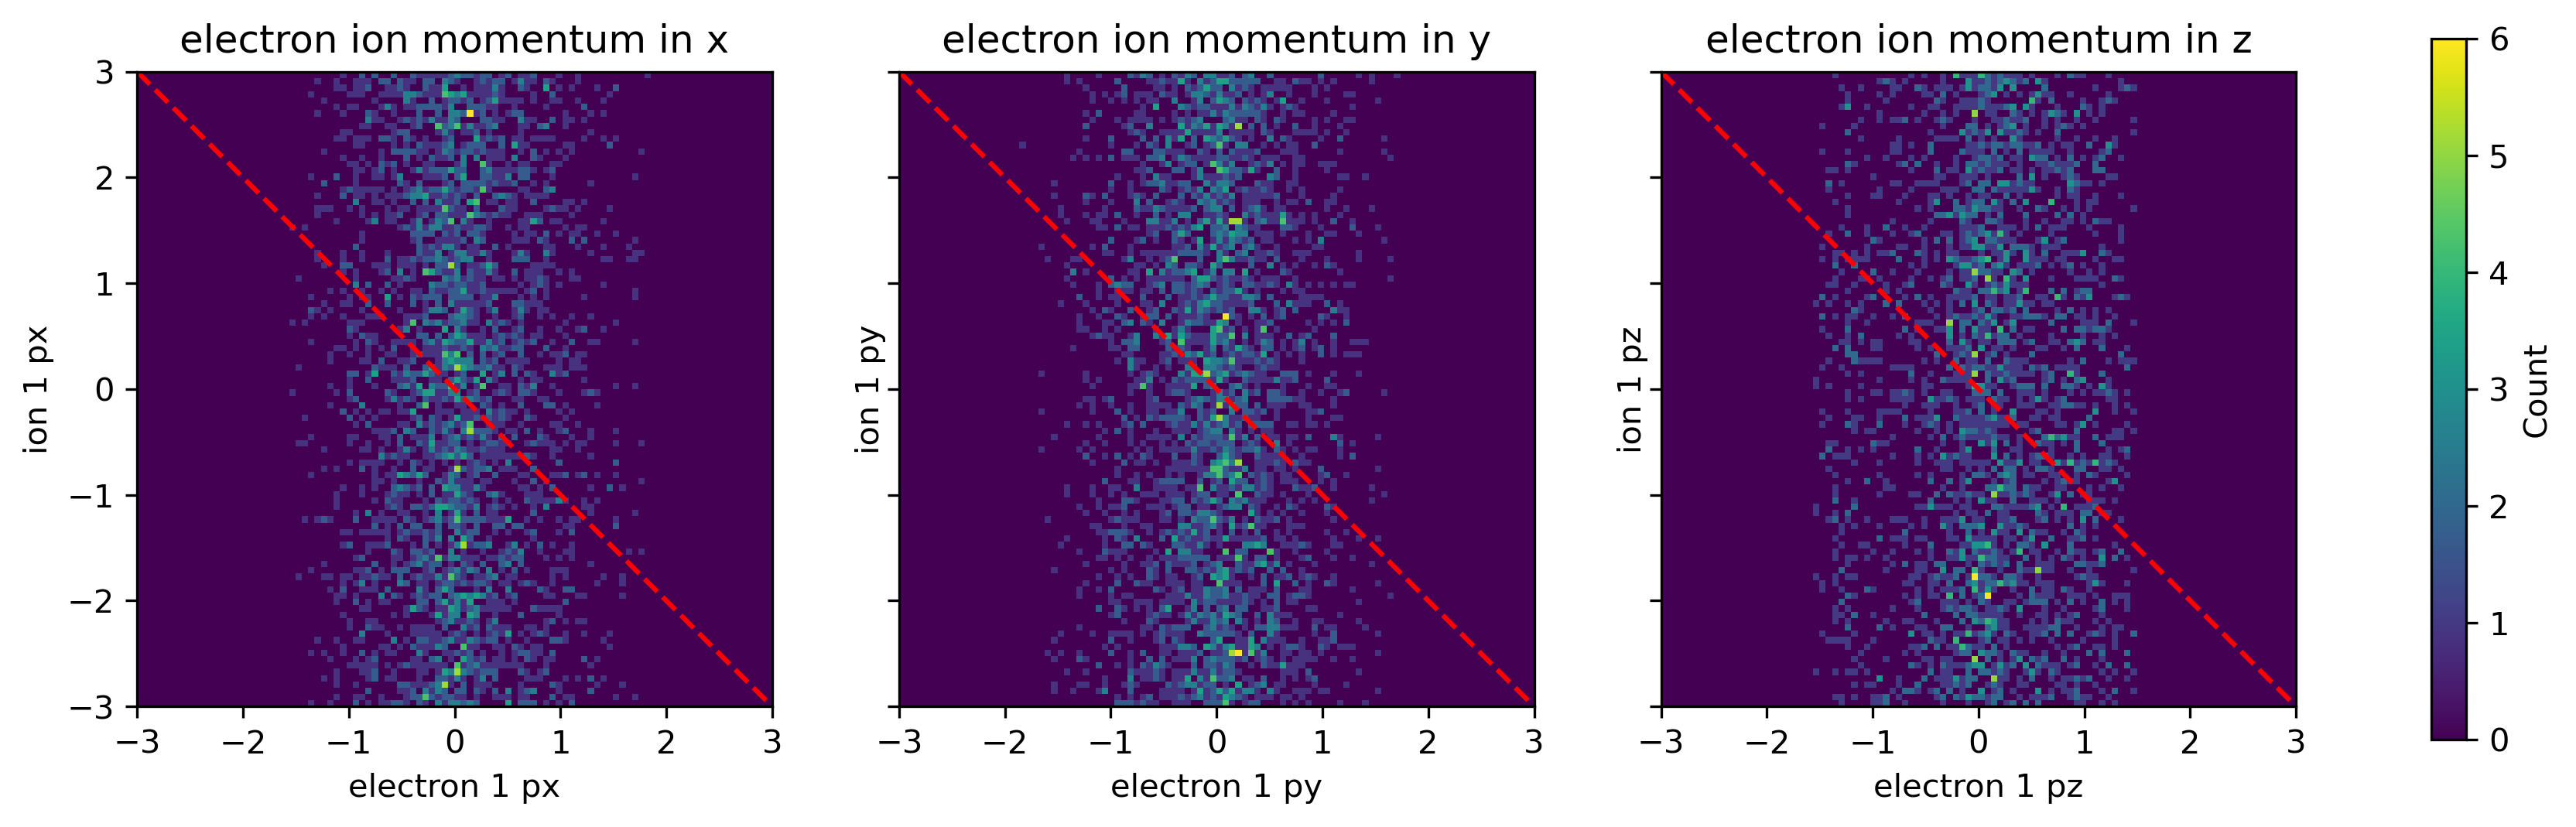

In [102]:
#######################################
#ION MOMENTUM PLOT###################
######################################
# Determine the data range
x_range = (-3, 3)
y_range = (-3, 3)

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True,dpi=300)

# Plot the histograms
hist1 = axs[0].hist2d(e_px0, i_px1, bins=(100, 100), range=[x_range, y_range]);
axs[0].set_aspect('equal')
axs[0].set_title('electron ion momentum in x')
axs[0].set_xlabel('electron 1 px')
axs[0].set_ylabel('ion 1 px')


hist2 = axs[1].hist2d(e_py0, i_py0, bins=(100, 100), range=[x_range, y_range]);
axs[1].set_aspect('equal')
axs[1].set_title('electron ion momentum in y')
axs[1].set_xlabel('electron 1 py')
axs[1].set_ylabel('ion 1 py')

hist3 = axs[2].hist2d(e_pz0, i_pz0, bins=(100, 100), range=[x_range, y_range]);
axs[2].set_aspect('equal');
axs[2].set_title('electron ion momentum in z');
axs[2].set_xlabel('electron 1 pz');
axs[2].set_ylabel('ion 1 pz');

for ax in axs:
    ax.plot([x_range[0], x_range[1]], [y_range[1], y_range[0]], color='red', linestyle='--')

plt.colorbar(hist3[3], ax=axs.ravel().tolist(), label='Count', shrink=0.8)

# Show the plot
plt.show()

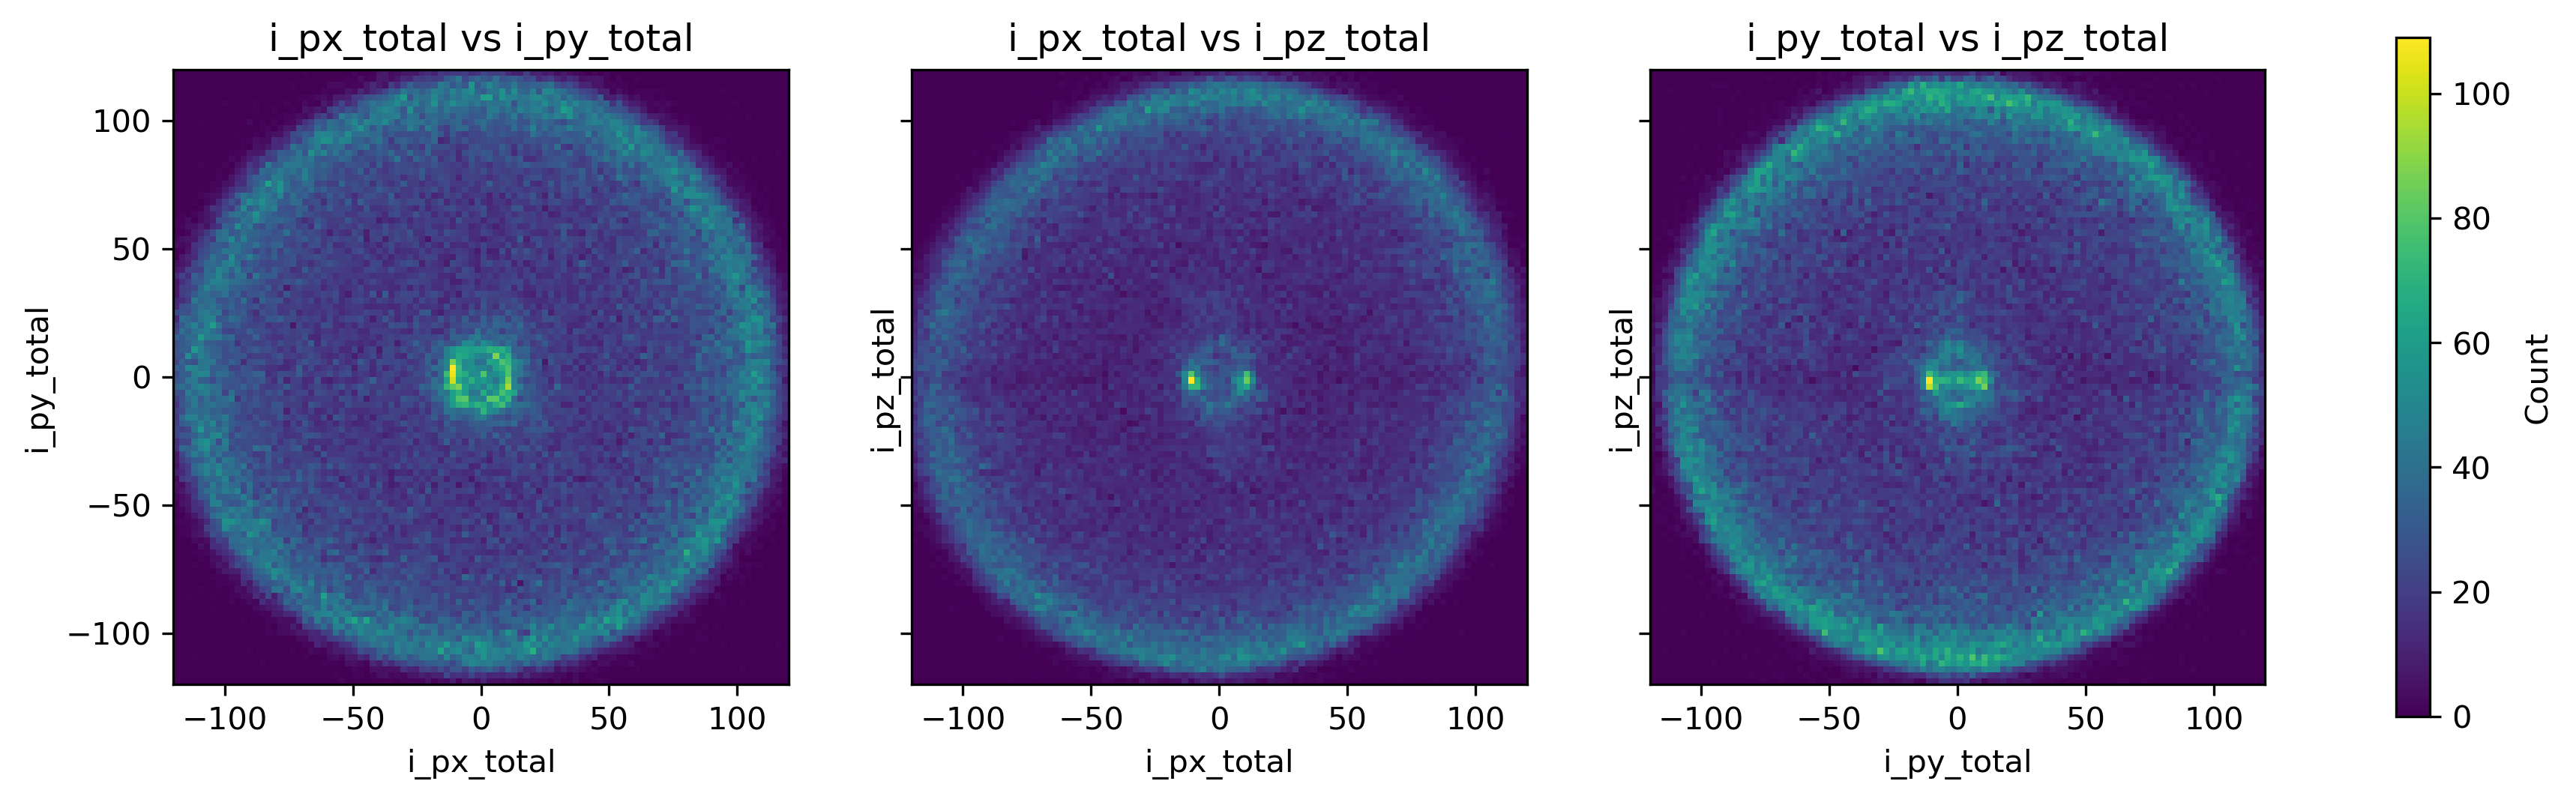

In [103]:
#######################################
#ION MOMENTUM PLOT###################
######################################
if number_of_fragment == 1:
    i_px_total = i_px0
    i_py_total = i_py0
    i_pz_total = i_pz0
elif number_of_fragment == 2:
    i_px_total = np.concatenate((i_px0, i_px1))
    i_py_total = np.concatenate((i_py0, i_py1))
    i_pz_total = np.concatenate((i_pz0, i_pz1))


# Determine the data range
x_range = (-120, 120)
y_range = (-120, 120)

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True,dpi=300)

# Plot the histograms
hist1 = axs[0].hist2d(i_px_total, i_py_total, bins=(100, 100), range=[x_range, y_range])#, cmap='brg')
axs[0].set_aspect('equal')
axs[0].set_title('i_px_total vs i_py_total')
axs[0].set_xlabel('i_px_total')
axs[0].set_ylabel('i_py_total')

hist2 = axs[1].hist2d(i_px_total, i_pz_total, bins=(100, 100), range=[x_range, y_range])#, cmap='brg')
axs[1].set_aspect('equal')
axs[1].set_title('i_px_total vs i_pz_total')
axs[1].set_xlabel('i_px_total')
axs[1].set_ylabel('i_pz_total')

hist3 = axs[2].hist2d(i_py_total, i_pz_total, bins=(100, 100), range=[x_range, y_range])#, cmap='brg')
axs[2].set_aspect('equal')
axs[2].set_title('i_py_total vs i_pz_total')
axs[2].set_xlabel('i_py_total')
axs[2].set_ylabel('i_pz_total')

plt.colorbar(hist3[3], ax=axs.ravel().tolist(), label='Count', shrink=0.8)


# Add circles to each subplot
# for ax in axs:
circle = Circle((0, 0), radius=1.5, color='red', fill=False, linestyle='dashed', linewidth=2)
#axs[0].add_patch(circle)

plt.savefig(folder_path + "\\ion_mom_xy_xz_yz.png")

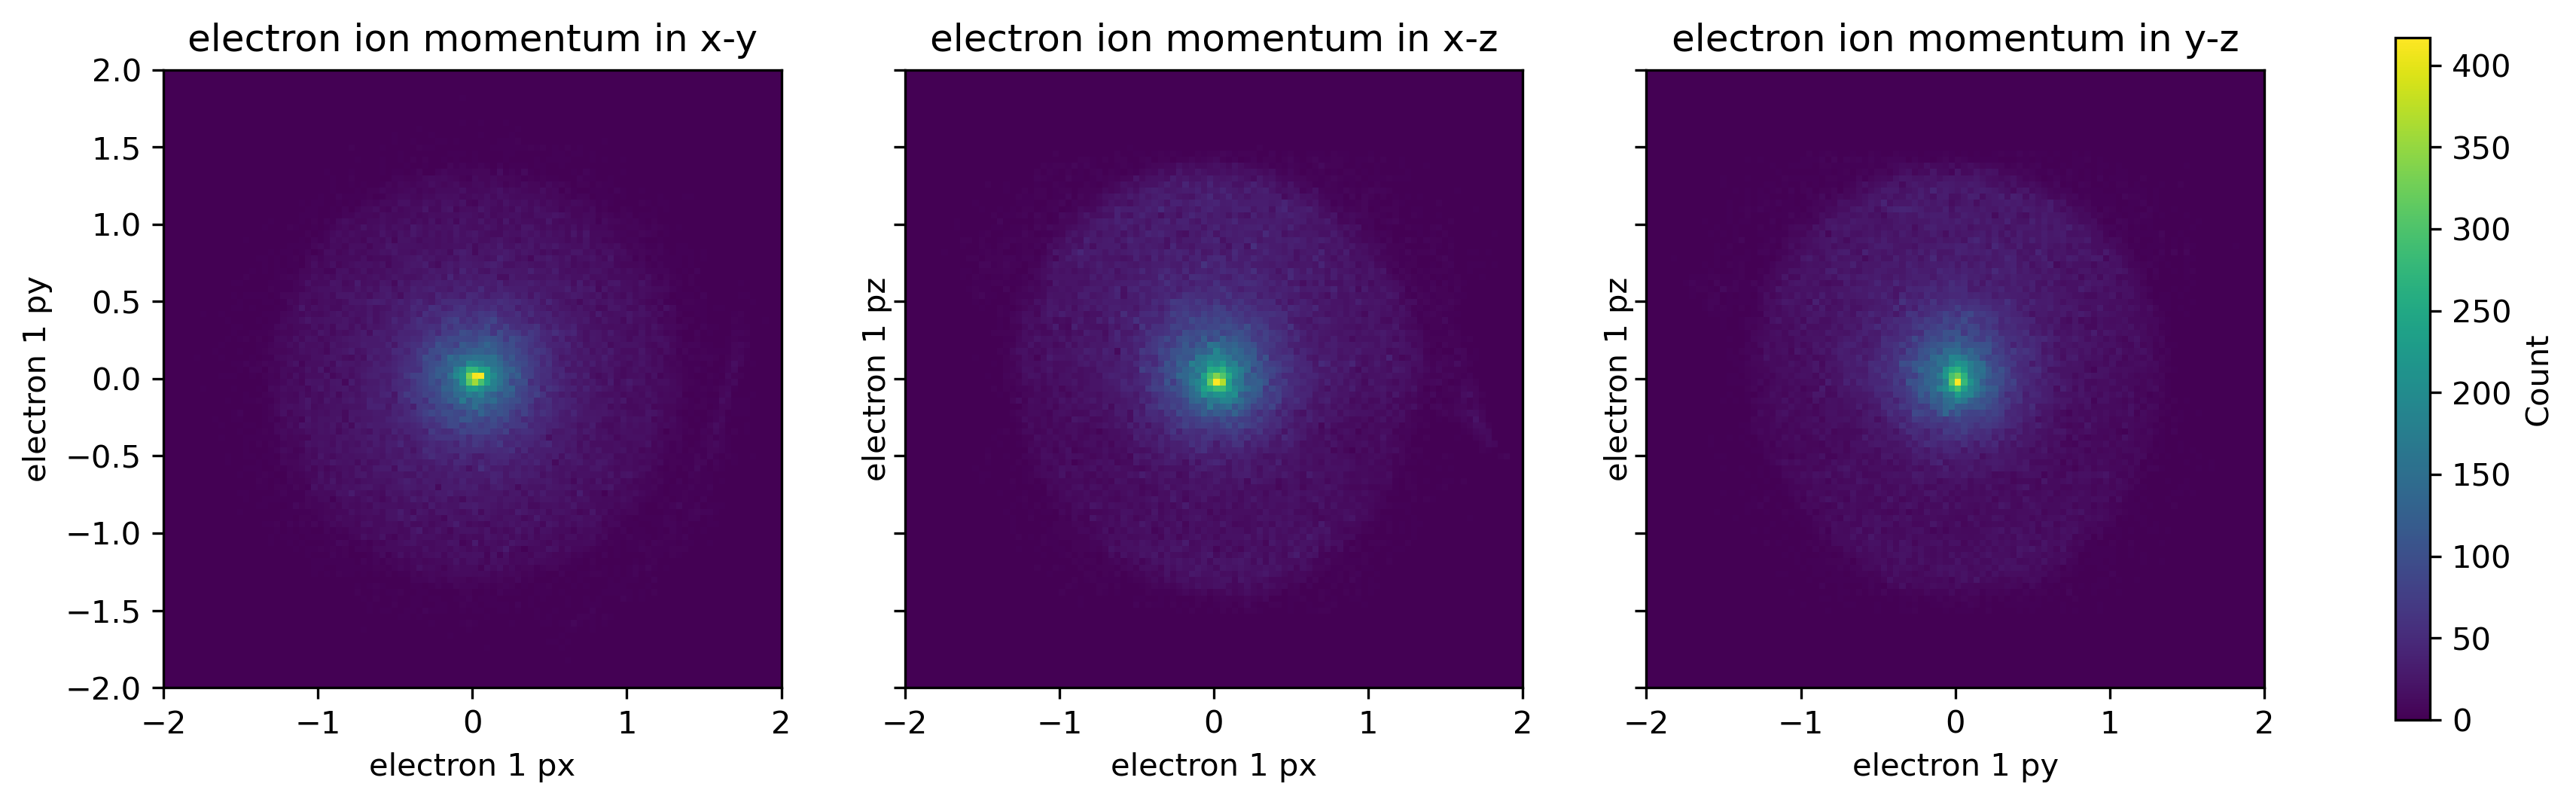

In [104]:
#######################################
#ION MOMENTUM PLOT###################
######################################
# Determine the data range
x_range = (-2, 2)
y_range = (-2, 2)

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True,dpi=300)

# Plot the histograms
hist1 = axs[0].hist2d(e_px0, e_py0, bins=(100, 100), range=[x_range, y_range]);
axs[0].set_aspect('equal')
axs[0].set_title('electron ion momentum in x-y')
axs[0].set_xlabel('electron 1 px')
axs[0].set_ylabel('electron 1 py')


hist2 = axs[1].hist2d(e_px0, e_pz0, bins=(100, 100), range=[x_range, y_range]);
axs[1].set_aspect('equal')
axs[1].set_title('electron ion momentum in x-z')
axs[1].set_xlabel('electron 1 px')
axs[1].set_ylabel('electron 1 pz')

hist3 = axs[2].hist2d(e_py0, e_pz0, bins=(100, 100), range=[x_range, y_range]);
axs[2].set_aspect('equal');
axs[2].set_title('electron ion momentum in y-z');
axs[2].set_xlabel('electron 1 py');
axs[2].set_ylabel('electron 1 pz');

#for ax in axs:
#    ax.plot([x_range[0], x_range[1]], [y_range[1], y_range[0]], color='red', linestyle='--')

plt.colorbar(hist3[3], ax=axs.ravel().tolist(), label='Count', shrink=0.8)

# Show the plot
plt.show()

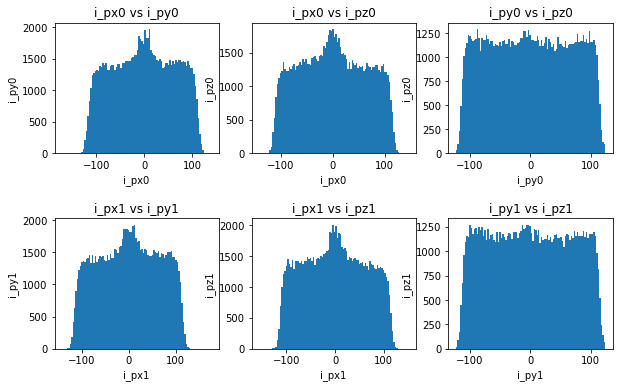

In [105]:
#######################################
#ION MOMENTUM PLOT###################
######################################
fig, axes = plt.subplots(2,3,figsize=(10,6))

axes[0,0].hist(i_px0, bins=(100));
axes[0,1].hist(i_py0, bins=(100));
axes[0,2].hist(i_pz0, bins=(100));
axes[1,0].hist(i_px1, bins=(100));
axes[1,1].hist(i_py1, bins=(100));
axes[1,2].hist(i_pz1, bins=(100));

axes[0, 0].set_title('i_px0 vs i_py0')
axes[0, 1].set_title('i_px0 vs i_pz0')
axes[0, 2].set_title('i_py0 vs i_pz0')
axes[1, 0].set_title('i_px1 vs i_py1')
axes[1, 1].set_title('i_px1 vs i_pz1')
axes[1, 2].set_title('i_py1 vs i_pz1')

axes[0, 0].set_xlabel('i_px0')
axes[0, 1].set_xlabel('i_px0')
axes[0, 2].set_xlabel('i_py0')
axes[1, 0].set_xlabel('i_px1')
axes[1, 1].set_xlabel('i_px1')
axes[1, 2].set_xlabel('i_py1')

axes[0, 0].set_ylabel('i_py0')
axes[0, 1].set_ylabel('i_pz0')
axes[0, 2].set_ylabel('i_pz0')
axes[1, 0].set_ylabel('i_py1')
axes[1, 1].set_ylabel('i_pz1')
axes[1, 2].set_ylabel('i_pz1')

plt.subplots_adjust(hspace=0.5)


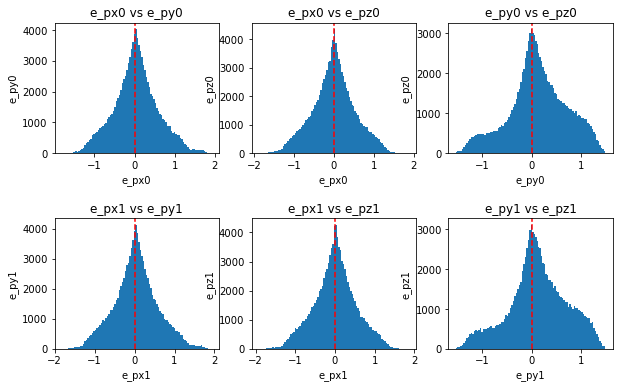

In [106]:
#######################################
#ION MOMENTUM PLOT###################
######################################
fig, axes = plt.subplots(2,3,figsize=(10,6))

axes[0,0].hist(e_px0, bins=(100));
axes[0,1].hist(e_py0, bins=(100));
axes[0,2].hist(e_pz0, bins=(100));
axes[1,0].hist(e_px1, bins=(100));
axes[1,1].hist(e_py1, bins=(100));
axes[1,2].hist(e_pz1, bins=(100));

axes[0, 0].set_title('e_px0 vs e_py0')
axes[0, 1].set_title('e_px0 vs e_pz0')
axes[0, 2].set_title('e_py0 vs e_pz0')
axes[1, 0].set_title('e_px1 vs e_py1')
axes[1, 1].set_title('e_px1 vs e_pz1')
axes[1, 2].set_title('e_py1 vs e_pz1')

axes[0, 0].set_xlabel('e_px0')
axes[0, 1].set_xlabel('e_px0')
axes[0, 2].set_xlabel('e_py0')
axes[1, 0].set_xlabel('e_px1')
axes[1, 1].set_xlabel('e_px1')
axes[1, 2].set_xlabel('e_py1')

axes[0, 0].set_ylabel('e_py0')
axes[0, 1].set_ylabel('e_pz0')
axes[0, 2].set_ylabel('e_pz0')
axes[1, 0].set_ylabel('e_py1')
axes[1, 1].set_ylabel('e_pz1')
axes[1, 2].set_ylabel('e_pz1')

for ax_row in axes:
    for ax in ax_row:
        ax.axvline(x=0, color='r', linestyle='--')

plt.subplots_adjust(hspace=0.5)


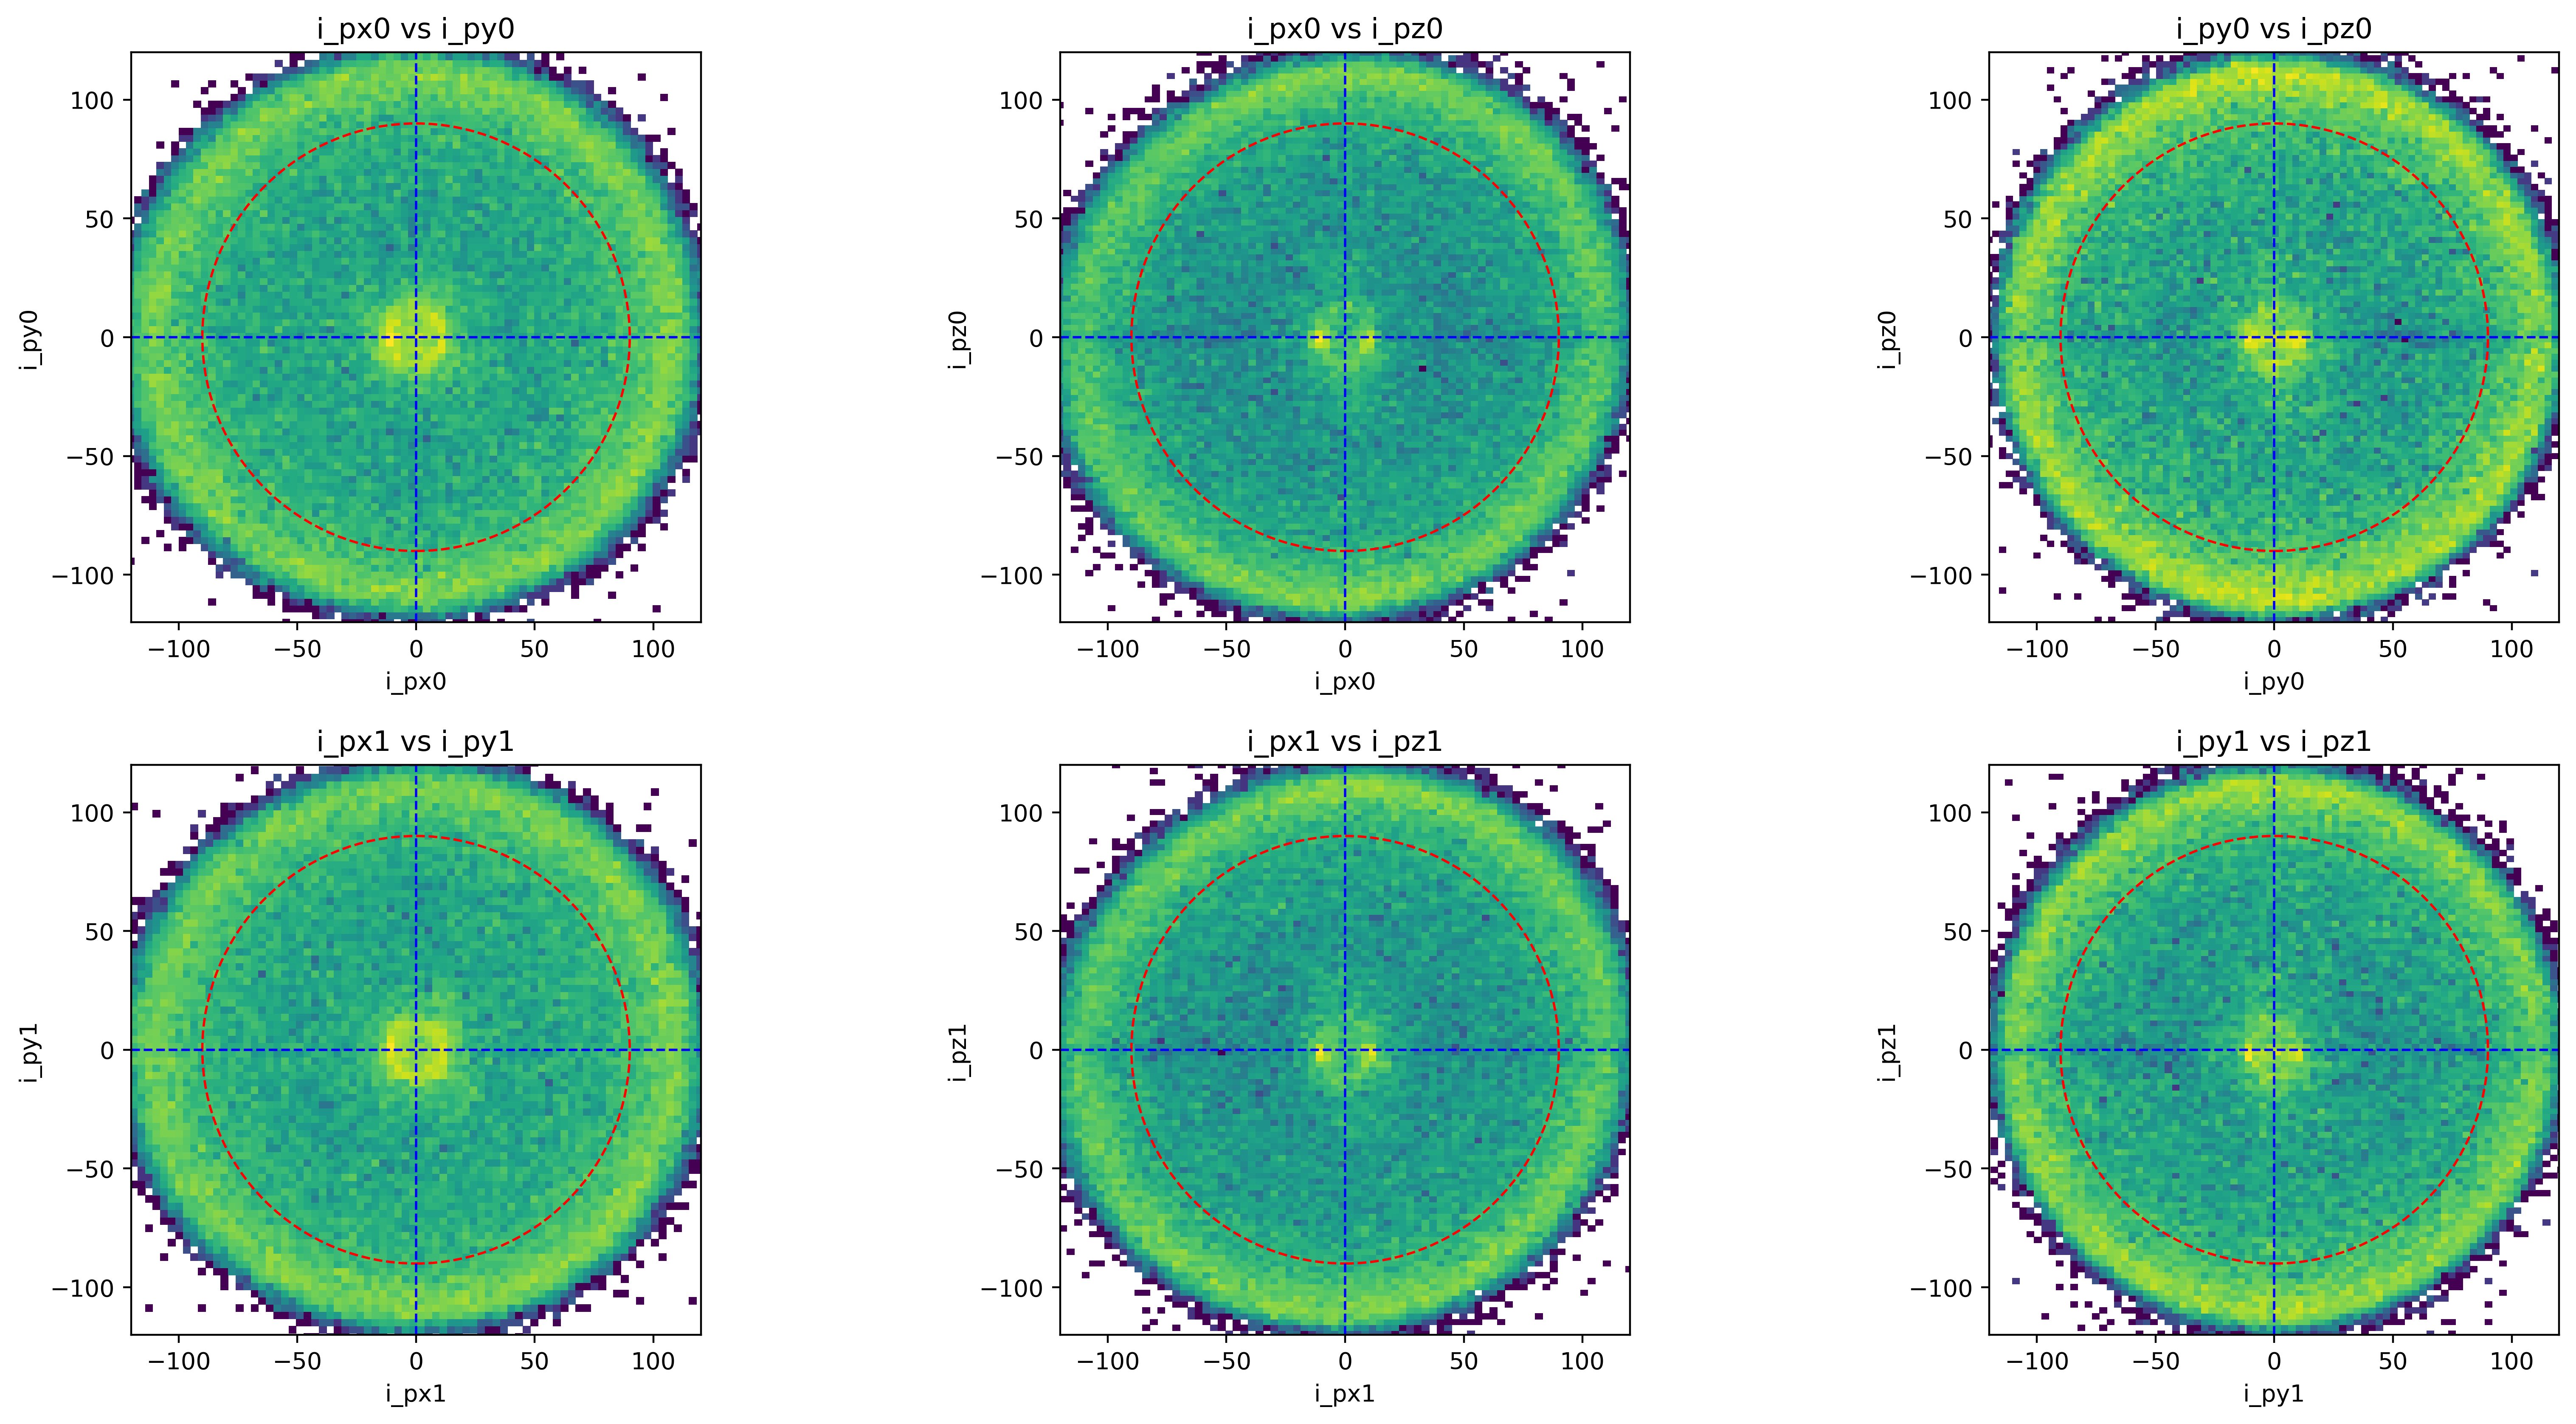

In [107]:
#######################################
#ION MOMENTUM PLOT###################
######################################
fig, axes = plt.subplots(2,3,figsize=(20,10), dpi=400)
data = [i_px0, i_py0, i_pz0, i_px1, i_py1, i_pz1]

axes[0,0].hist2d(i_px0, i_py0, bins=(100,100), norm=LogNorm());
axes[0,1].hist2d(i_px0, i_pz0, bins=(100,100), norm=LogNorm());
axes[0,2].hist2d(i_py0, i_pz0, bins=(100,100), norm=LogNorm());
axes[1,0].hist2d(i_px1, i_py1, bins=(100,100), norm=LogNorm());
axes[1,1].hist2d(i_px1, i_pz1, bins=(100,100), norm=LogNorm());
axes[1,2].hist2d(i_py1, i_pz1, bins=(100,100), norm=LogNorm());

axes[0, 0].set_title('i_px0 vs i_py0')
axes[0, 1].set_title('i_px0 vs i_pz0')
axes[0, 2].set_title('i_py0 vs i_pz0')
axes[1, 0].set_title('i_px1 vs i_py1')
axes[1, 1].set_title('i_px1 vs i_pz1')
axes[1, 2].set_title('i_py1 vs i_pz1')

axes[0, 0].set_xlabel('i_px0')
axes[0, 1].set_xlabel('i_px0')
axes[0, 2].set_xlabel('i_py0')
axes[1, 0].set_xlabel('i_px1')
axes[1, 1].set_xlabel('i_px1')
axes[1, 2].set_xlabel('i_py1')

axes[0, 0].set_ylabel('i_py0')
axes[0, 1].set_ylabel('i_pz0')
axes[0, 2].set_ylabel('i_pz0')
axes[1, 0].set_ylabel('i_py1')
axes[1, 1].set_ylabel('i_pz1')
axes[1, 2].set_ylabel('i_pz1')


for ax in axes.flatten():
    ax.set_aspect('equal')
    ax.set_xlim(-120, 120)
    ax.set_ylim(-120, 120)
    ax.axhline(0, color='blue', linestyle='--', linewidth=1)
    ax.axvline(0, color='blue', linestyle='--', linewidth=1)
    circle = Circle((0, 0), radius=90, color='red', fill=False, linestyle='dashed', linewidth=1)
    ax.add_patch(circle)

plt.subplots_adjust(hspace=0.25)


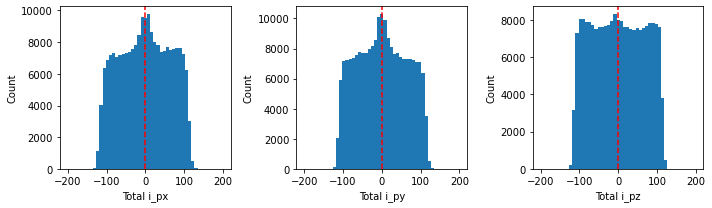

In [108]:
########################################
### ion 1 1-D momentum distributions ###
########################################

bin_left = -200
bin_right = 200

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(10,3))
ax1.hist((np.concatenate((i_px0,i_px1))), bins=np.linspace(bin_left,bin_right,50))
ax1.axvline(0,c='r',ls='--')
ax1.set_xlabel('Total i_px')
ax1.set_ylabel('Count')
ax2.hist((np.concatenate((i_py0,i_py1))), bins=np.linspace(bin_left,bin_right,50))
ax2.axvline(0,c='r',ls='--')
ax2.set_xlabel('Total i_py')
ax2.set_ylabel('Count')
ax3.hist((np.concatenate((i_pz0,i_pz1))), bins=np.linspace(bin_left,bin_right,50))
ax3.axvline(0,c='r',ls='--')
ax3.set_xlabel('Total i_pz')
ax3.set_ylabel('Count')

fig.tight_layout()
#fig.show()

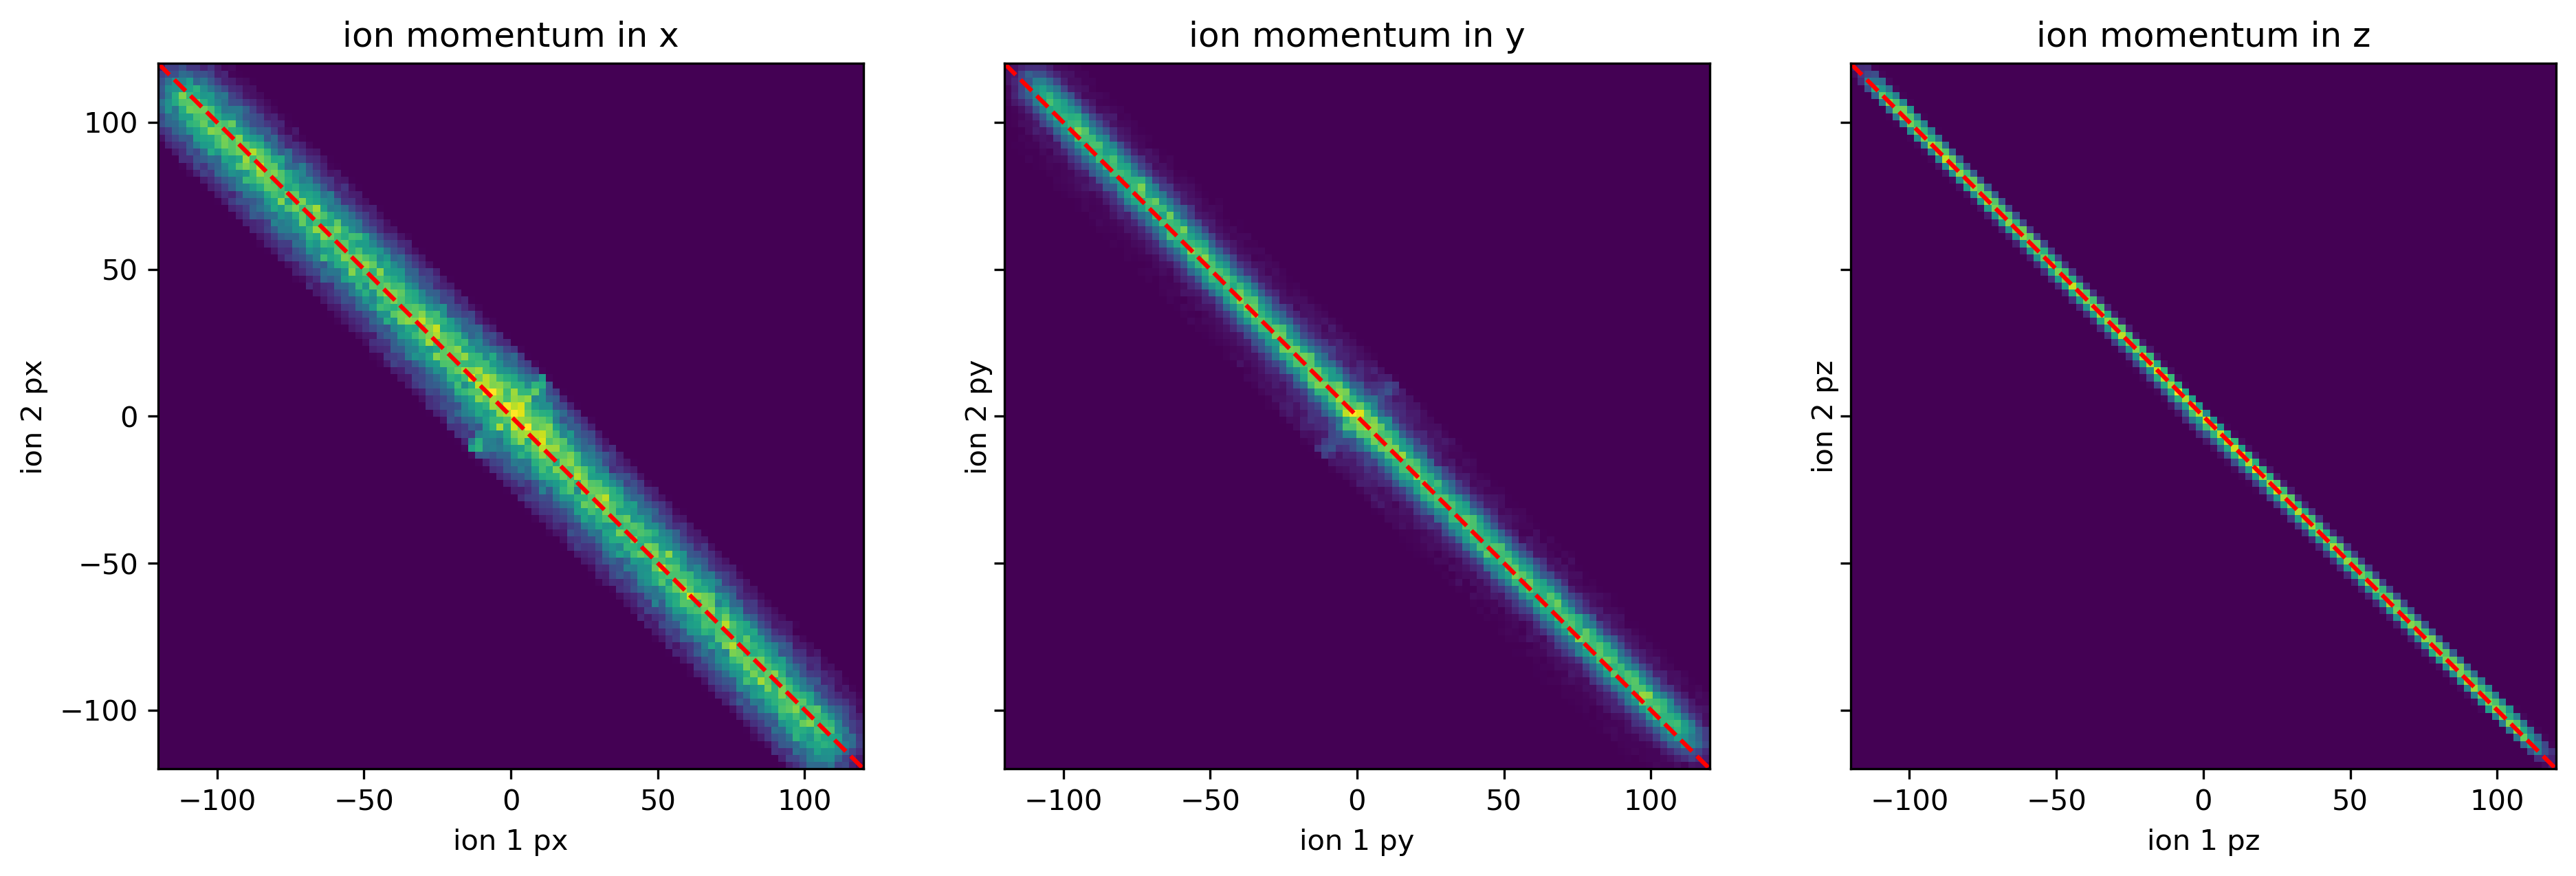

In [109]:
#######################################
#ION MOMENTUM PLOT###################
######################################
# Determine the data range
x_range = (-120, 120)
y_range = (-120, 120)

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True,dpi=300)

# Plot the histograms
hist1 = axs[0].hist2d(i_px0, i_px1, bins=(100, 100), range=[x_range, y_range]);
axs[0].set_aspect('equal')
axs[0].set_title('ion momentum in x')
axs[0].set_xlabel('ion 1 px')
axs[0].set_ylabel('ion 2 px')


hist2 = axs[1].hist2d(i_py0, i_py1, bins=(100, 100), range=[x_range, y_range]);
axs[1].set_aspect('equal')
axs[1].set_title('ion momentum in y')
axs[1].set_xlabel('ion 1 py')
axs[1].set_ylabel('ion 2 py')

hist3 = axs[2].hist2d(i_pz0, i_pz1, bins=(100, 100), range=[x_range, y_range]);
axs[2].set_aspect('equal');
axs[2].set_title('ion momentum in z');
axs[2].set_xlabel('ion 1 pz');
axs[2].set_ylabel('ion 2 pz');

for ax in axs:
    ax.plot([x_range[0], x_range[1]], [y_range[1], y_range[0]], color='red', linestyle='--')

# Show the plot
plt.savefig(folder_path + "\\ion_mom_xx_yy_zz.png")

plt.show()



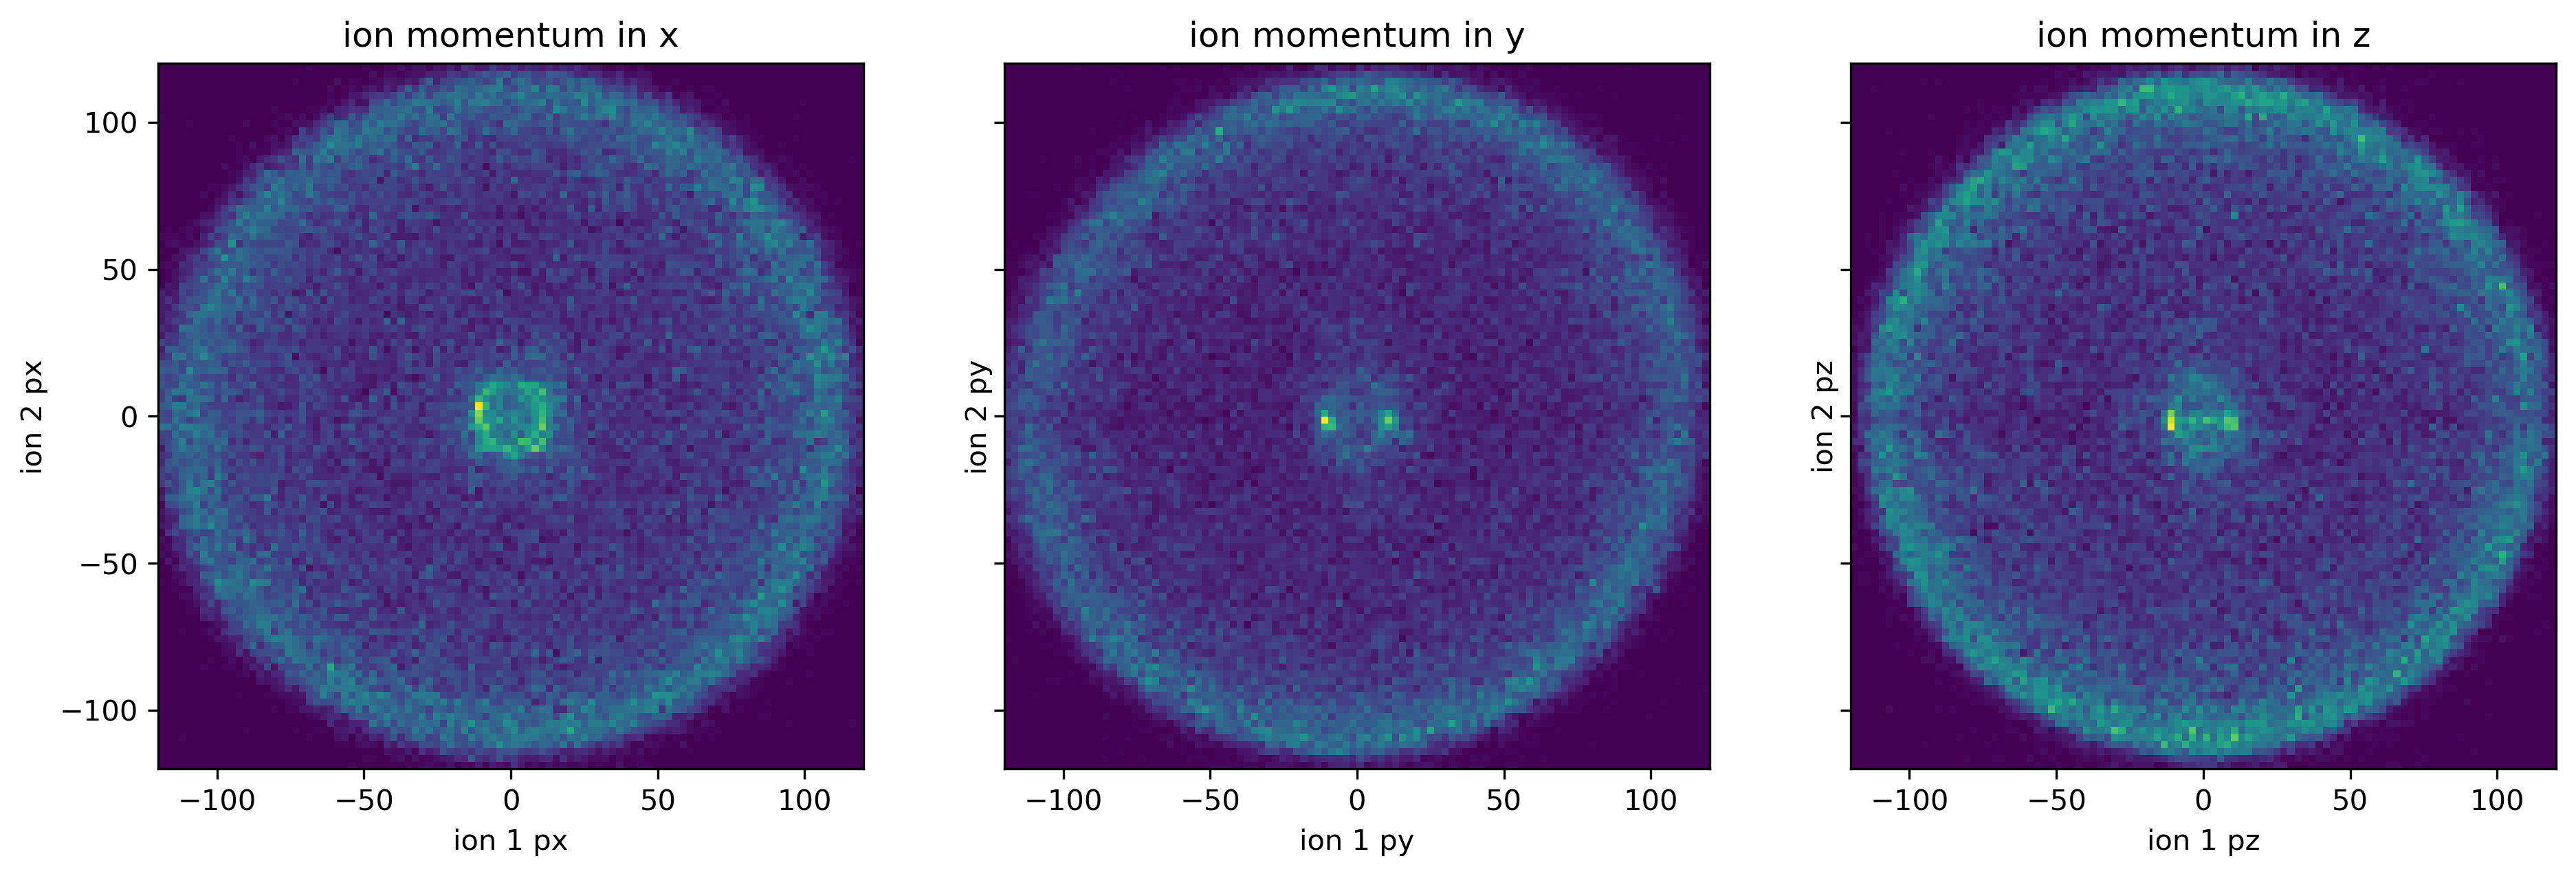

In [110]:
#######################################
#ION MOMENTUM PLOT###################
######################################
# Determine the data range
x_range = (-120, 120)
y_range = (-120, 120)

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True,dpi=300)

# Plot the histograms
hist1 = axs[0].hist2d(i_px1, i_py1, bins=(100, 100), range=[x_range, y_range]);
axs[0].set_aspect('equal')
axs[0].set_title('ion momentum in x')
axs[0].set_xlabel('ion 1 px')
axs[0].set_ylabel('ion 2 px')


hist2 = axs[1].hist2d(i_px1, i_pz1, bins=(100, 100), range=[x_range, y_range]);
axs[1].set_aspect('equal')
axs[1].set_title('ion momentum in y')
axs[1].set_xlabel('ion 1 py')
axs[1].set_ylabel('ion 2 py')

hist3 = axs[2].hist2d(i_py1, i_pz1, bins=(100, 100), range=[x_range, y_range]);
axs[2].set_aspect('equal');
axs[2].set_title('ion momentum in z');
axs[2].set_xlabel('ion 1 pz');
axs[2].set_ylabel('ion 2 pz');


# Show the plot
plt.savefig(folder_path + "\\ion_mom_xx_yy_zz.png")

plt.show()



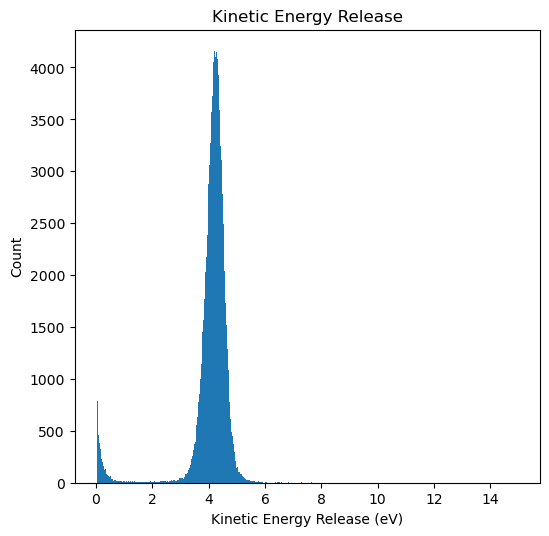

In [111]:
p1 = np.sqrt((i_px0**2+i_py0**2+i_pz0**2))
p2 = np.sqrt((i_px1**2+i_py1**2+i_pz1**2))
KE1 = p1*p1/(2*m1)/MASSAU*EVAU;
KE2 = p2*p2/(2*m2)/MASSAU*EVAU;
if number_of_fragment == 1:
    KER = KE1
elif number_of_fragment == 2: 
    KER = KE1+KE2;


plt.figure(figsize=(6, 6), dpi=100)
# KE1 = 1/(2*14)*np.sqrt((i_px0**2+i_py0**2+i_pz0**2))
# KE2 = 1/(2*14)*np.sqrt((i_px1**2+i_py1**2+i_pz1**2))
# KER = (KE1+KE2)
plt.hist(KER,bins=500, range=(0,15));

# Add labels and title
plt.xlabel('Kinetic Energy Release (eV)');
plt.ylabel('Count');
plt.title('Kinetic Energy Release');

plt.savefig(folder_path + "\\ion_KER.png")

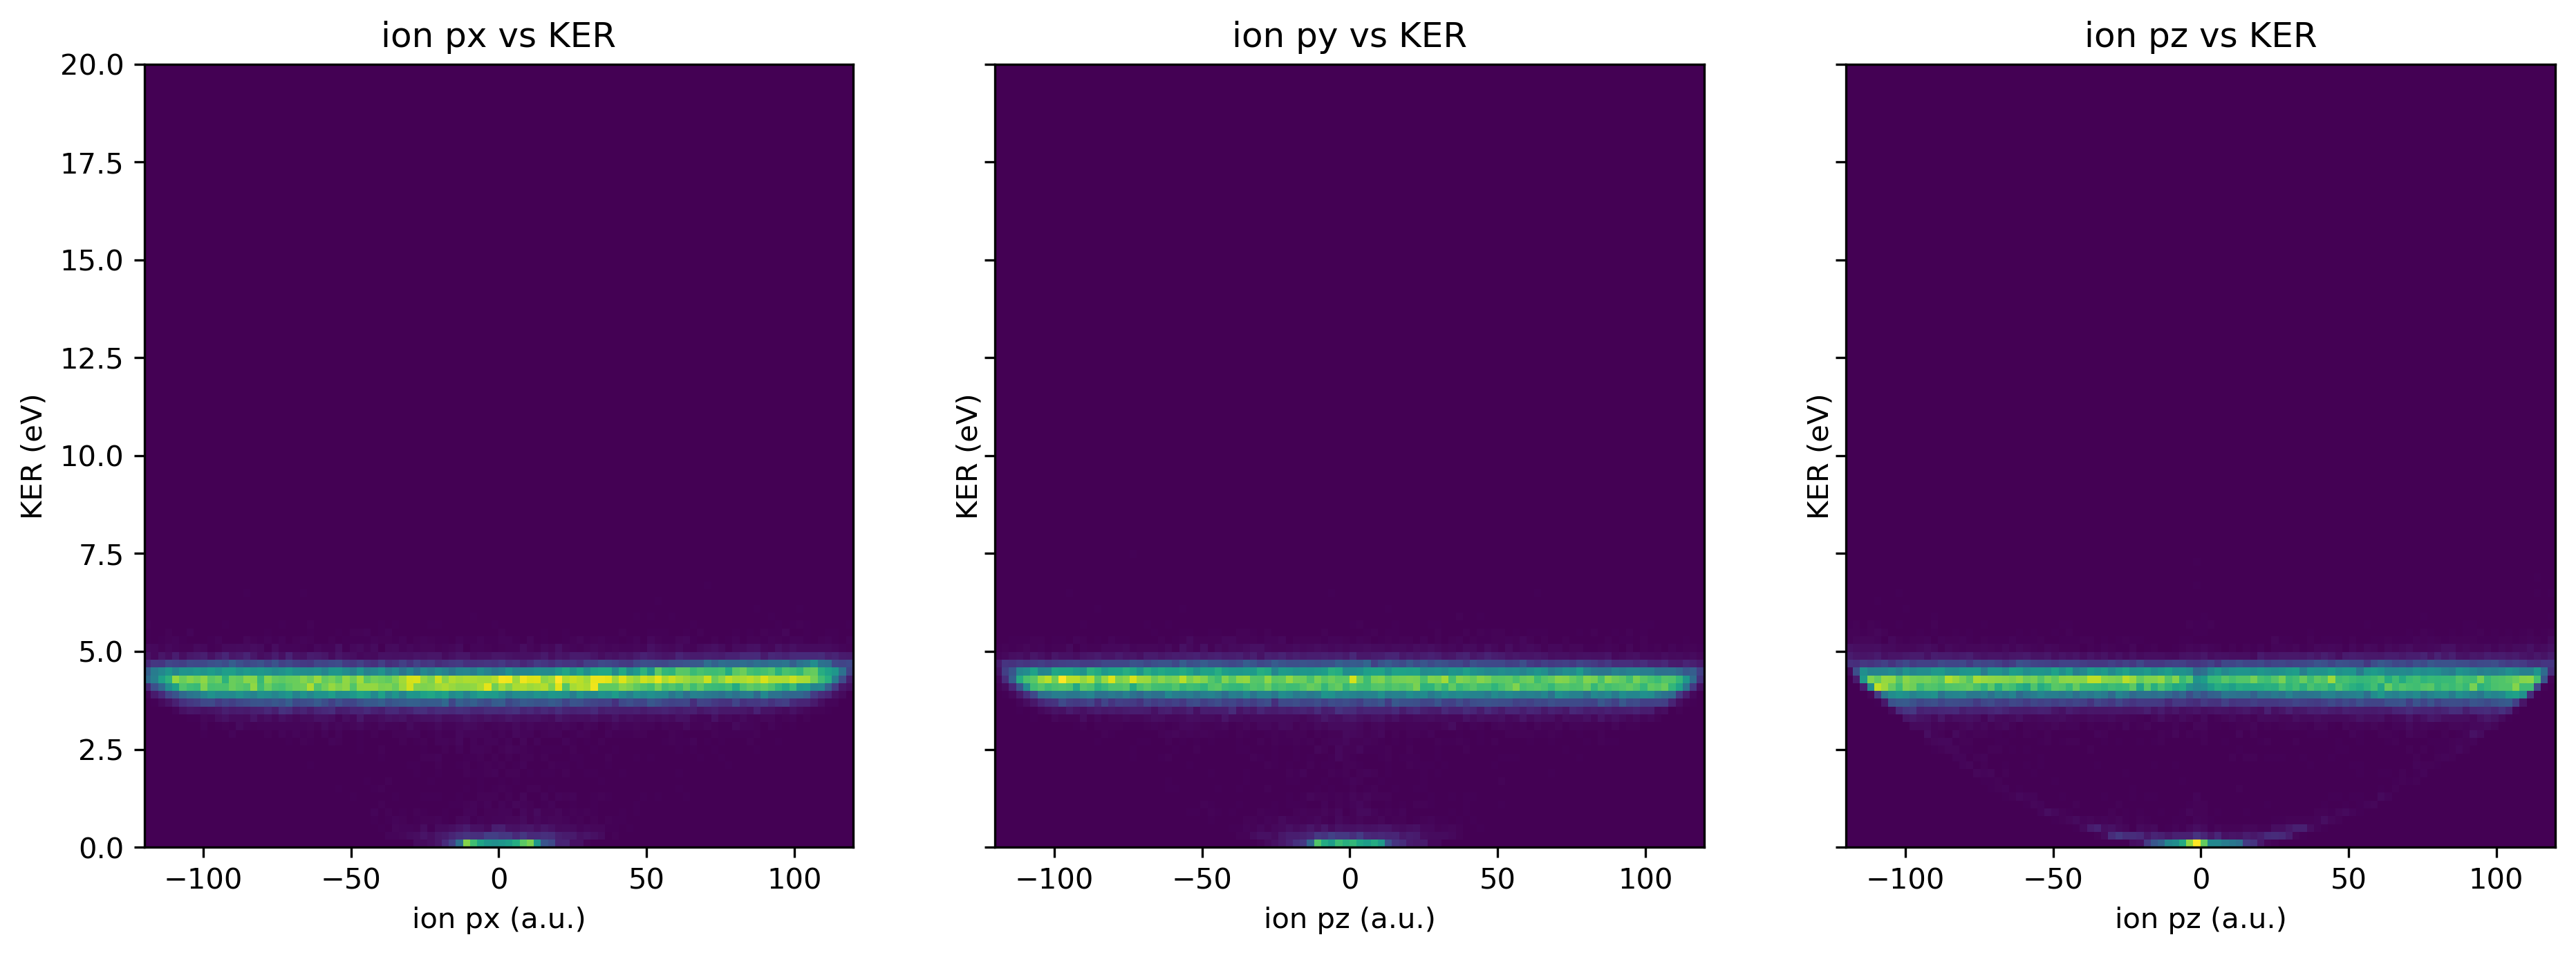

In [112]:
#######################################
#ION MOMENTUM PLOT###################
######################################

# Determine the data range
x_range = (-120, 120)
y_range = (0, 20)

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True,dpi=300)

# Plot the histograms
hist1 = axs[0].hist2d(i_px0, KER, bins=(100, 100), range=[x_range, y_range]);
hist1 = axs[0].hist2d(i_px1, KER, bins=(100, 100), range=[x_range, y_range]);
#axs[0].set_aspect('equal')
axs[0].set_title('ion px vs KER');
axs[0].set_xlabel('ion px (a.u.)');
axs[0].set_ylabel('KER (eV)');


hist2 = axs[1].hist2d(i_py0, KER, bins=(100, 100), range=[x_range, y_range]);
hist2 = axs[1].hist2d(i_py1, KER, bins=(100, 100), range=[x_range, y_range]);
#axs[1].set_aspect('equal')
axs[1].set_title('ion py vs KER');
axs[1].set_xlabel('ion pz (a.u.)');
axs[1].set_ylabel('KER (eV)');

hist3 = axs[2].hist2d(i_pz0, KER, bins=(100, 100), range=[x_range, y_range]);
hist3 = axs[2].hist2d(i_pz1, KER, bins=(100, 100), range=[x_range, y_range]);
#axs[2].set_aspect('equal')
axs[2].set_title('ion pz vs KER');
axs[2].set_xlabel('ion pz (a.u.)');
axs[2].set_ylabel('KER (eV)');

plt.savefig(folder_path+"\\ion_mom_vs_KER.png")

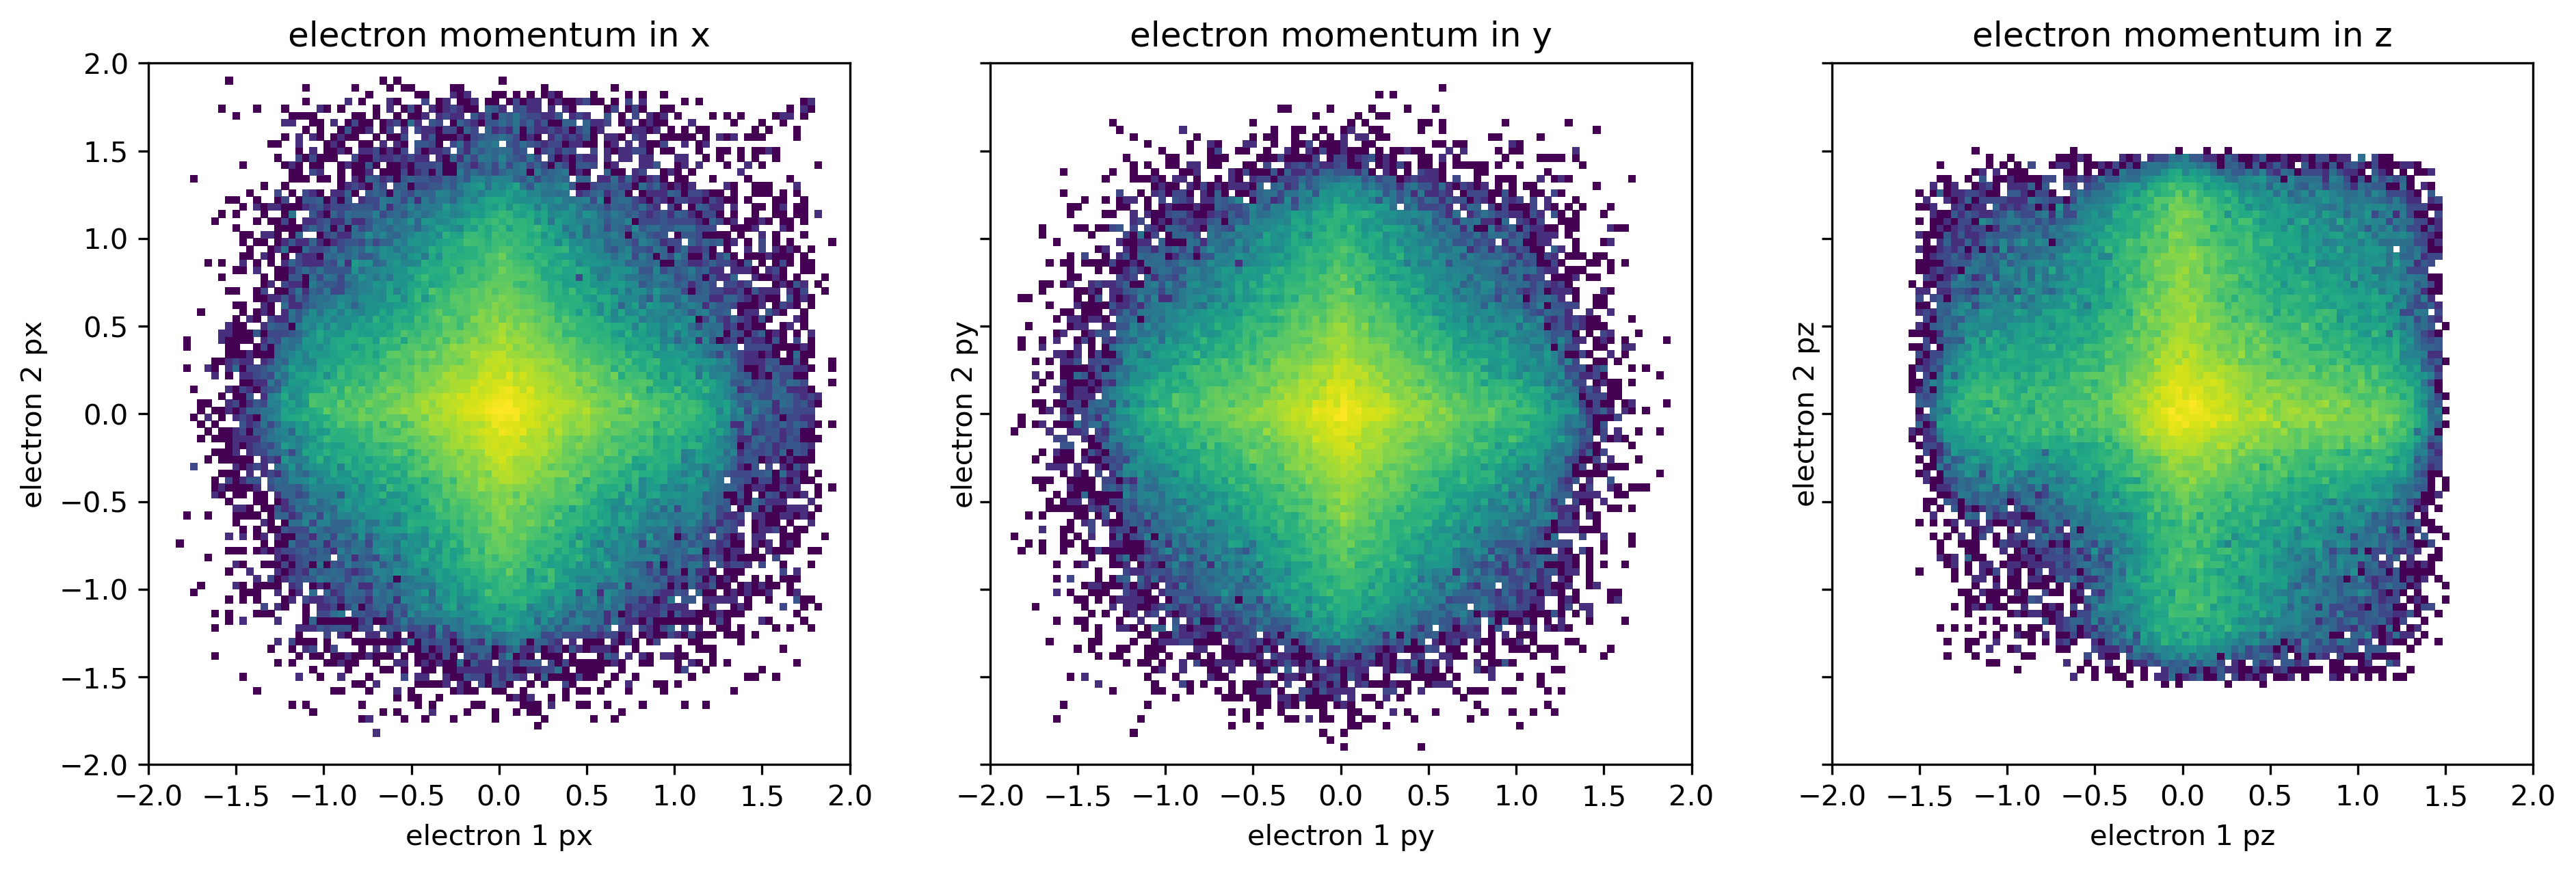

In [113]:
#######################################
#Electron MOMENTUM PLOT###################
######################################
# Determine the data range
x_range = (-2, 2)
y_range = (-2, 2)

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True,dpi=300)

# Plot the histograms
hist1 = axs[0].hist2d(e_px0, e_px1, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
axs[0].set_aspect('equal')
axs[0].set_title('electron momentum in x')
axs[0].set_xlabel('electron 1 px')
axs[0].set_ylabel('electron 2 px')


hist2 = axs[1].hist2d(e_py0, e_py1, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
axs[1].set_aspect('equal')
axs[1].set_title('electron momentum in y')
axs[1].set_xlabel('electron 1 py')
axs[1].set_ylabel('electron 2 py')

hist3 = axs[2].hist2d(e_pz0, e_pz1, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
axs[2].set_aspect('equal');
axs[2].set_title('electron momentum in z');
axs[2].set_xlabel('electron 1 pz');
axs[2].set_ylabel('electron 2 pz');

#for ax in axs:
    #ax.plot([x_range[0], x_range[1]], [y_range[1], y_range[0]], color='red', linestyle='--')

# Show the plot
plt.show()

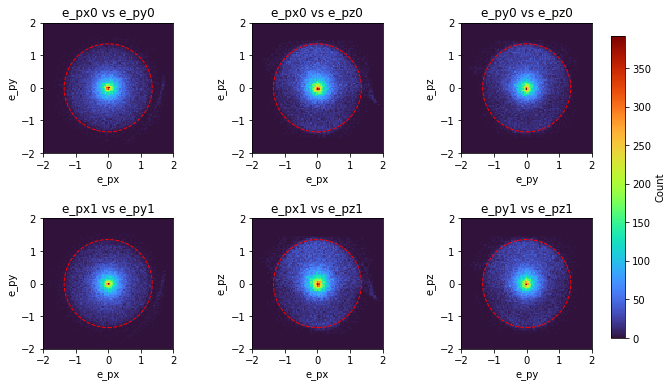

In [114]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.patches import Circle

fig, axes = plt.subplots(2, 3, figsize=(10, 6))

# Assuming e_px0, e_py0, e_pz0, e_px1, e_py1, e_pz1 are defined

x_range = (-2, 2)
y_range = (-2, 2)

hist_kwargs = {
    'bins': (100, 100),
    'range': [x_range, y_range]
}

data_list = [
    (e_px0, e_py0), (e_px0, e_pz0), (e_py0, e_pz0),
    (e_px1, e_py1), (e_px1, e_pz1), (e_py1, e_pz1)
]

titles = [
    'e_px0 vs e_py0', 'e_px0 vs e_pz0', 'e_py0 vs e_pz0',
    'e_px1 vs e_py1', 'e_px1 vs e_pz1', 'e_py1 vs e_pz1'
]

# Collect all histogram counts
all_counts = []
for (data_x, data_y) in data_list:
    counts, _, _ = np.histogram2d(data_x, data_y, **hist_kwargs)
    all_counts.extend(counts.ravel())

# Calculate the maximum count
max_count = max(all_counts)

for ax, (data_x, data_y), title in zip(axes.flatten(), data_list, titles):
    hist = ax.hist2d(data_x, data_y, **hist_kwargs, cmap='turbo')
    ax.set_aspect('equal')
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_xlabel('e_px' if 'px' in title else 'e_py' if 'py' in title else 'e_pz')
    ax.set_ylabel('e_pz' if 'pz' in title else 'e_py' if 'py' in title else 'e_px')
    ax.set_title(title)
    circle = Circle((0, 0), radius=1.35, color='red', fill=False, linestyle='dashed', linewidth=1)
    ax.add_patch(circle)

# Create a color bar with a separate axis
cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(hist[3], cax=cax, label='Count')

plt.subplots_adjust(hspace=0.5, wspace=0.5)

plt.savefig(folder_path + "\\e_mom_xyz.png")
plt.show()


[10.97237526 16.9475651  24.39777238 ... 14.44408792 12.76985493
 13.79156408]


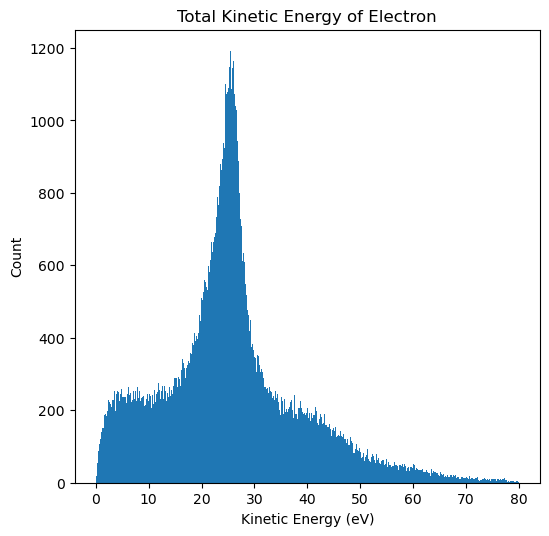

In [115]:
KEe1 = 27.2114*(e_px0**2+e_py0**2+e_pz0**2)/2;
if number_of_fragment == 1:
    KEe2 = KEe1*0
else:
    KEe2 = 27.2114*(e_px1**2+e_py1**2+e_pz1**2)/2;
KERe = KEe1+KEe2;

#total_KEe = 27.2114*(total_e_px**2+total_e_py**2+total_e_pz**2)/2;

plt.figure(figsize=(6, 6), dpi=100);
plt.hist(KERe,bins=500, range=(0,80));
print(KEe2);
# Add labels and title
plt.xlabel('Kinetic Energy (eV)');
plt.ylabel('Count');
plt.title('Total Kinetic Energy of Electron');
#plt.axvline(22,c='r',ls='--')


len(KEe1)
plt.savefig(folder_path+"\\KEe.png")

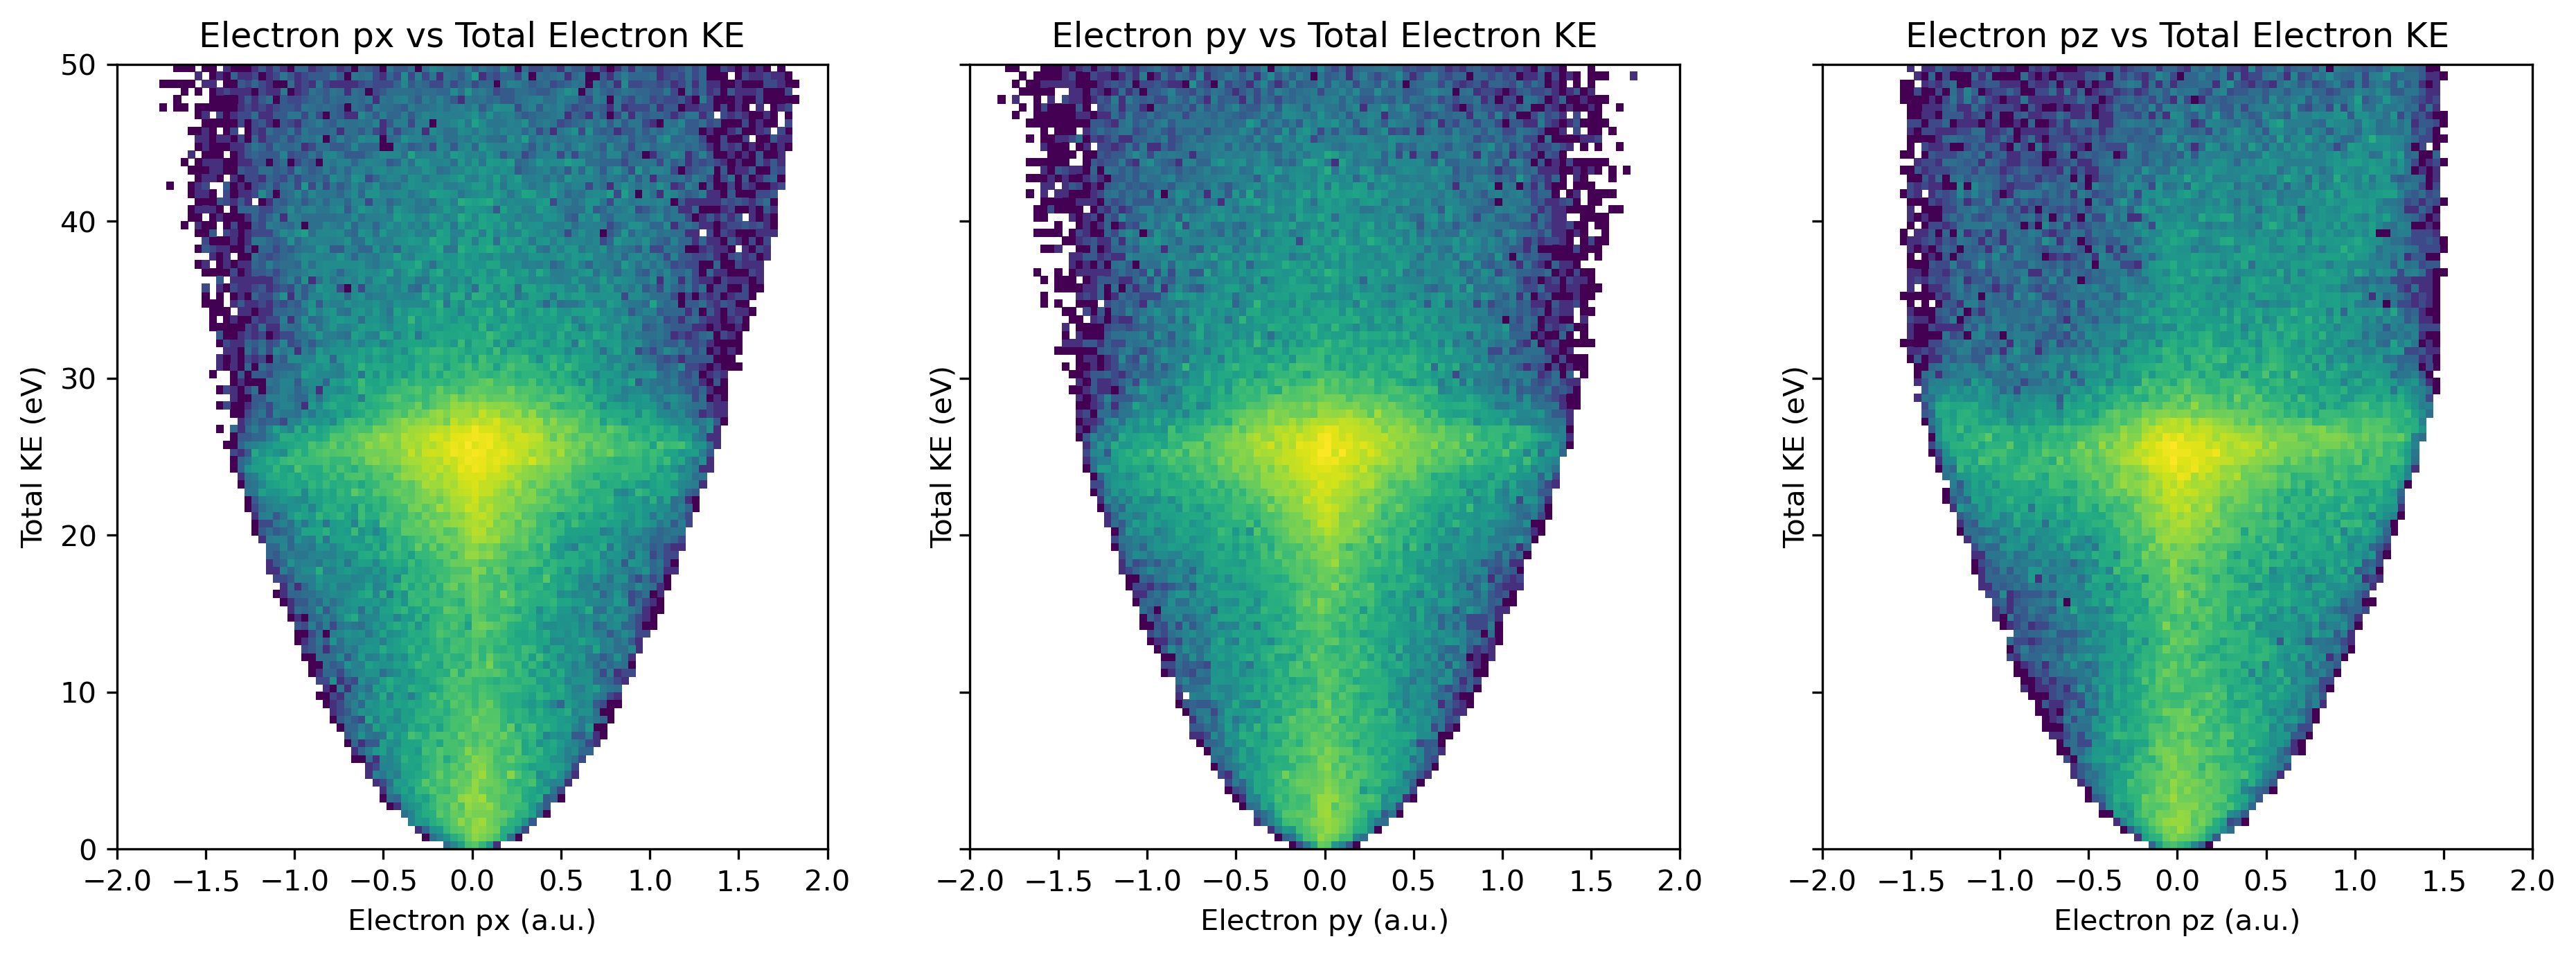

In [116]:
#######################################
#ION MOMENTUM PLOT###################
######################################

# Determine the data range
x_range = (-2, 2)
y_range = (0, 50)

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True,dpi=300)

# Plot the histograms
hist1 = axs[0].hist2d(e_px0, KERe, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
hist1 = axs[0].hist2d(e_px1, KERe, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
#axs[0].set_aspect('equal')
axs[0].set_title('Electron px vs Total Electron KE');
axs[0].set_xlabel('Electron px (a.u.)');
axs[0].set_ylabel('Total KE (eV)');


hist2 = axs[1].hist2d(e_py0, KERe, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
hist2 = axs[1].hist2d(e_py1, KERe, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
#axs[1].set_aspect('equal')
axs[1].set_title('Electron py vs Total Electron KE');
axs[1].set_xlabel('Electron py (a.u.)');
axs[1].set_ylabel('Total KE (eV)');

hist3 = axs[2].hist2d(e_pz0, KERe, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
hist3 = axs[2].hist2d(e_pz1, KERe, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
#axs[2].set_aspect('equal')
axs[2].set_title('Electron pz vs Total Electron KE');
axs[2].set_xlabel('Electron pz (a.u.)');
axs[2].set_ylabel('Total KE (eV)');

plt.savefig(folder_path+"\\e_mom_vs_KERe.png")

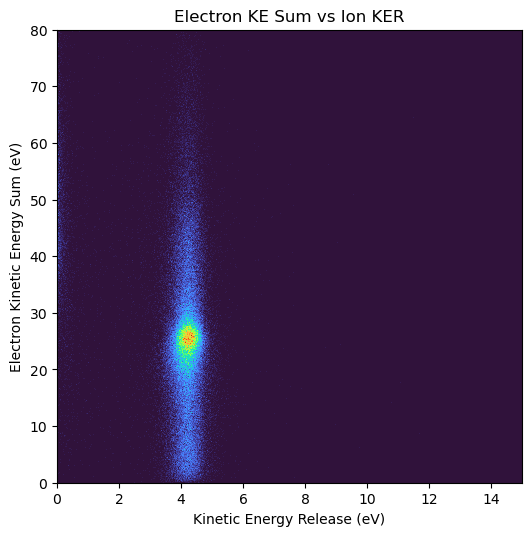

In [117]:
x_range = (0,15);
y_range = (0,80);

plt.figure(figsize=(6, 6), dpi=100);

#plt.hist2d(KER, KERe,bins=(500, 500), range=[x_range,y_range], norm=LogNorm());
if number_of_fragment == 2:
    plt.hist2d(KER, KERe,bins=(500, 500), range=[x_range,y_range],cmap='turbo');#, norm=LogNorm());
elif number_of_fragment == 1:
    plt.hist2d(KER, KEe1,bins=(500, 500), range=[x_range,y_range],cmap='turbo');
# Add labels and title
plt.xlabel('Kinetic Energy Release (eV)');
plt.ylabel('Electron Kinetic Energy Sum (eV)');
plt.title('Electron KE Sum vs Ion KER');
#plt.axvline(28,c='r',ls='--')

#plt.hist2d(KER, KERe, bins=(100,100));
plt.savefig(folder_path+"\\KEe_vs_KER.png")

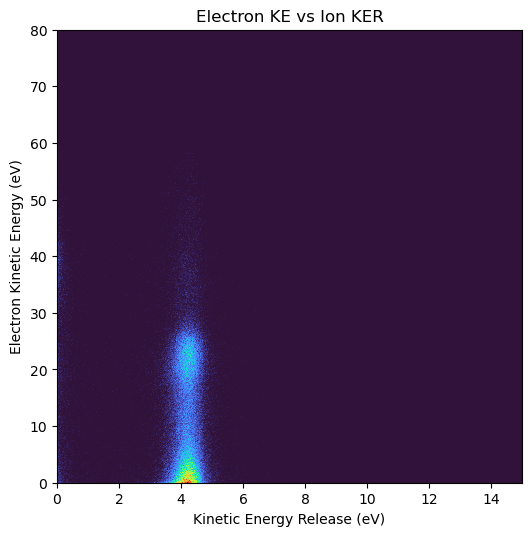

In [118]:
x_range = (0,15);
y_range = (0,80);

plt.figure(figsize=(6, 6), dpi=100);

#plt.hist2d(KER, KERe,bins=(500, 500), range=[x_range,y_range], norm=LogNorm());
if number_of_fragment == 2:
    plt.hist2d(KER, KEe1,bins=(500, 500), range=[x_range,y_range], cmap='turbo');#, norm=LogNorm());
    plt.hist2d(KER, KEe2,bins=(500, 500), range=[x_range,y_range], cmap='turbo');#, norm=LogNorm());
elif number_of_fragment == 1:
    plt.hist2d(KER, KEe1,bins=(500, 500), range=[x_range,y_range], cmap='turbo');#, norm=LogNorm());
    
# Add labels and title
plt.xlabel('Kinetic Energy Release (eV)');
plt.ylabel('Electron Kinetic Energy (eV)');
plt.title('Electron KE vs Ion KER');
#plt.axvline(28,c='r',ls='--')


#plt.hist2d(KER, KERe, bins=(100,100));
plt.savefig(folder_path+"\\KEe_vs_KER.png")

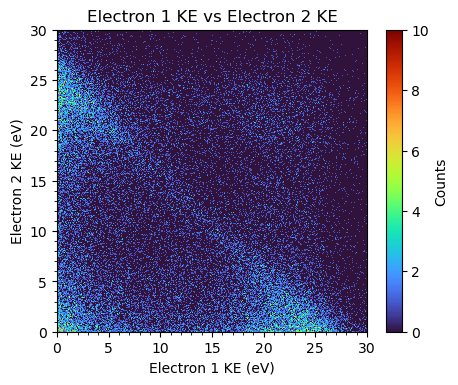

In [119]:
x_range = (0,30);
y_range = (0,30);


plt.figure(figsize=(5,4), dpi=100);
plt.hist2d(KEe1, KEe2,bins=(500, 500), range=[x_range,y_range], cmap='turbo');#, norm=LogNorm());
# Add labels and title
plt.xlabel('Electron 1 KE (eV)');
plt.ylabel('Electron 2 KE (eV)');
plt.title('Electron 1 KE vs Electron 2 KE');
#ax.tick_params(axis='both', which='major', labelsize=12)  # Adjust the font size of major tick labels
#ax.tick_params(axis='both', which='minor', labelsize=10)  # Adjust the font size of minor tick labels
#ax.tick_params(direction='inout', length=6, width=1, colors='black', grid_color='r', grid_alpha=0.5)
#plt.axvline(28,c='r',ls='--')
plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.gca().yaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(5))
plt.colorbar(label='Counts')
#plt.hist2d(KER, KERe, bins=(100,100));


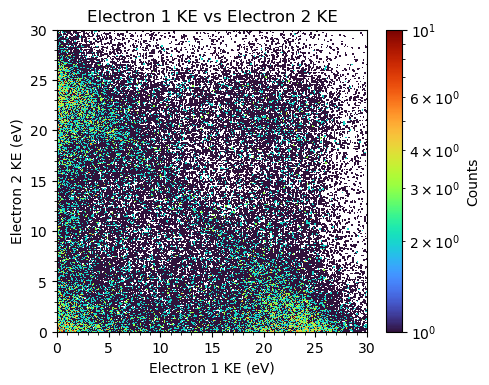

In [120]:
x_range = (0,30);
y_range = (0,30);


plt.figure(figsize=(5,4), dpi=100);
plt.hist2d(KEe1, KEe2,bins=(500, 500), range=[x_range,y_range], cmap='turbo', norm=LogNorm());#, norm=LogNorm());
# Add labels and title
plt.xlabel('Electron 1 KE (eV)');
plt.ylabel('Electron 2 KE (eV)');
plt.title('Electron 1 KE vs Electron 2 KE');
#ax.tick_params(axis='both', which='major', labelsize=12)  # Adjust the font size of major tick labels
#ax.tick_params(axis='both', which='minor', labelsize=10)  # Adjust the font size of minor tick labels
#ax.tick_params(direction='inout', length=6, width=1, colors='black', grid_color='r', grid_alpha=0.5)
#plt.axvline(28,c='r',ls='--')
plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.gca().yaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(5))
plt.colorbar(label='Counts')
#plt.hist2d(KER, KERe, bins=(100,100));


In [121]:
e_px0_b4 = e_px0
e_py0_b4 = e_py0
e_pz0_b4 = e_pz0
e_px1_b4 = e_px1
e_py1_b4 = e_py1
e_pz1_b4 = e_pz1

i_px0_b4 = i_px0
i_py0_b4 = i_py0
i_pz0_b4 = i_pz0
i_px1_b4 = i_px1
i_py1_b4 = i_py1
i_pz1_b4 = i_pz1

## KER Filter

In [122]:
KER_filter = (KER > 3) & (KER < 5.5)
KE_filter = (KERe > 20) & (KERe < 30)
Energy_filter = KER_filter & KE_filter

e_px0 = e_px0_b4[Energy_filter]
e_py0 = e_py0_b4[Energy_filter]
e_pz0 = e_pz0_b4[Energy_filter]
e_px1 = e_px1_b4[Energy_filter]
e_py1 = e_py1_b4[Energy_filter]
e_pz1 = e_pz1_b4[Energy_filter]

i_px0 = i_px0_b4[Energy_filter]
i_py0 = i_py0_b4[Energy_filter]
i_pz0 = i_pz0_b4[Energy_filter]
i_px1 = i_px1_b4[Energy_filter]
i_py1 = i_py1_b4[Energy_filter]
i_pz1 = i_pz1_b4[Energy_filter]

In [123]:
## James don't delete this keep it
##Filter raw data 
e_TOF0_filt = e_TOF0_filt[Energy_filter]
e_TOF1_filt = e_TOF1_filt[Energy_filter]
e_x0_filt = e_x0_filt[Energy_filter]
e_y0_filt = e_y0_filt[Energy_filter]
e_x1_filt = e_x1_filt[Energy_filter]
e_y1_filt = e_y1_filt[Energy_filter]

i_TOF0_filt = i_TOF0_filt[Energy_filter]
i_TOF1_filt = i_TOF1_filt[Energy_filter]
i_x0_filt = i_x0_filt[Energy_filter]
i_y0_filt = i_y0_filt[Energy_filter]
i_x1_filt = i_x1_filt[Energy_filter]
i_y1_filt = i_y1_filt[Energy_filter]


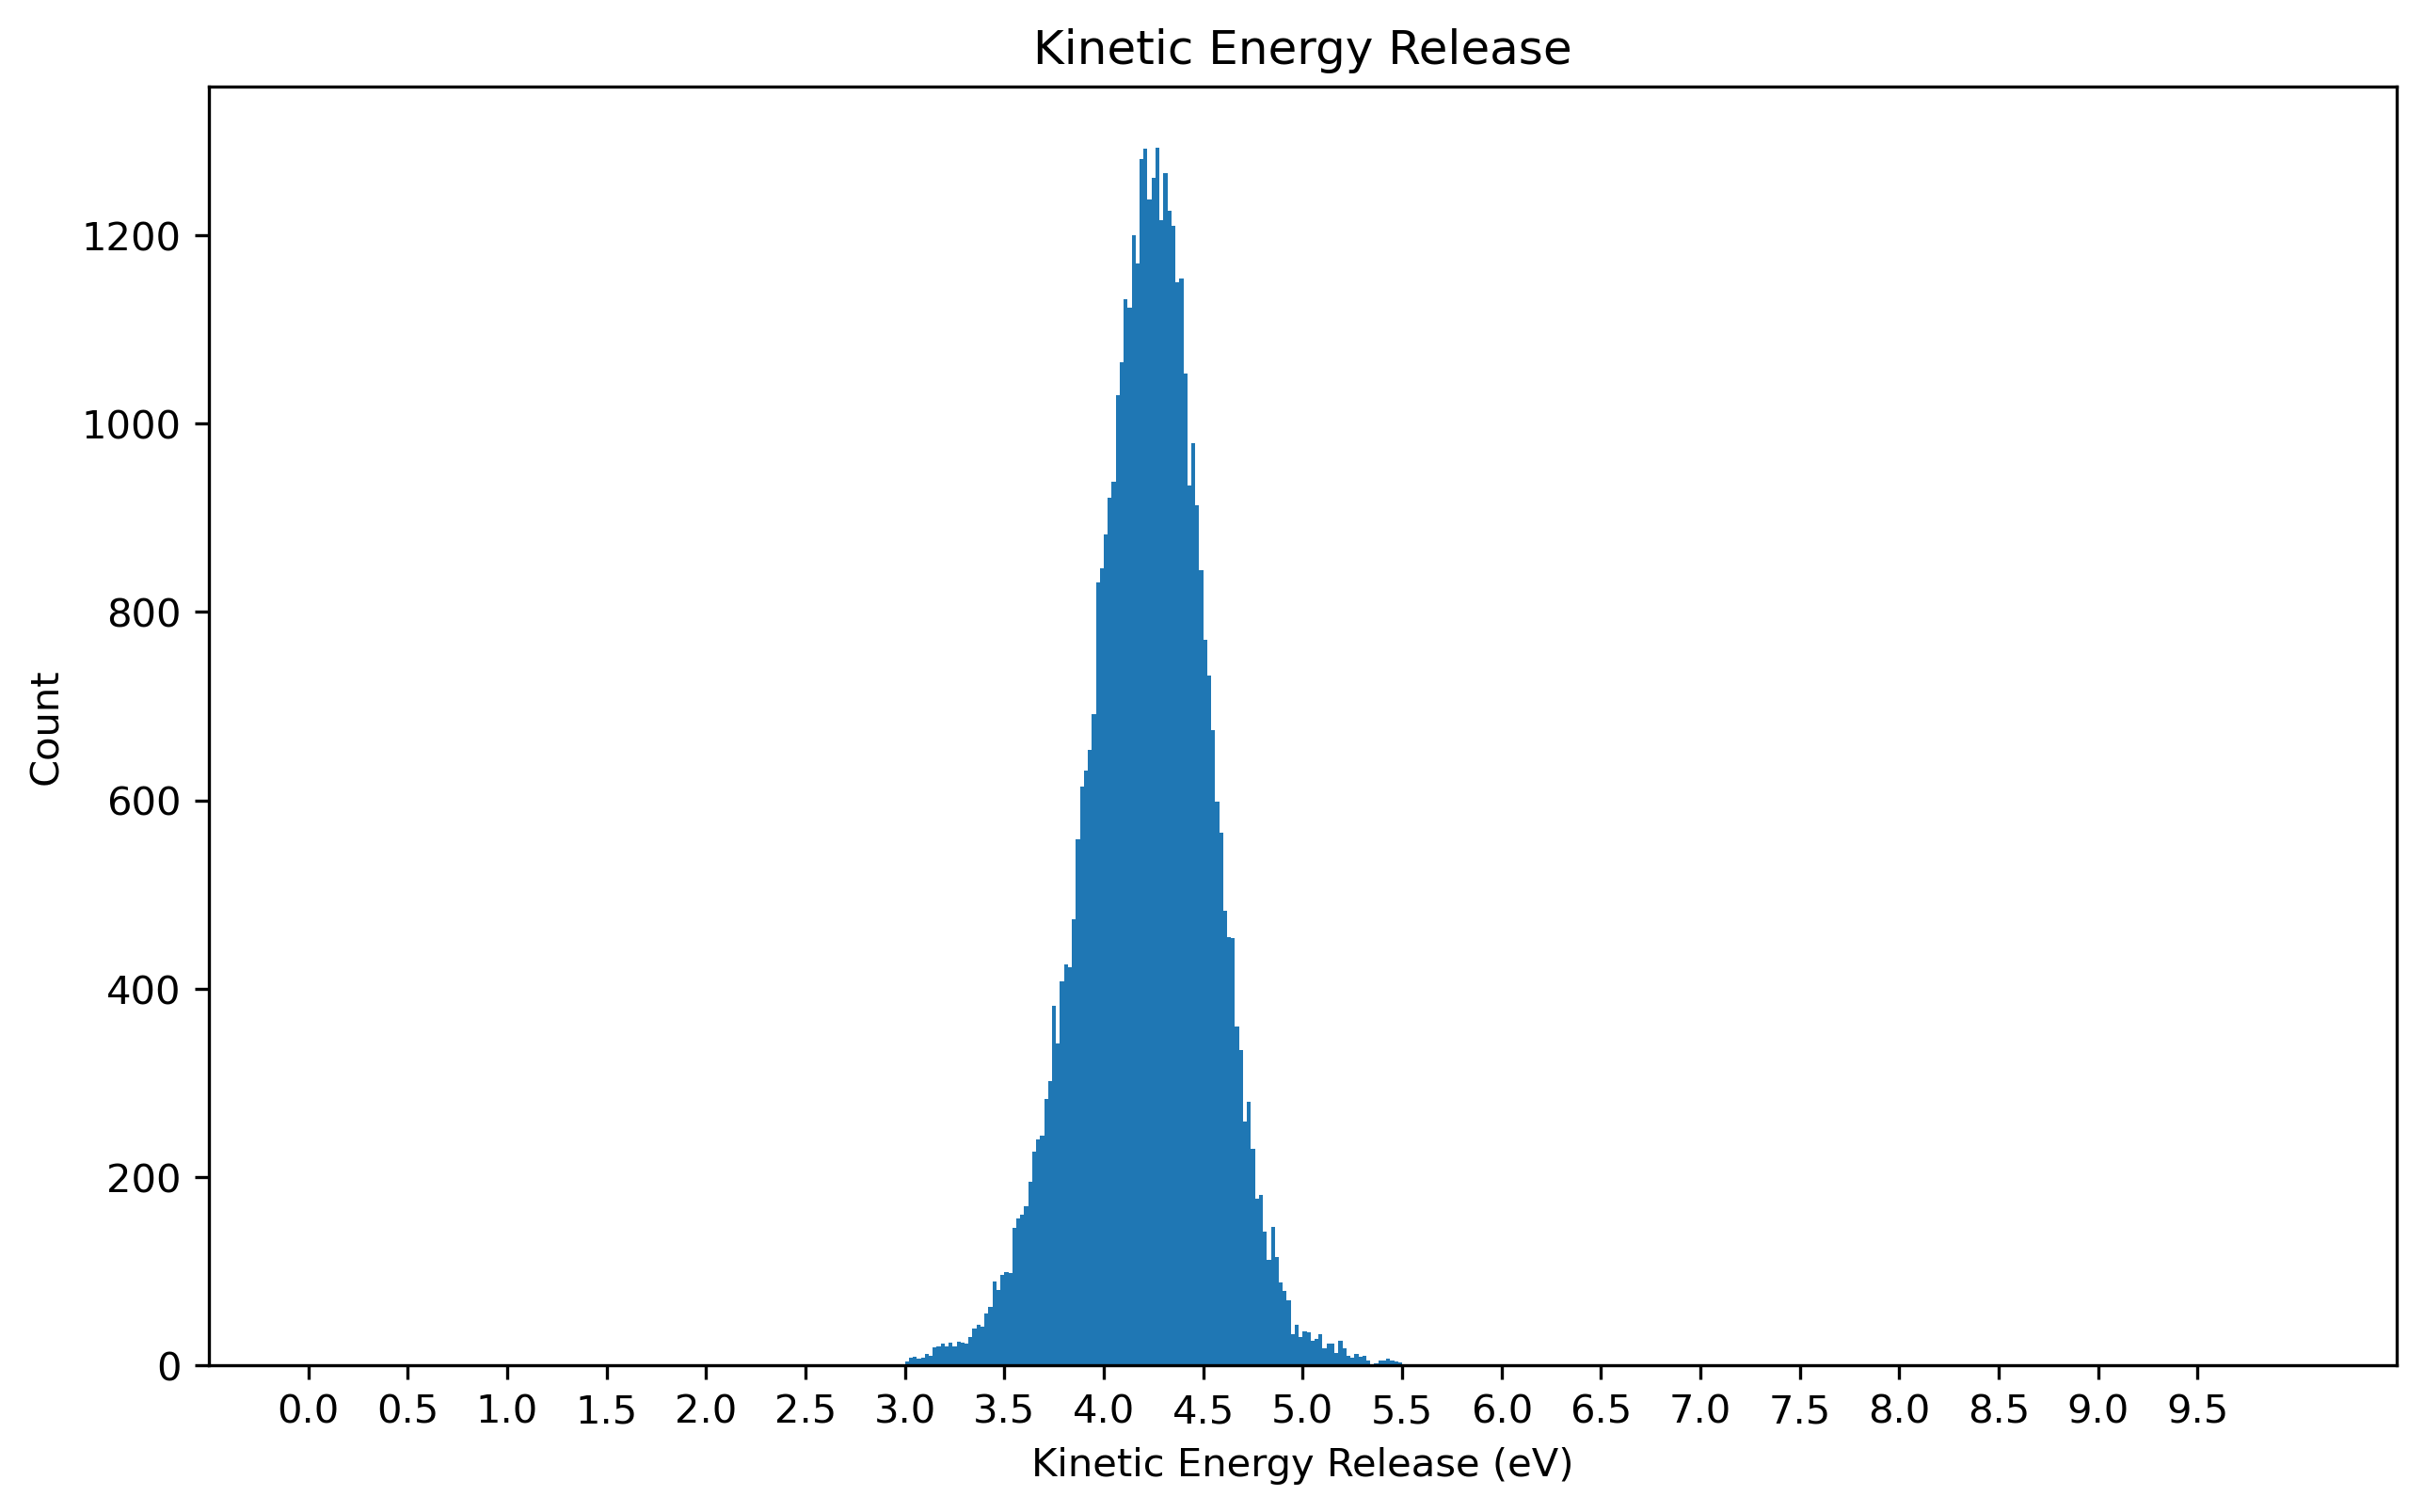

In [124]:
p1 = np.sqrt((i_px0**2+i_py0**2+i_pz0**2))
p2 = np.sqrt((i_px1**2+i_py1**2+i_pz1**2))
KE1 = p1*p1/(2*m1)/MASSAU*EVAU;
KE2 = p2*p2/(2*m2)/MASSAU*EVAU;
KER = KE1+KE2;

KEe1 = 27.2114*(e_px0**2+e_py0**2+e_pz0**2)/2;
if number_of_fragment == 1:
    KEe2 = 0
else:
    KEe2 = 27.2114*(e_px1**2+e_py1**2+e_pz1**2)/2;
KERe = KEe1+KEe2;

plt.figure(figsize=(10, 6), dpi=300)
plt.hist(KER,bins=500, range=(0,10));
plt.xticks(np.arange(0,10,step=0.5));

# Add labels and title
plt.xlabel('Kinetic Energy Release (eV)');
plt.ylabel('Count');
plt.title('Kinetic Energy Release');

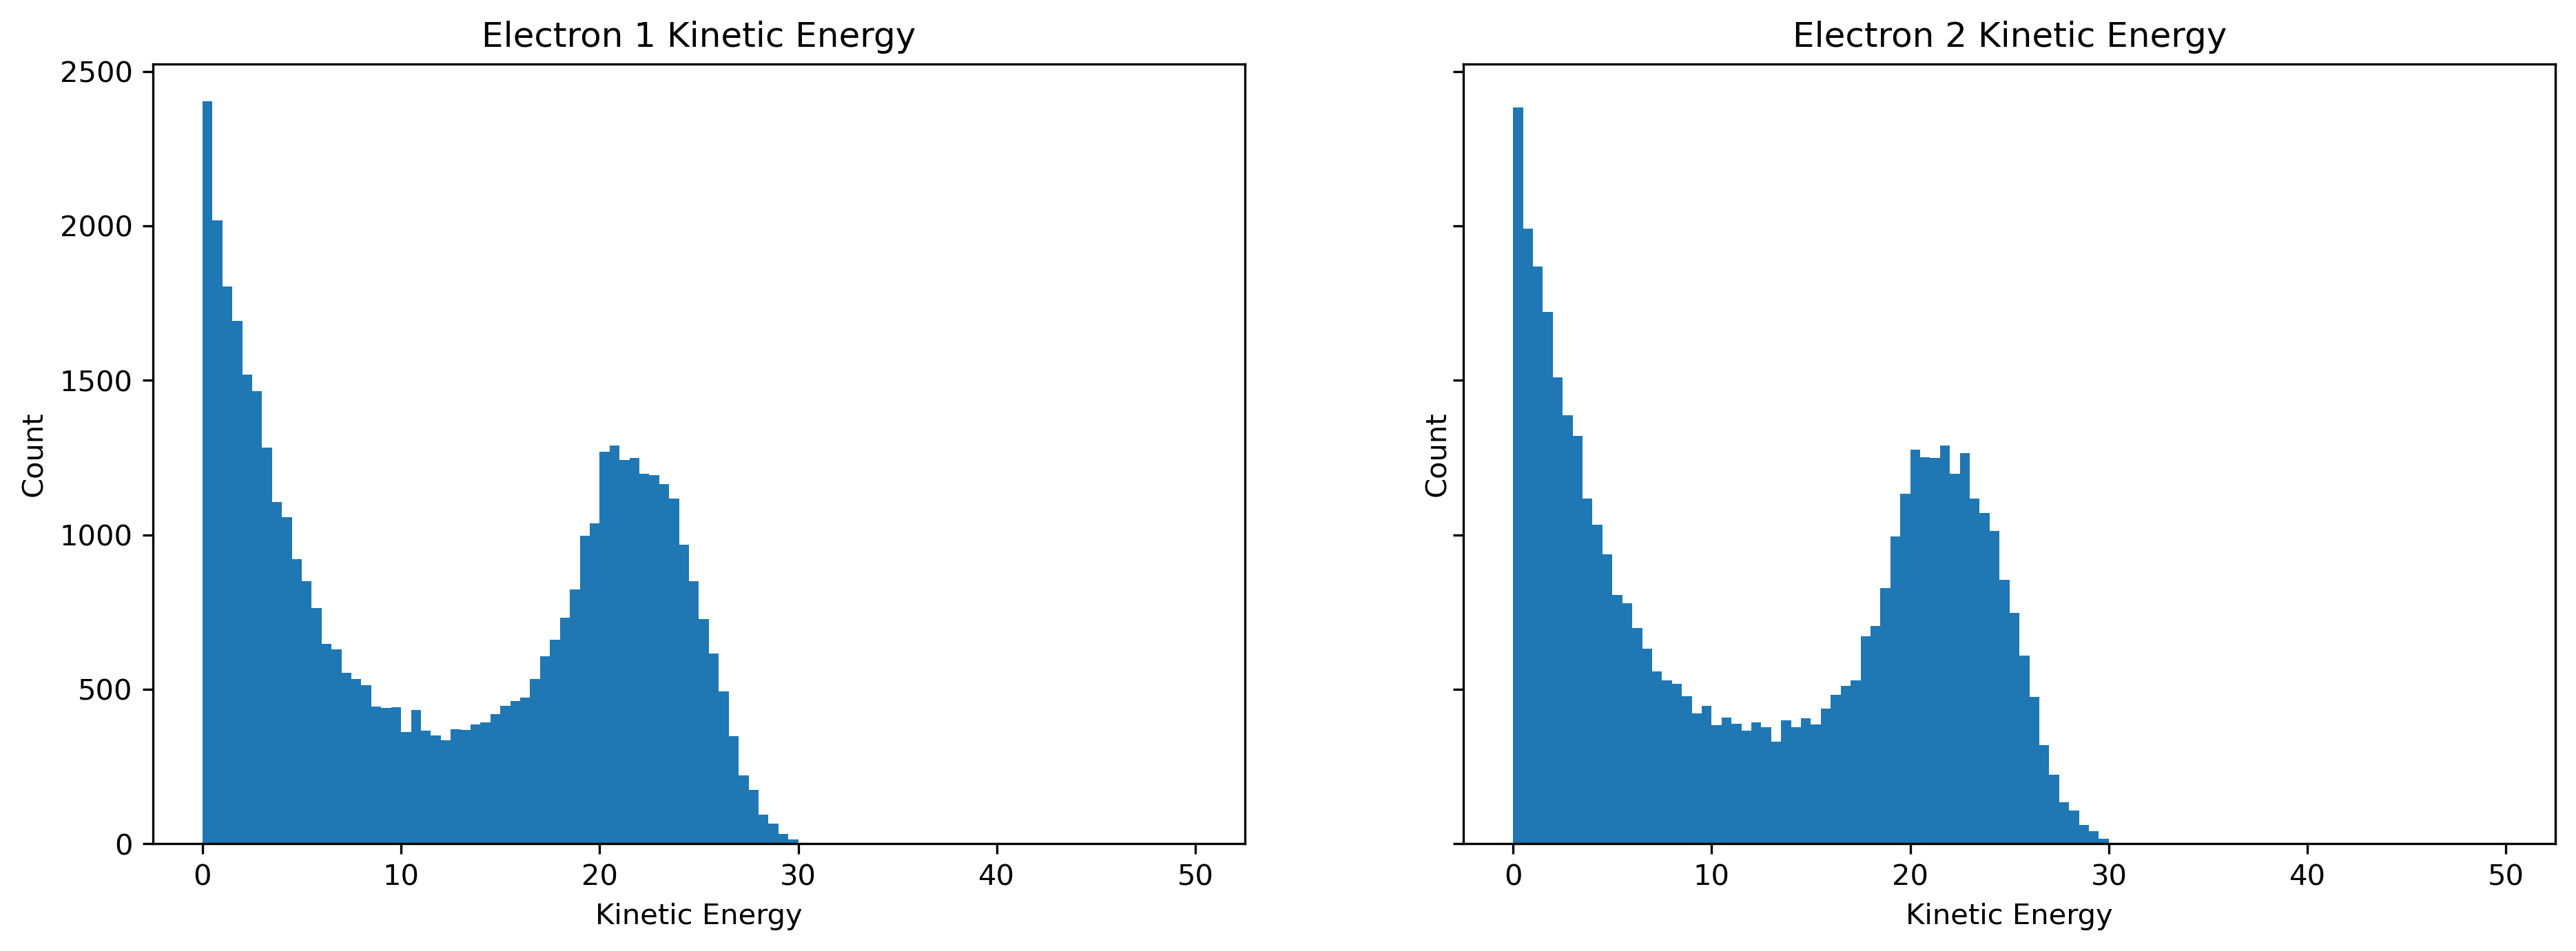

In [125]:
#######################################
#ELECTRON KE PLOT###################
######################################

fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True,dpi=300)

# Plot the histograms
hist1 = axs[0].hist(KEe1, bins=100, range=(0, 50));
axs[0].set_title('Electron 1 Kinetic Energy');
axs[0].set_xlabel('Kinetic Energy');
axs[0].set_ylabel('Count');


hist2 = axs[1].hist(KEe2,bins=100, range=(0, 50));
axs[1].set_title('Electron 2 Kinetic Energy');
axs[1].set_xlabel('Kinetic Energy');
axs[1].set_ylabel('Count');


[10.97237526 16.9475651   9.35568947 ... 23.20088097  1.48568264
  2.76216186]


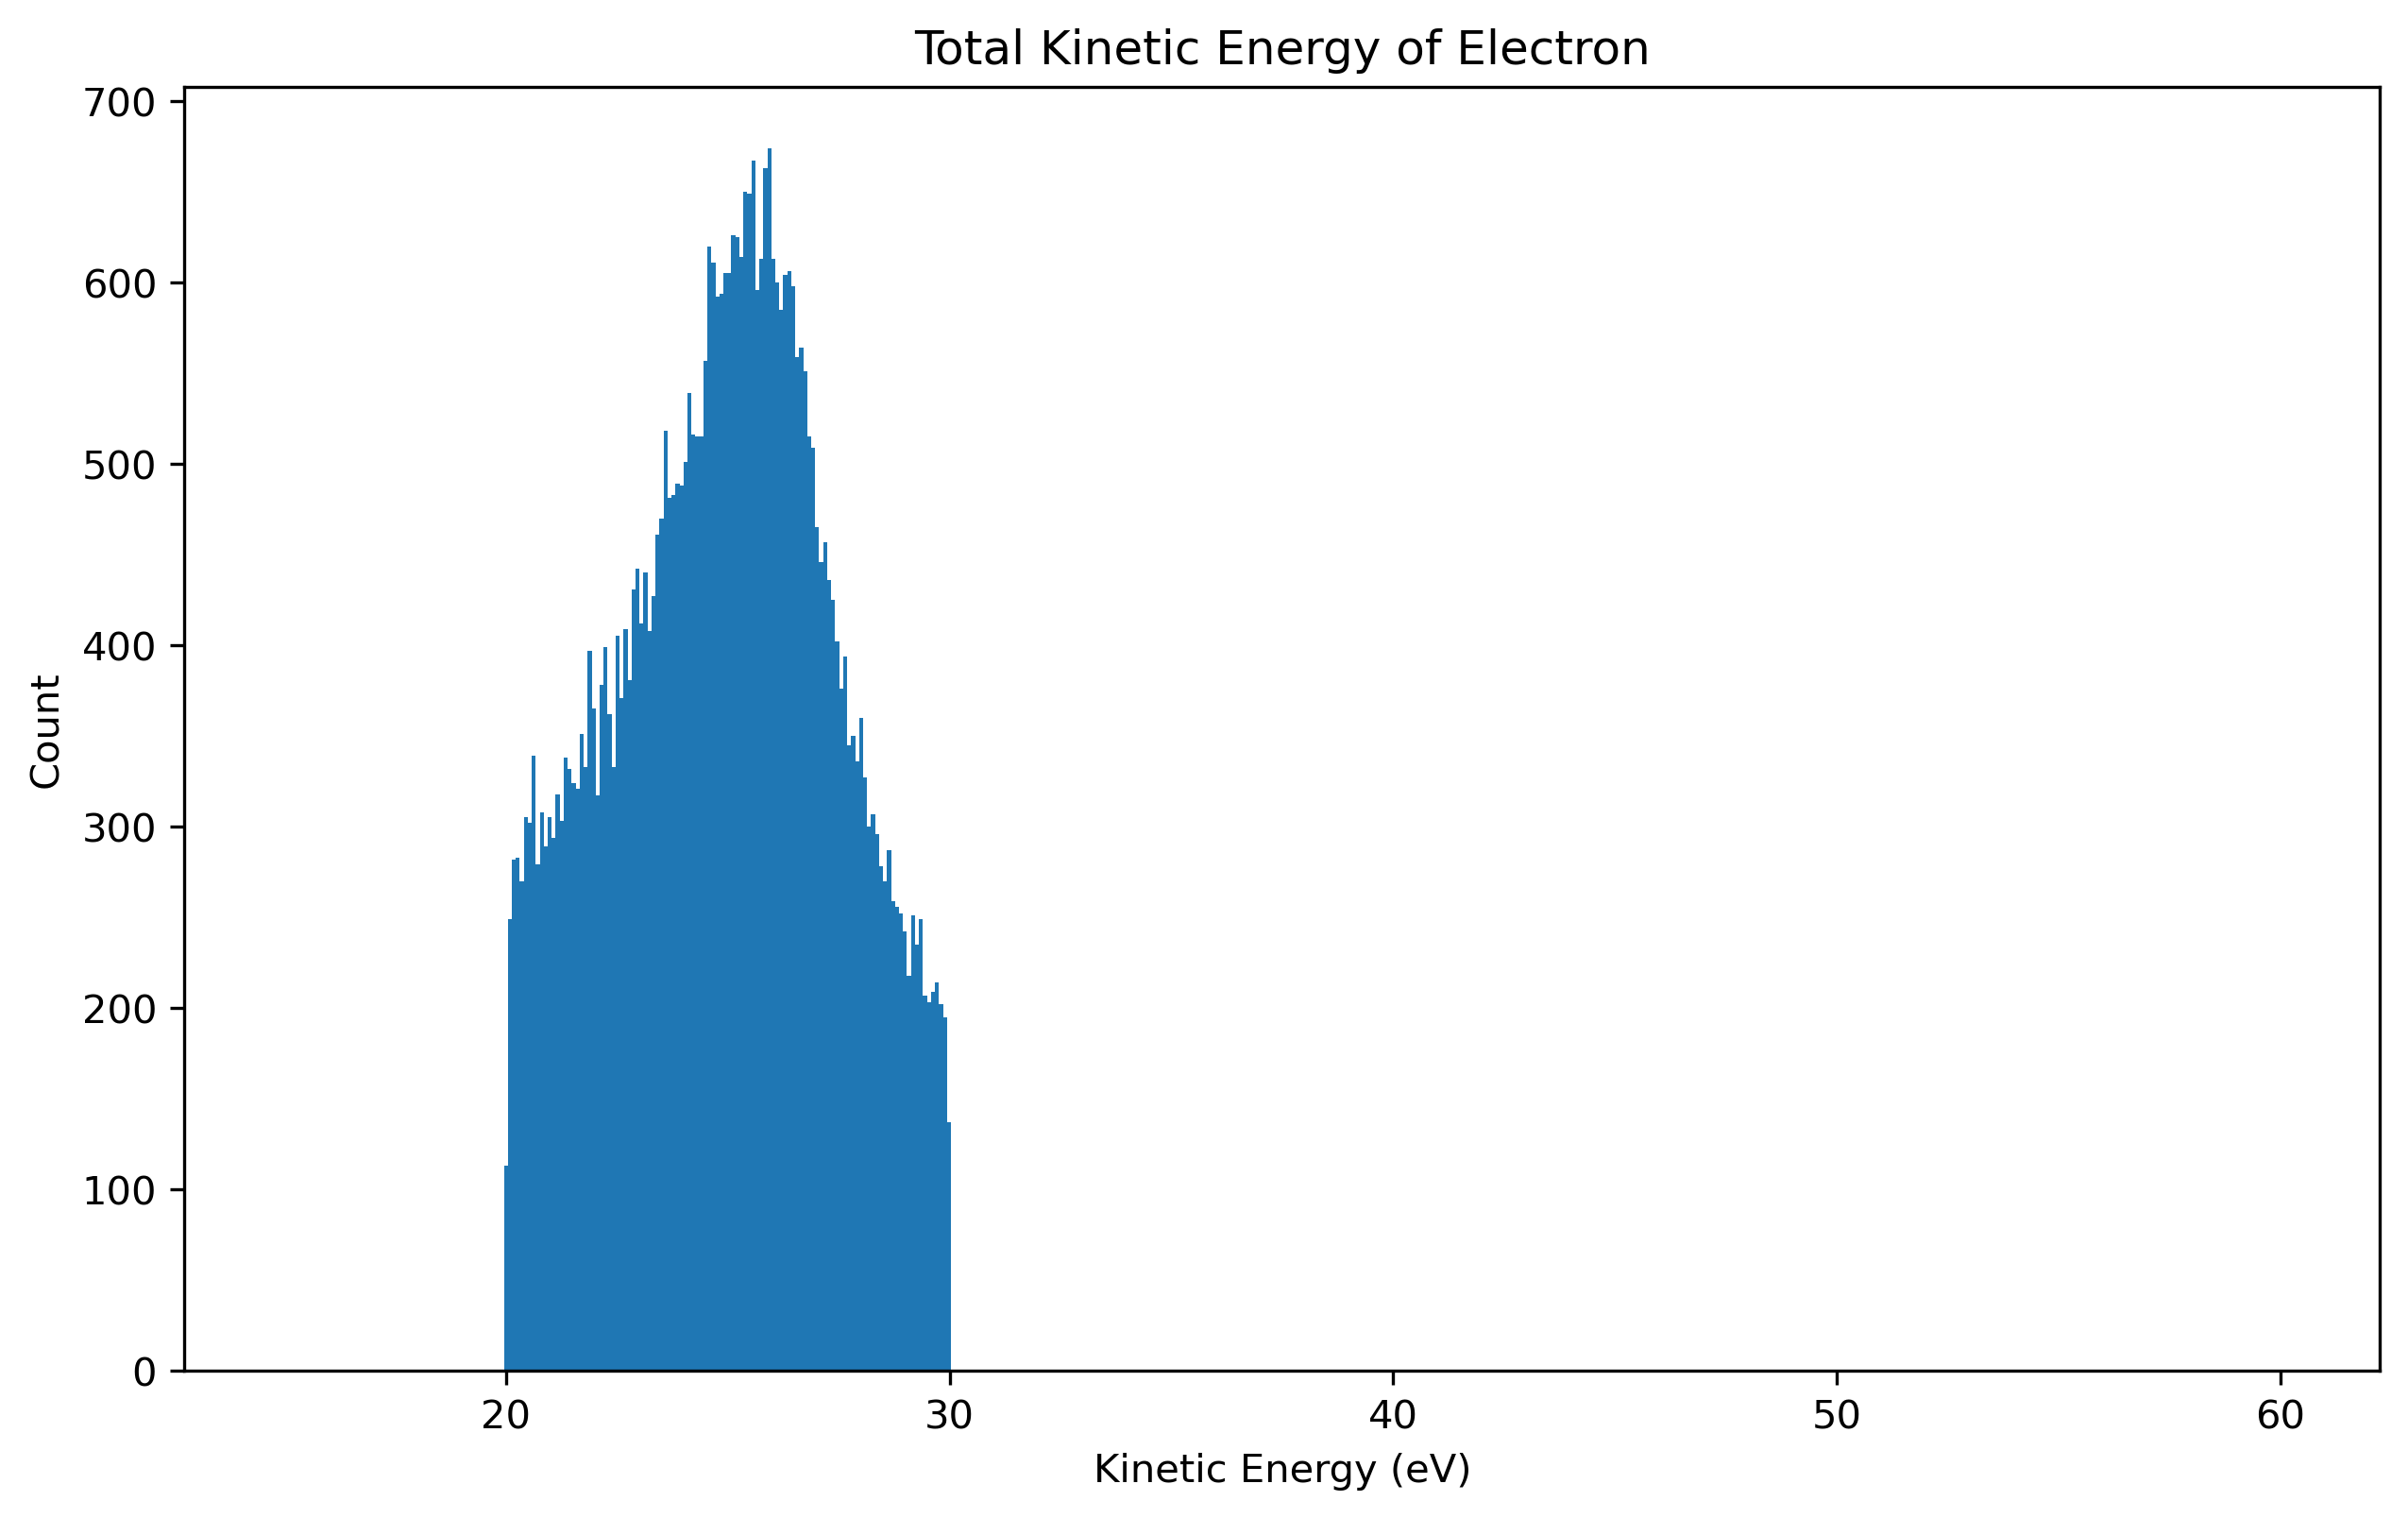

In [126]:
KEe1 = 27.2114*(e_px0**2+e_py0**2+e_pz0**2)/2;
if number_of_fragment == 1:
    KEe2 = 0
else:
    KEe2 = 27.2114*(e_px1**2+e_py1**2+e_pz1**2)/2;
KERe = KEe1+KEe2;

#total_KEe = 27.2114*(total_e_px**2+total_e_py**2+total_e_pz**2)/2;

plt.figure(figsize=(10, 6), dpi=300);
plt.hist(KERe,bins=500, range=(15,60));
print(KEe2);
# Add labels and title
plt.xlabel('Kinetic Energy (eV)');
plt.ylabel('Count');
plt.title('Total Kinetic Energy of Electron');
#plt.axvline(28,c='r',ls='--')


len(KEe1)
plt.savefig(folder_path+"\\KEe.png")

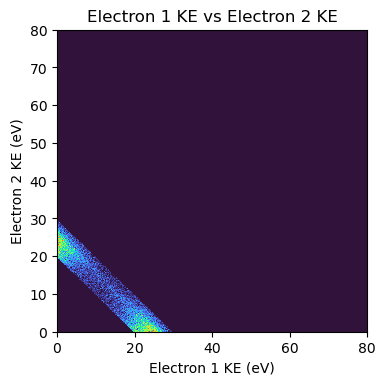

In [127]:
x_range = (0,80);
y_range = (0,80);

plt.figure(figsize=(4, 4), dpi=100);
plt.hist2d(KEe1, KEe2,bins=(500, 500), range=[x_range,y_range], cmap='turbo');
# Add labels and title
plt.xlabel('Electron 1 KE (eV)');
plt.ylabel('Electron 2 KE (eV)');
plt.title('Electron 1 KE vs Electron 2 KE');
#plt.axvline(28,c='r',ls='--')

#plt.hist2d(KER, KERe, bins=(100,100));


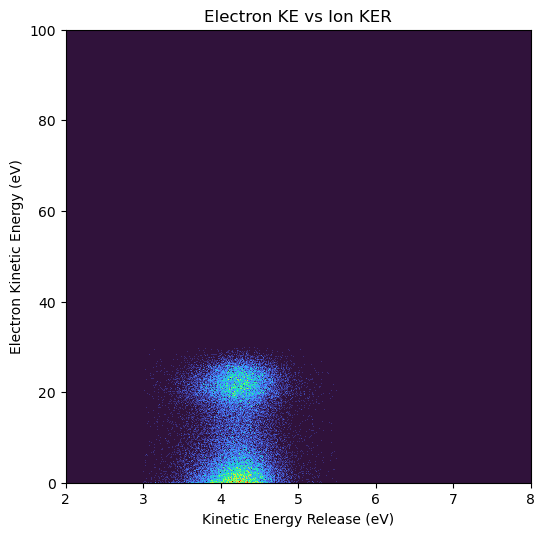

In [128]:
x_range = (2,8);
y_range = (0,100);

plt.figure(figsize=(6, 6), dpi=100);
plt.hist2d(KER, KEe1,bins=(500, 500), range=[x_range,y_range], cmap='turbo');#, norm=LogNorm());
if number_of_fragment == 2:
    plt.hist2d(KER, KEe2,bins=(500, 500), range=[x_range,y_range], cmap='turbo');#, norm=LogNorm());
# Add labels and title
plt.xlabel('Kinetic Energy Release (eV)');
plt.ylabel('Electron Kinetic Energy (eV)');
plt.title('Electron KE vs Ion KER');
#plt.axvline(28,c='r',ls='--')

#plt.hist2d(KER, KERe, bins=(100,100));


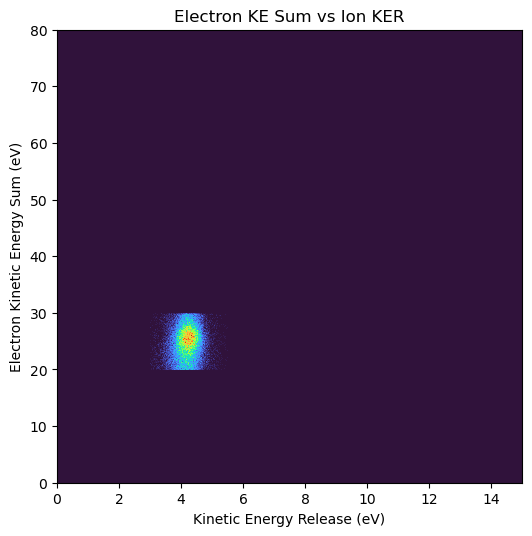

In [129]:
x_range = (0,15);
y_range = (0,80);

plt.figure(figsize=(6, 6), dpi=100);

#plt.hist2d(KER, KERe,bins=(500, 500), range=[x_range,y_range], norm=LogNorm());
if number_of_fragment == 2:
    plt.hist2d(KER, KERe,bins=(500, 500), range=[x_range,y_range],cmap='turbo');#, norm=LogNorm());
elif number_of_fragment == 1:
    plt.hist2d(KER, KEe1,bins=(500, 500), range=[x_range,y_range],cmap='turbo');
# Add labels and title
plt.xlabel('Kinetic Energy Release (eV)');
plt.ylabel('Electron Kinetic Energy Sum (eV)');
plt.title('Electron KE Sum vs Ion KER');
#plt.axvline(28,c='r',ls='--')

#plt.hist2d(KER, KERe, bins=(100,100));
plt.savefig(folder_path+"\\KEe_vs_KER.png")

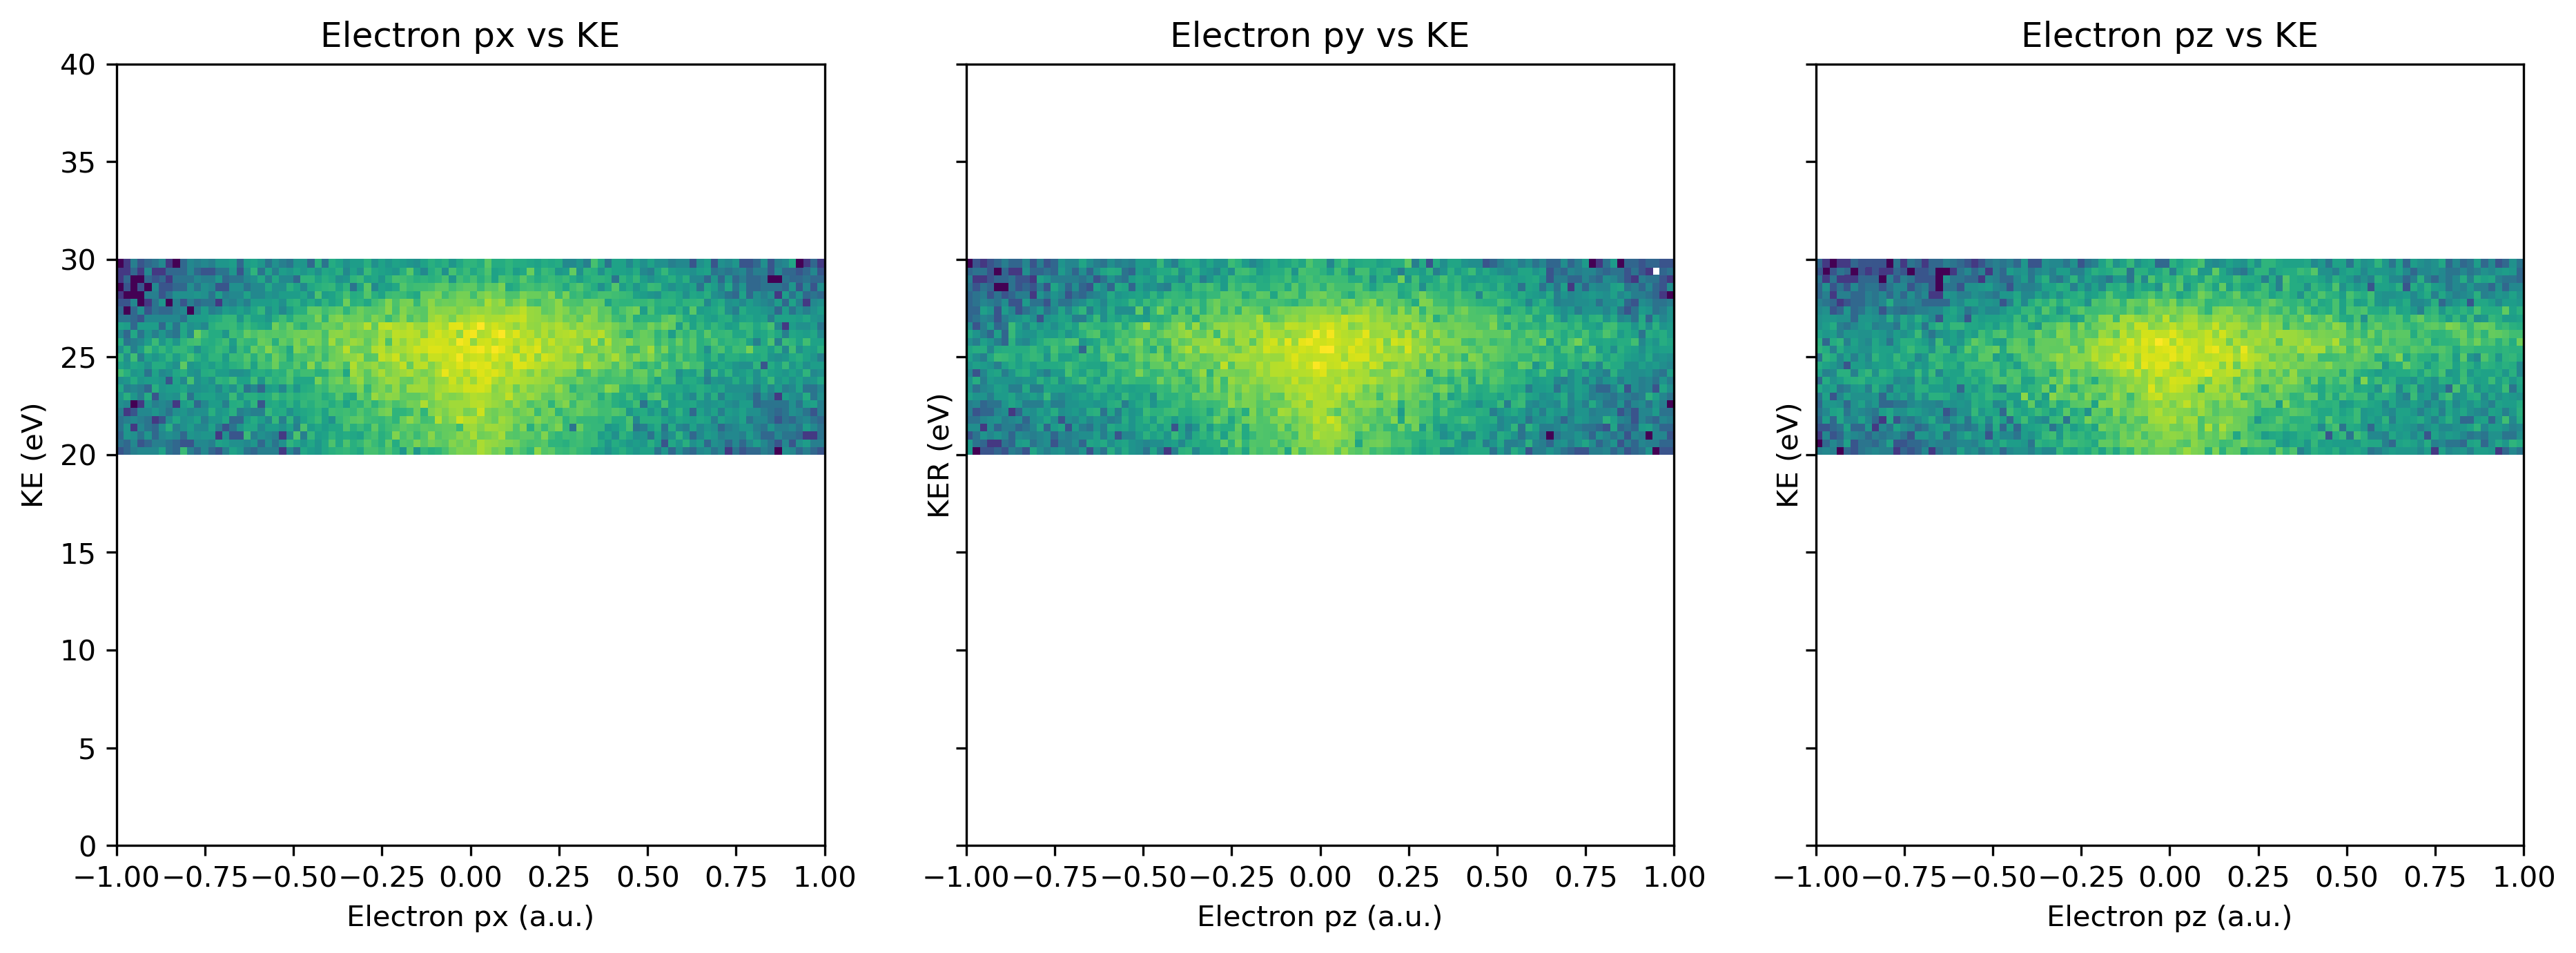

In [130]:
#######################################
#ELECTRON MOMENTUM PLOT###################
######################################

# Determine the data range
x_range = (-1, 1)
y_range = (0, 40)

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True,dpi=300)

# Plot the histograms
hist1 = axs[0].hist2d(e_px0, KERe, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
hist1 = axs[0].hist2d(e_px1, KERe, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
#axs[0].set_aspect('equal')
axs[0].set_title('Electron px vs KE');
axs[0].set_xlabel('Electron px (a.u.)');
axs[0].set_ylabel('KE (eV)');


hist2 = axs[1].hist2d(e_py0, KERe, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
hist2 = axs[1].hist2d(e_py1, KERe, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
#axs[1].set_aspect('equal')
axs[1].set_title('Electron py vs KE');
axs[1].set_xlabel('Electron pz (a.u.)');
axs[1].set_ylabel('KER (eV)');

hist3 = axs[2].hist2d(e_pz0, KERe, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
hist3 = axs[2].hist2d(e_pz1, KERe, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
#axs[2].set_aspect('equal')
axs[2].set_title('Electron pz vs KE');
axs[2].set_xlabel('Electron pz (a.u.)');
axs[2].set_ylabel('KE (eV)');

plt.savefig(folder_path+"\\e_mom_vs_KEe.png")

# More Analysis

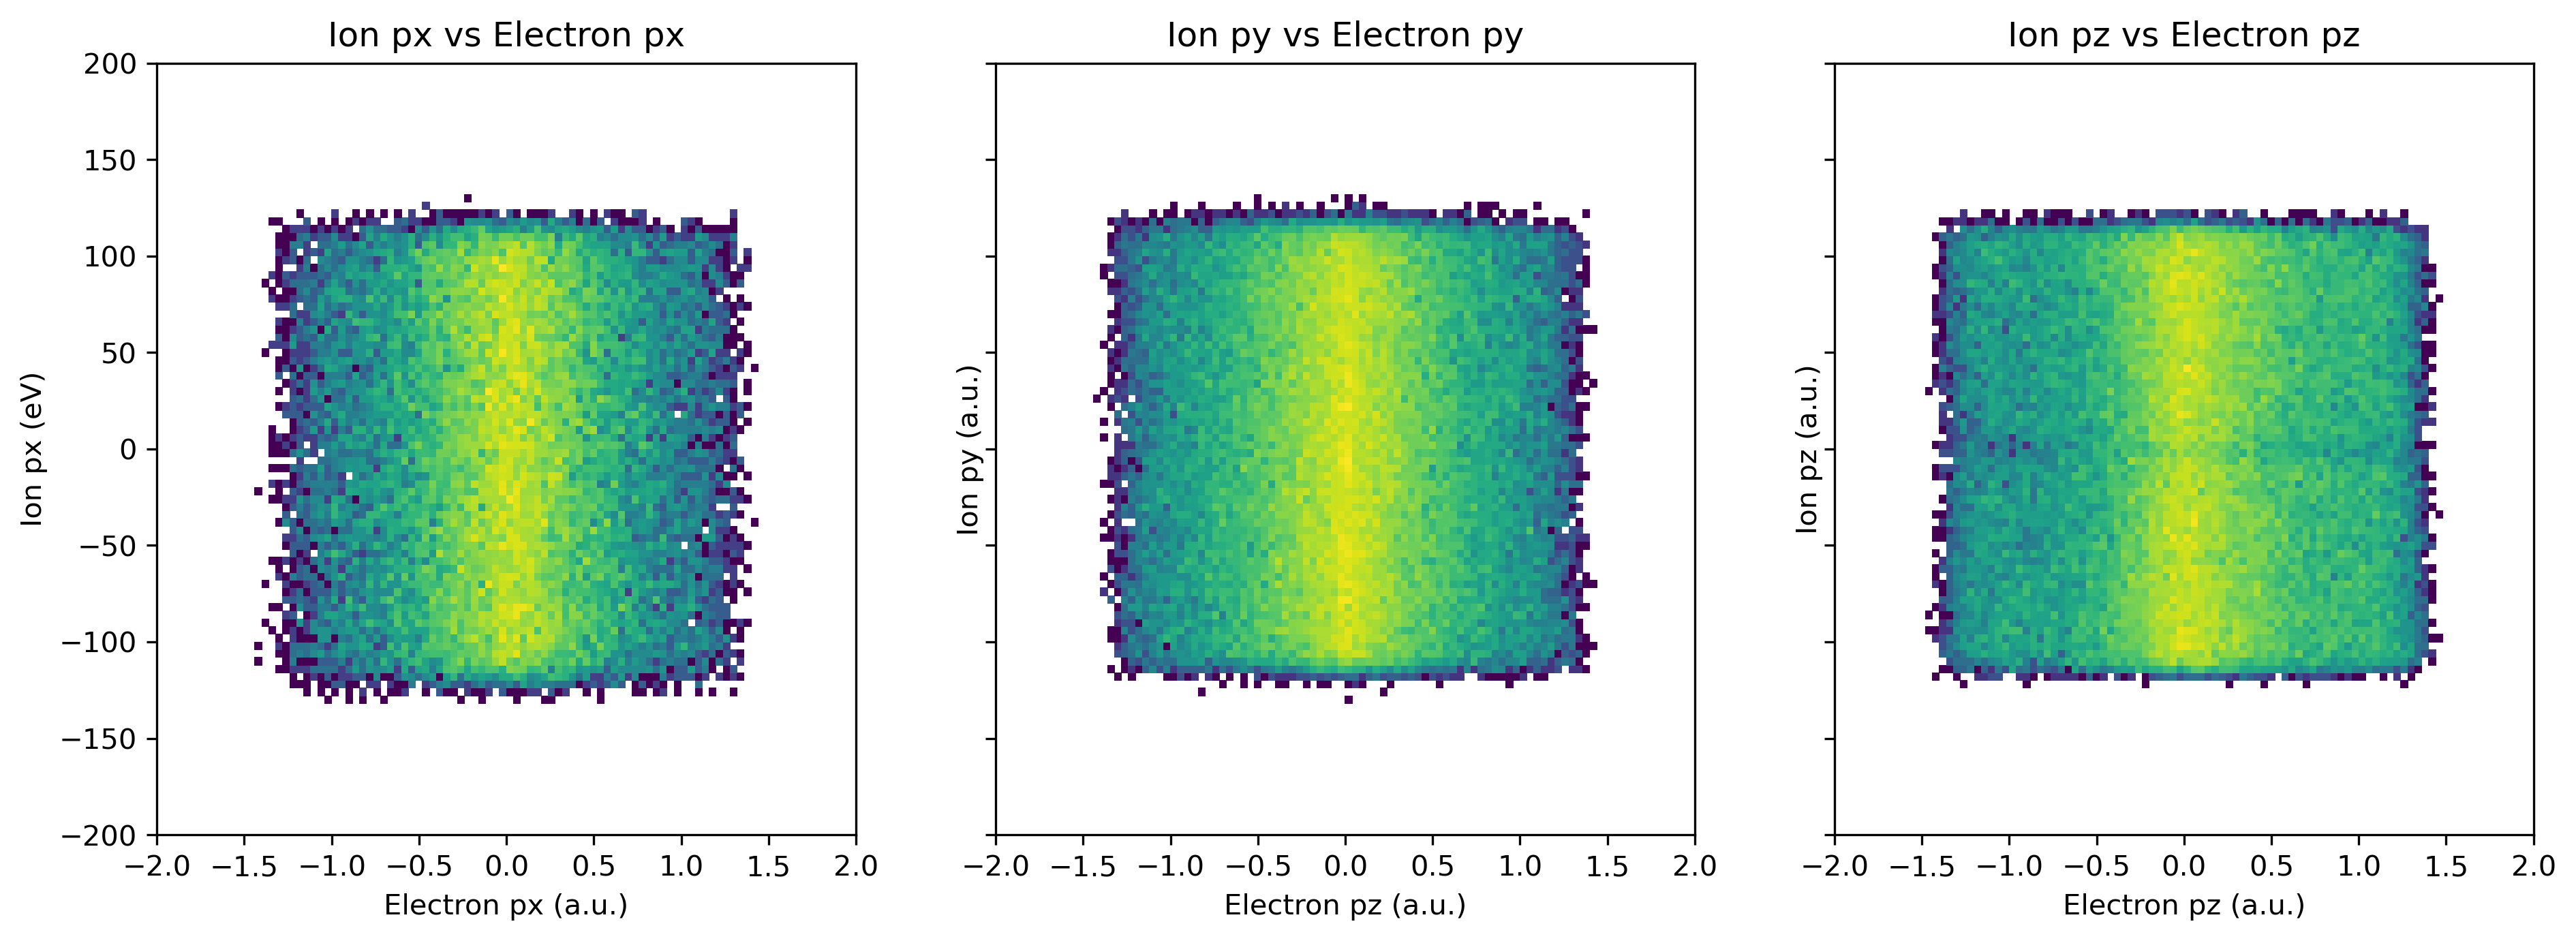

In [131]:
########################################
#ELECTRON MOMENTUM PLOT###################
######################################

# Determine the data range
x_range = (-2, 2)
y_range = (-200, 200)

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True,dpi=300)

# Plot the histograms
hist1 = axs[0].hist2d(np.concatenate([e_px0]), np.concatenate([i_px0]), bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
#hist1 = axs[0].hist2d(e_px1, i_px1, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
#axs[0].set_aspect('equal')
axs[0].set_title('Ion px vs Electron px');
axs[0].set_xlabel('Electron px (a.u.)');
axs[0].set_ylabel('Ion px (eV)');


hist2 = axs[1].hist2d(np.concatenate([e_py0,e_py1]), np.concatenate([i_py0,i_py1]), bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
#hist2 = axs[1].hist2d(e_py1, i_py1, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
#axs[1].set_aspect('equal')
axs[1].set_title('Ion py vs Electron py');
axs[1].set_xlabel('Electron pz (a.u.)');
axs[1].set_ylabel('Ion py (a.u.)');

hist3 = axs[2].hist2d(np.concatenate([e_pz0,e_pz1]), np.concatenate([i_pz0,i_pz1]), bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
#hist3 = axs[2].hist2d(e_pz1, i_pz1, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
#axs[2].set_aspect('equal')
axs[2].set_title('Ion pz vs Electron pz');
axs[2].set_xlabel('Electron pz (a.u.)');
axs[2].set_ylabel('Ion pz (a.u.)');

plt.savefig(folder_path+"\\i_mom_vs_e_mom.png")

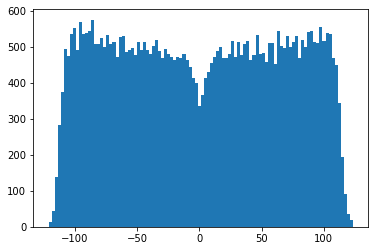

In [132]:
plt.hist(i_pz0, bins=(100)); #, range=[x_range, y_range]);

In [133]:
#########################################################
### radial and angular distributions in each quadrant ###
#########################################################

rad_xy_1 = []
rad_xy_2 = []
rad_xy_3 = []
rad_xy_4 = []
for n in range(len(e_px0)):
    if e_px0[n] > 0 and e_py0[n] > 0:
        rad_xy_1.append(np.sqrt(e_px0[n]**2 + e_py0[n]**2))
    if e_px0[n] < 0 and e_py0[n] > 0:
        rad_xy_2.append(np.sqrt(e_px0[n]**2 + e_py0[n]**2))
    if e_px0[n] < 0 and e_py0[n] < 0:
        rad_xy_3.append(np.sqrt(e_px0[n]**2 + e_py0[n]**2))
    if e_px0[n] > 0 and e_py0[n] < 0:
        rad_xy_4.append(np.sqrt(e_px0[n]**2 + e_py0[n]**2))

rad_xz_1 = []
rad_xz_2 = []
rad_xz_3 = []
rad_xz_4 = []
for n in range(len(e_px0)):
    if e_px0[n] > 0 and e_pz0[n] > 0:
        rad_xz_1.append(np.sqrt(e_px0[n]**2 + e_pz0[n]**2))
    if e_px0[n] < 0 and e_pz0[n] > 0:
        rad_xz_2.append(np.sqrt(e_px0[n]**2 + e_pz0[n]**2))
    if e_px0[n] < 0 and e_pz0[n] < 0:
        rad_xz_3.append(np.sqrt(e_px0[n]**2 + e_pz0[n]**2))
    if e_px0[n] > 0 and e_pz0[n] < 0:
        rad_xz_4.append(np.sqrt(e_px0[n]**2 + e_pz0[n]**2))

rad_yz_1 = []
rad_yz_2 = []
rad_yz_3 = []
rad_yz_4 = []
for n in range(len(e_py0)):
    if e_py0[n] > 0 and e_pz0[n] > 0:
        rad_yz_1.append(np.sqrt(e_py0[n]**2 + e_pz0[n]**2))
    if e_py0[n] < 0 and e_pz0[n] > 0:
        rad_yz_2.append(np.sqrt(e_py0[n]**2 + e_pz0[n]**2))
    if e_py0[n] < 0 and e_pz0[n] < 0:
        rad_yz_3.append(np.sqrt(e_py0[n]**2 + e_pz0[n]**2))
    if e_py0[n] > 0 and e_pz0[n] < 0:
        rad_yz_4.append(np.sqrt(e_py0[n]**2 + e_pz0[n]**2))

phi_xy = np.arctan2(e_py0,e_px0)
for phi in phi_xy:
    if phi < 0.0:
        phi += 2*np.pi
        
phi_xz = np.arctan2(e_pz0,e_px0)
for phi in phi_xz:
    if phi < 0.0:
        phi += 2*np.pi
        
phi_yz = np.arctan2(e_pz0,e_py0)
for phi in phi_yz:
    if phi < 0.0:
        phi += 2*np.pi

<ipython-input-134-22b24be53807>:32: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


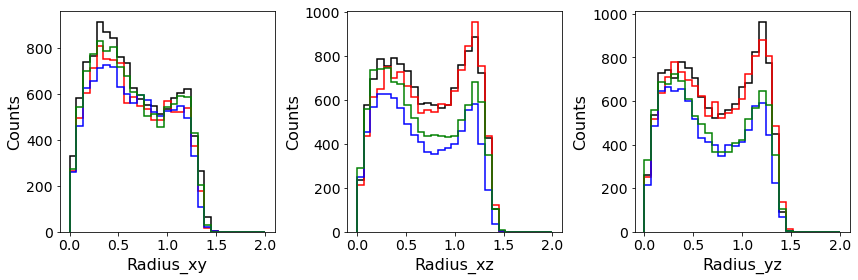

In [134]:
#####################################################
### electron radial distribution in each quadrant ###
#####################################################

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(12,4))

ax1.hist(rad_xy_1,bins=np.linspace(0,2,num=30),histtype='step',lw=1.5,color='k')
ax1.hist(rad_xy_2,bins=np.linspace(0,2,num=30),histtype='step',lw=1.5,color='r')
ax1.hist(rad_xy_3,bins=np.linspace(0,2,num=30),histtype='step',lw=1.5,color='b')
ax1.hist(rad_xy_4,bins=np.linspace(0,2,num=30),histtype='step',lw=1.5,color='g')
ax1.set_xlabel('Radius_xy', fontsize=16,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax1.set_ylabel('Counts', fontsize=16,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax1.tick_params(labelsize=14)

ax2.hist(rad_xz_1,bins=np.linspace(0,2,num=30),histtype='step',lw=1.5,color='k')
ax2.hist(rad_xz_2,bins=np.linspace(0,2,num=30),histtype='step',lw=1.5,color='r')
ax2.hist(rad_xz_3,bins=np.linspace(0,2,num=30),histtype='step',lw=1.5,color='b')
ax2.hist(rad_xz_4,bins=np.linspace(0,2,num=30),histtype='step',lw=1.5,color='g')
ax2.set_xlabel('Radius_xz', fontsize=16,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax2.set_ylabel('Counts', fontsize=16,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax2.tick_params(labelsize=14)

ax3.hist(rad_yz_1,bins=np.linspace(0,2,num=30),histtype='step',lw=1.5,color='k')
ax3.hist(rad_yz_2,bins=np.linspace(0,2,num=30),histtype='step',lw=1.5,color='r')
ax3.hist(rad_yz_3,bins=np.linspace(0,2,num=30),histtype='step',lw=1.5,color='b')
ax3.hist(rad_yz_4,bins=np.linspace(0,2,num=30),histtype='step',lw=1.5,color='g')
ax3.set_xlabel('Radius_yz', fontsize=16,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax3.set_ylabel('Counts', fontsize=16,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax3.tick_params(labelsize=14)

fig.tight_layout()
fig.show()
plt.savefig(folder_path+"\\rad_xyz.png")

<ipython-input-135-7df7c01d7f6f>:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


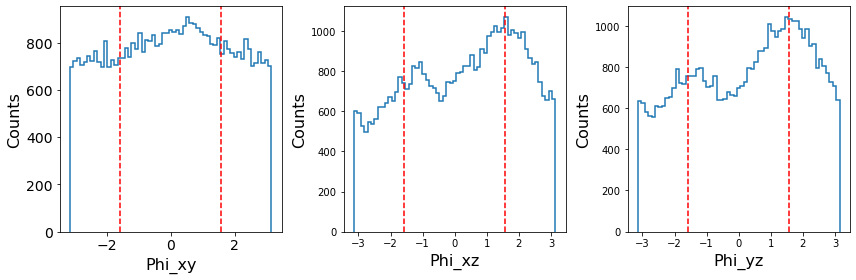

In [135]:
######################################
### electron angluar distributions ###
######################################

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(12,4))

radius0, phi0, _  = ax1.hist(phi_xy,bins=np.linspace(-np.pi,np.pi,num=60),histtype='step',lw=1.5)
ax1.axvline(np.pi/2,c='r',ls='--')
ax1.axvline(-np.pi/2,c='r',ls='--')
ax1.set_xlabel('Phi_xy', fontsize=16,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax1.set_ylabel('Counts', fontsize=16,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax1.tick_params(labelsize=14)


radius1, phi1, _  = ax2.hist(phi_xz,bins=np.linspace(-np.pi,np.pi,num=60),histtype='step',lw=1.5)
ax2.axvline(np.pi/2,c='r',ls='--')
ax2.axvline(-np.pi/2,c='r',ls='--')
ax2.set_xlabel('Phi_xz', fontsize=16,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax2.set_ylabel('Counts', fontsize=16,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax1.tick_params(labelsize=14)

radius2, phi2, _  = ax3.hist(phi_yz,bins=np.linspace(-np.pi,np.pi,num=60),histtype='step',lw=1.5)
ax3.axvline(np.pi/2,c='r',ls='--')
ax3.axvline(-np.pi/2,c='r',ls='--')
ax3.set_xlabel('Phi_yz', fontsize=16,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax3.set_ylabel('Counts', fontsize=16,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax1.tick_params(labelsize=14)

fig.tight_layout()
fig.show()
plt.savefig(folder_path+"\\phi_xyz.png")

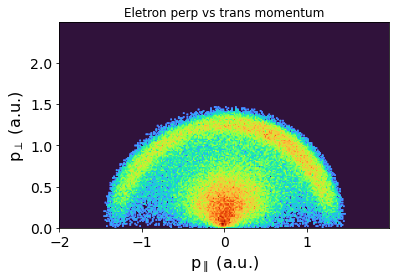

<Figure size 432x288 with 0 Axes>

In [136]:
p_e_longitudinal0 = np.concatenate([e_pz0, e_pz1])
p_e_transverse0 = np.sqrt(np.concatenate([e_px0, e_px1])**2 + np.concatenate([e_py0, e_py1])**2)

p_ez_edges = np.arange(0,2.5,0.015)
p_ex_edges = np.arange(-2,2,0.015)
H_e_px_pz, p_ex_edges, p_ez_edges = np.histogram2d(p_e_longitudinal0,p_e_transverse0,bins=(p_ex_edges,p_ez_edges))
H_e_px_pz = H_e_px_pz.T

fig_a, ax_a = plt.subplots(1,1,figsize=(8,4))

im = ax_a.imshow(H_e_px_pz, origin='lower', extent=[p_ex_edges[0], p_ex_edges[-1], p_ez_edges[0], p_ez_edges[-1]],cmap = 'turbo',aspect=1/1,norm = PowerNorm(gamma =1 / 2.5))

ax_a.set_ylabel('p$_{\perp}$ (a.u.)',fontsize=16,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax_a.set_xlabel('p$_{\parallel}$ (a.u.)',fontsize=16,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax_a.set_title('Eletron perp vs trans momentum')
ax_a.tick_params(labelsize=14)

# Adjust the position of the color bar
#cb_ax = fig_a.add_axes([1, 0, 1, 0])  # Adjust the second value (0.83) to make space for the title
#cb = fig_a.colorbar(im, cax = cb_ax, orientation = 'vertical')
#tick_locator = ticker.MaxNLocator(nbins=5)
#cb.locator = tick_locator
#cb.update_ticks()

#cb.ax.tick_params(labelsize = 13)
#cb.ax.xaxis.set_ticks_position('top')
#cb.ax.xaxis.set_label_position('top')

# Save or display the plot
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()
plt.savefig(folder_path+"\\e_p_long_vs_e_p_trans.png")


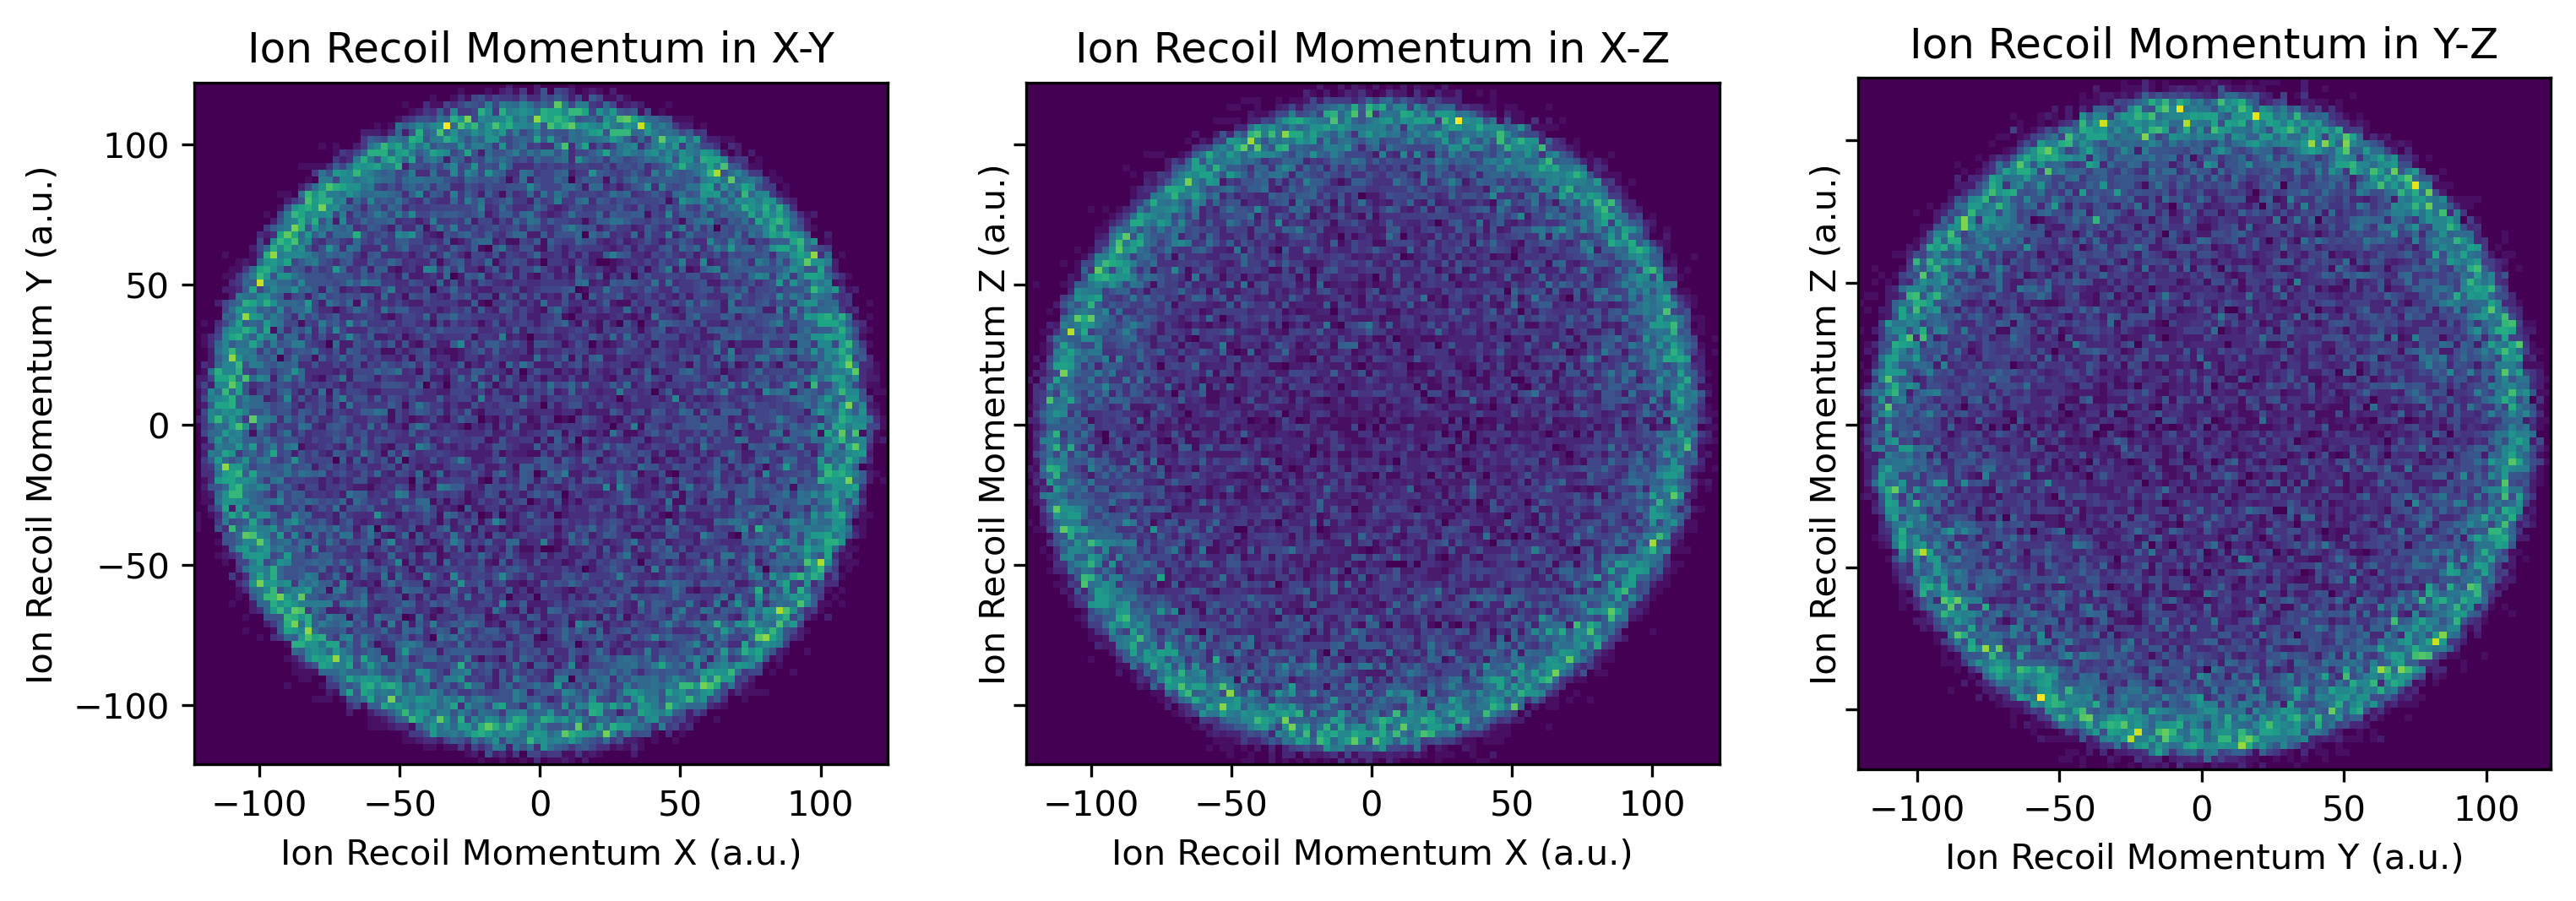

In [137]:
p12x = (i_px0 - i_px1)/2
p12y = (i_py0 - i_py1)/2
p12z = (i_pz0 - i_pz1)/2

p12_mag = np.sqrt(p12x**2+p12y**2+p12z**2)

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(12,4),sharey=True,dpi=300)

ax1.hist2d(p12x, p12y, bins = (100,100));
ax1.set_title('Ion Recoil Momentum in X-Y');
ax1.set_xlabel('Ion Recoil Momentum X (a.u.)');
ax1.set_ylabel('Ion Recoil Momentum Y (a.u.)');

ax2.hist2d(p12x, p12z, bins = (100,100));
ax2.set_title('Ion Recoil Momentum in X-Z');
ax2.set_xlabel('Ion Recoil Momentum X (a.u.)');
ax2.set_ylabel('Ion Recoil Momentum Z (a.u.)');

ax3.hist2d(p12y, p12z, bins = (100,100));
ax3.set_title('Ion Recoil Momentum in Y-Z');
ax3.set_xlabel('Ion Recoil Momentum Y (a.u.)');
ax3.set_ylabel('Ion Recoil Momentum Z (a.u.)');

ax1.set_aspect('equal')
ax2.set_aspect('equal')
ax3.set_aspect('equal')

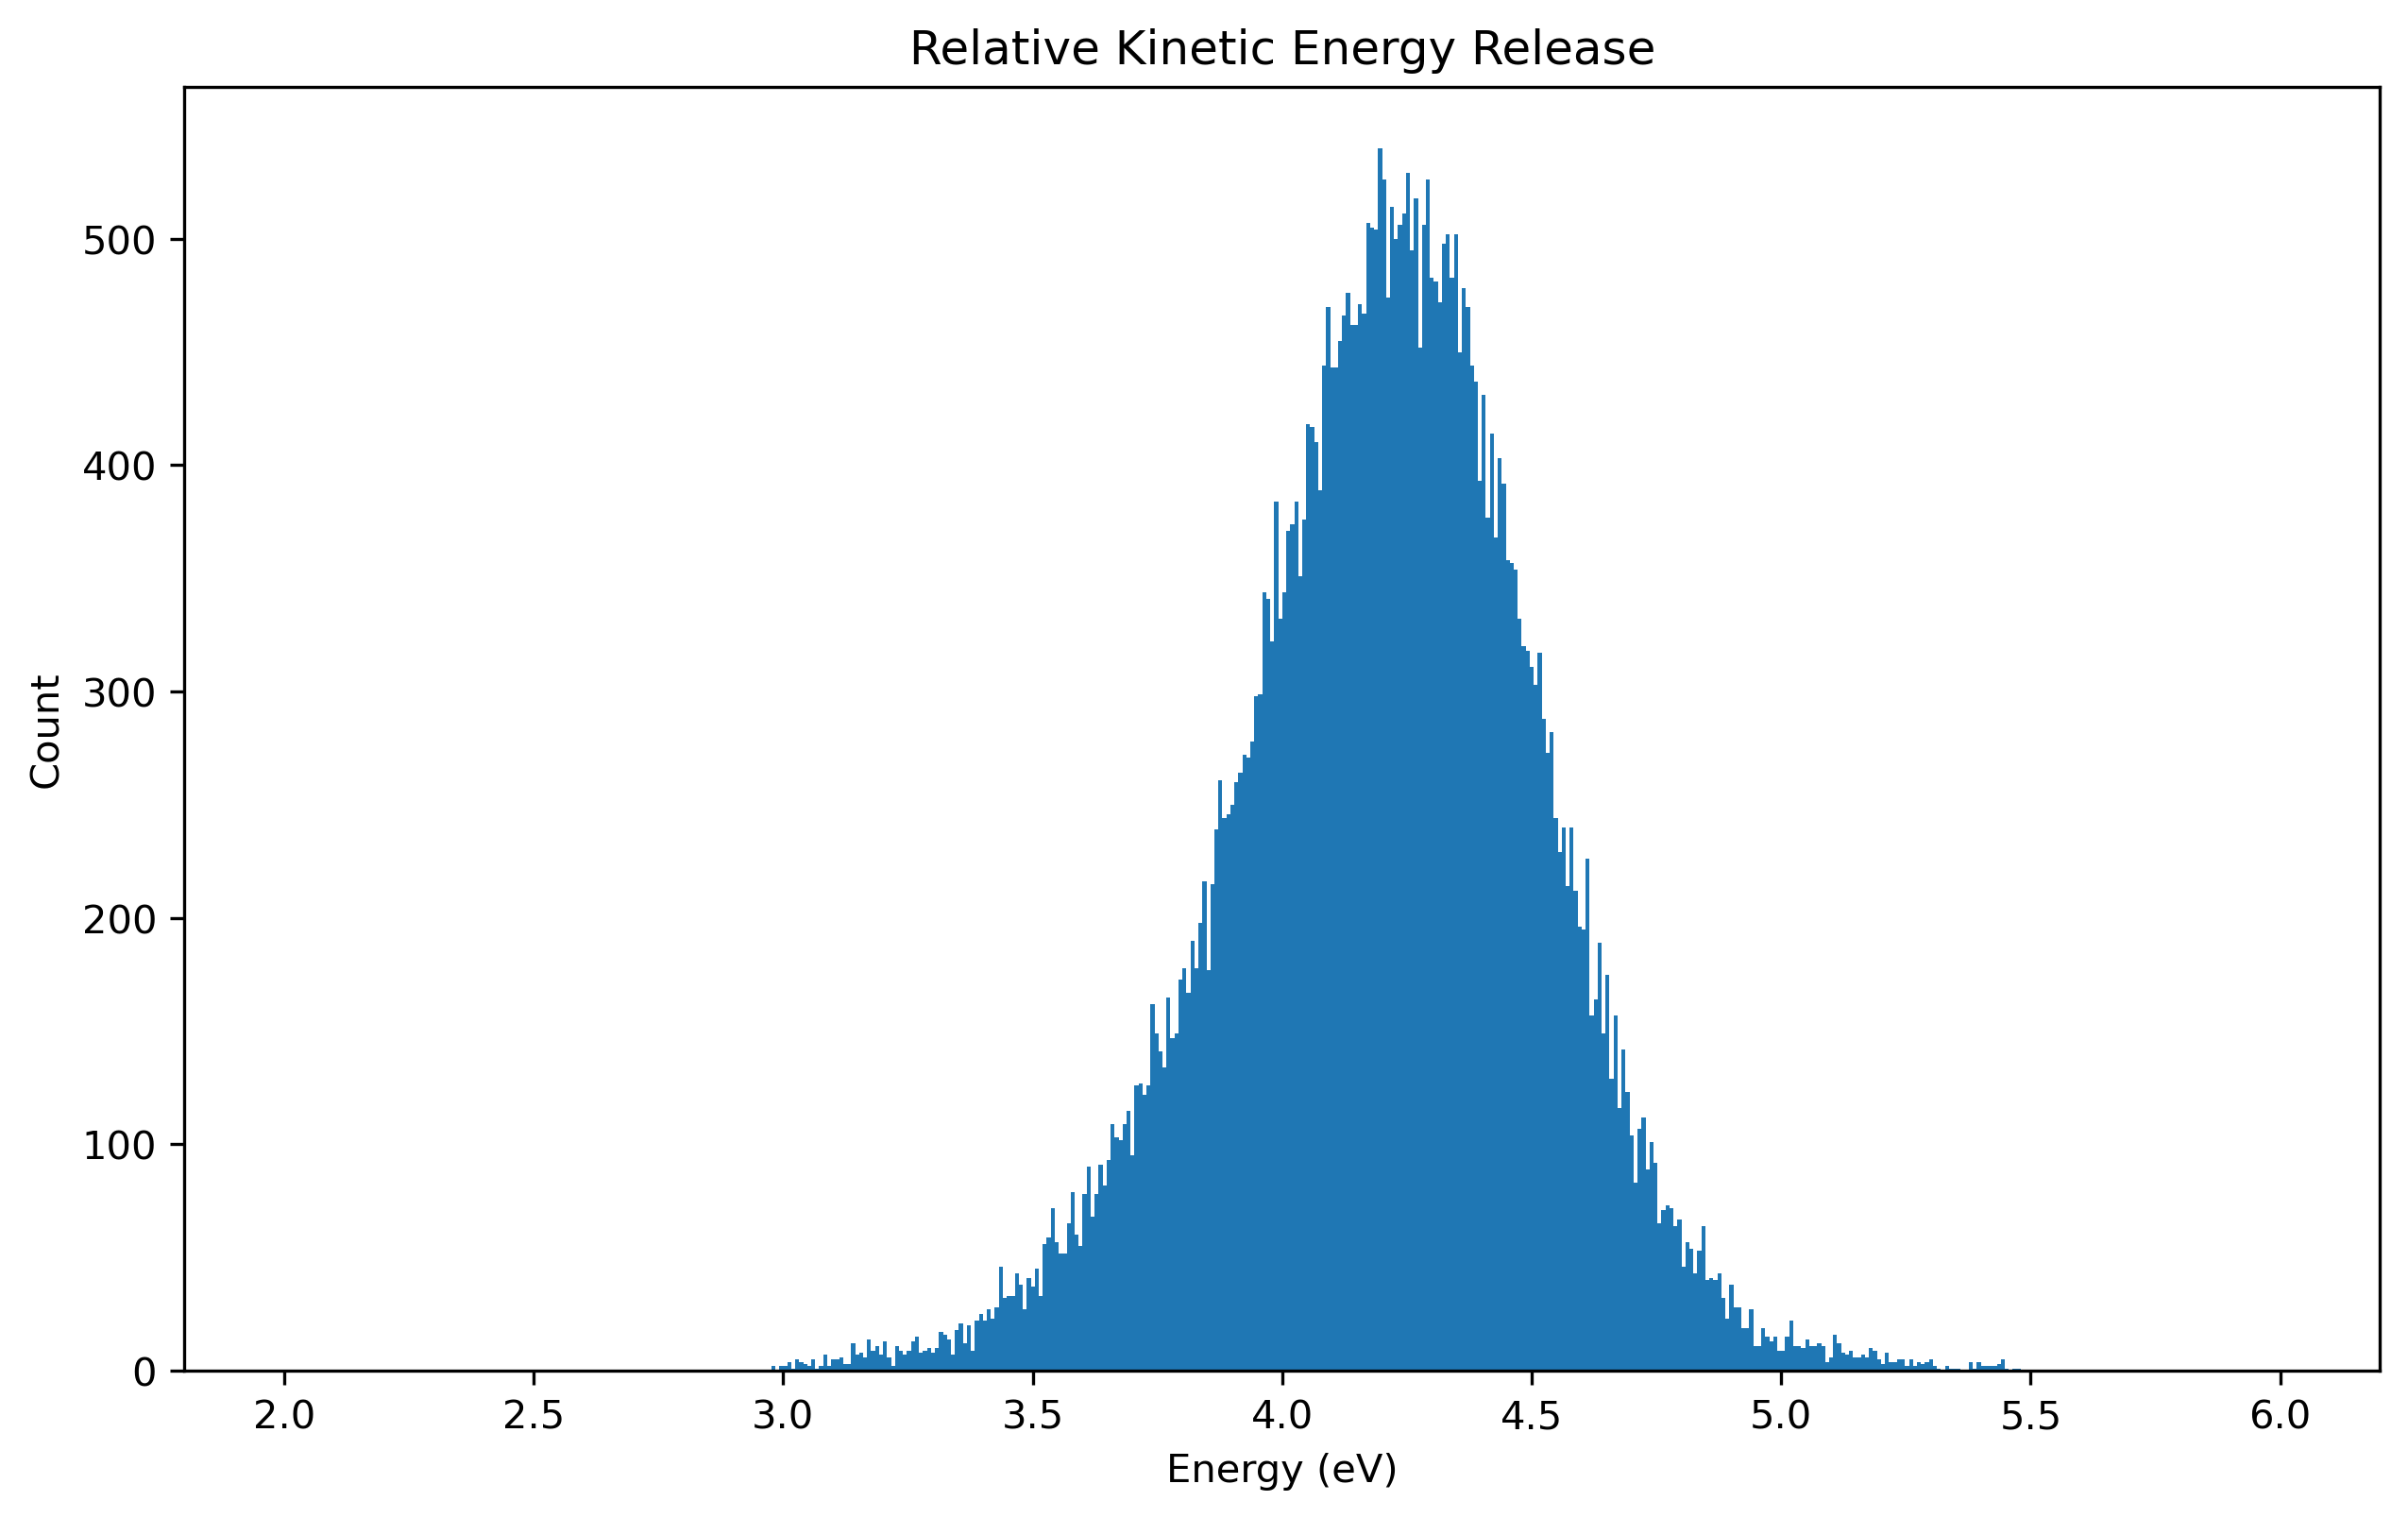

In [138]:
KER_rel = (p12x**2+p12y**2+p12z**2)/(m1)/MASSAU*EVAU
plt.figure(figsize=(10, 6), dpi=300);
plt.hist(KER_rel,bins=500, range=(2,6));
#plt.xticks(np.arange(2,6,step=0.5));

# Add labels and title
plt.xlabel('Energy (eV)');
plt.ylabel('Count');
plt.title('Relative Kinetic Energy Release');
plt.show()

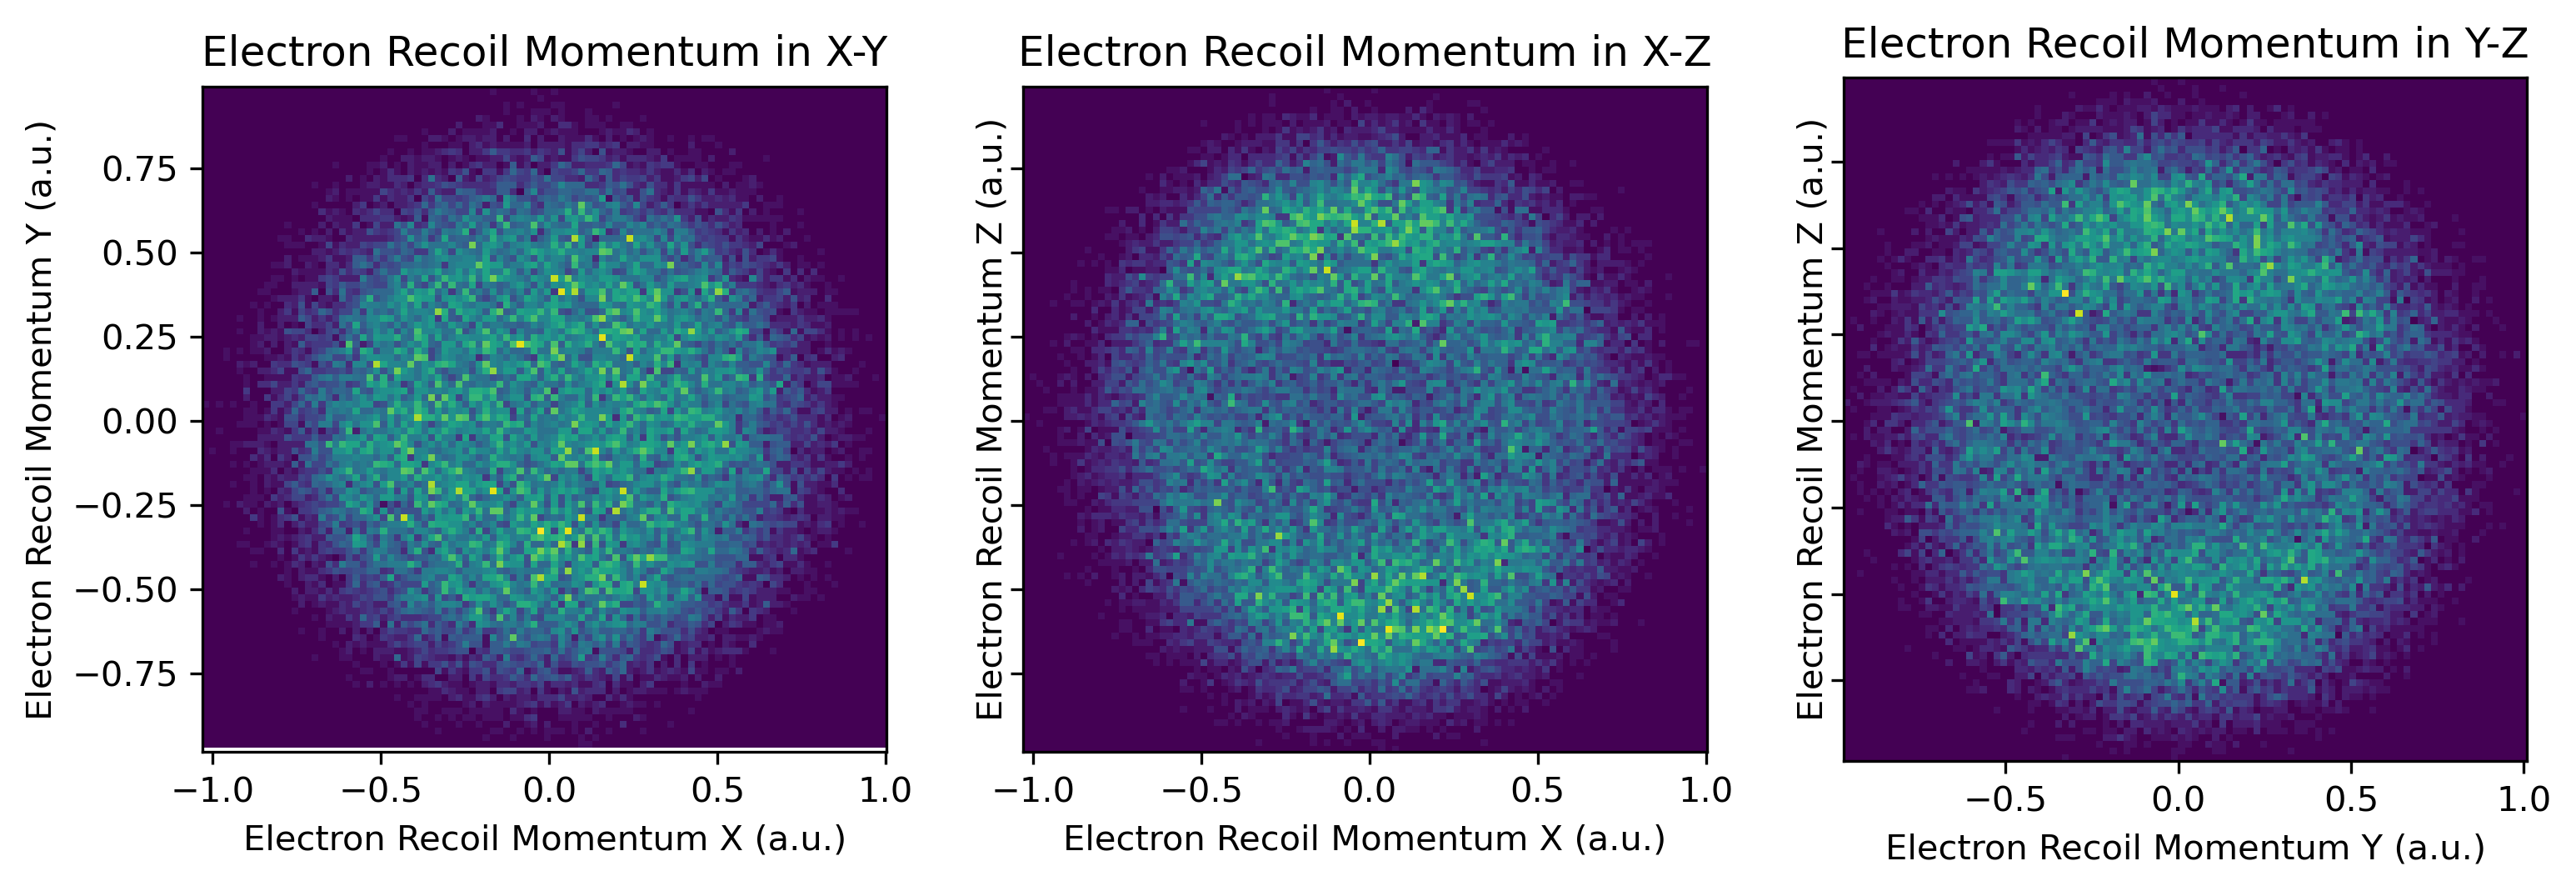

In [139]:
e_p12x = (e_px0 - e_px1)/2
e_p12y = (e_py0 - e_py1)/2
e_p12z = (e_pz0 - e_pz1)/2

e_p12_mag = np.sqrt(e_p12x**2+e_p12y**2+e_p12z**2)

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(12,4),sharey=True,dpi=300)

ax1.hist2d(e_p12x, e_p12y, bins = (100,100));
ax1.set_title('Electron Recoil Momentum in X-Y');
ax1.set_xlabel('Electron Recoil Momentum X (a.u.)');
ax1.set_ylabel('Electron Recoil Momentum Y (a.u.)');

ax2.hist2d(e_p12x, e_p12z, bins = (100,100));
ax2.set_title('Electron Recoil Momentum in X-Z');
ax2.set_xlabel('Electron Recoil Momentum X (a.u.)');
ax2.set_ylabel('Electron Recoil Momentum Z (a.u.)');

ax3.hist2d(e_p12y, e_p12z, bins = (100,100));
ax3.set_title('Electron Recoil Momentum in Y-Z');
ax3.set_xlabel('Electron Recoil Momentum Y (a.u.)');
ax3.set_ylabel('Electron Recoil Momentum Z (a.u.)');

ax1.set_aspect('equal')
ax2.set_aspect('equal')
ax3.set_aspect('equal')

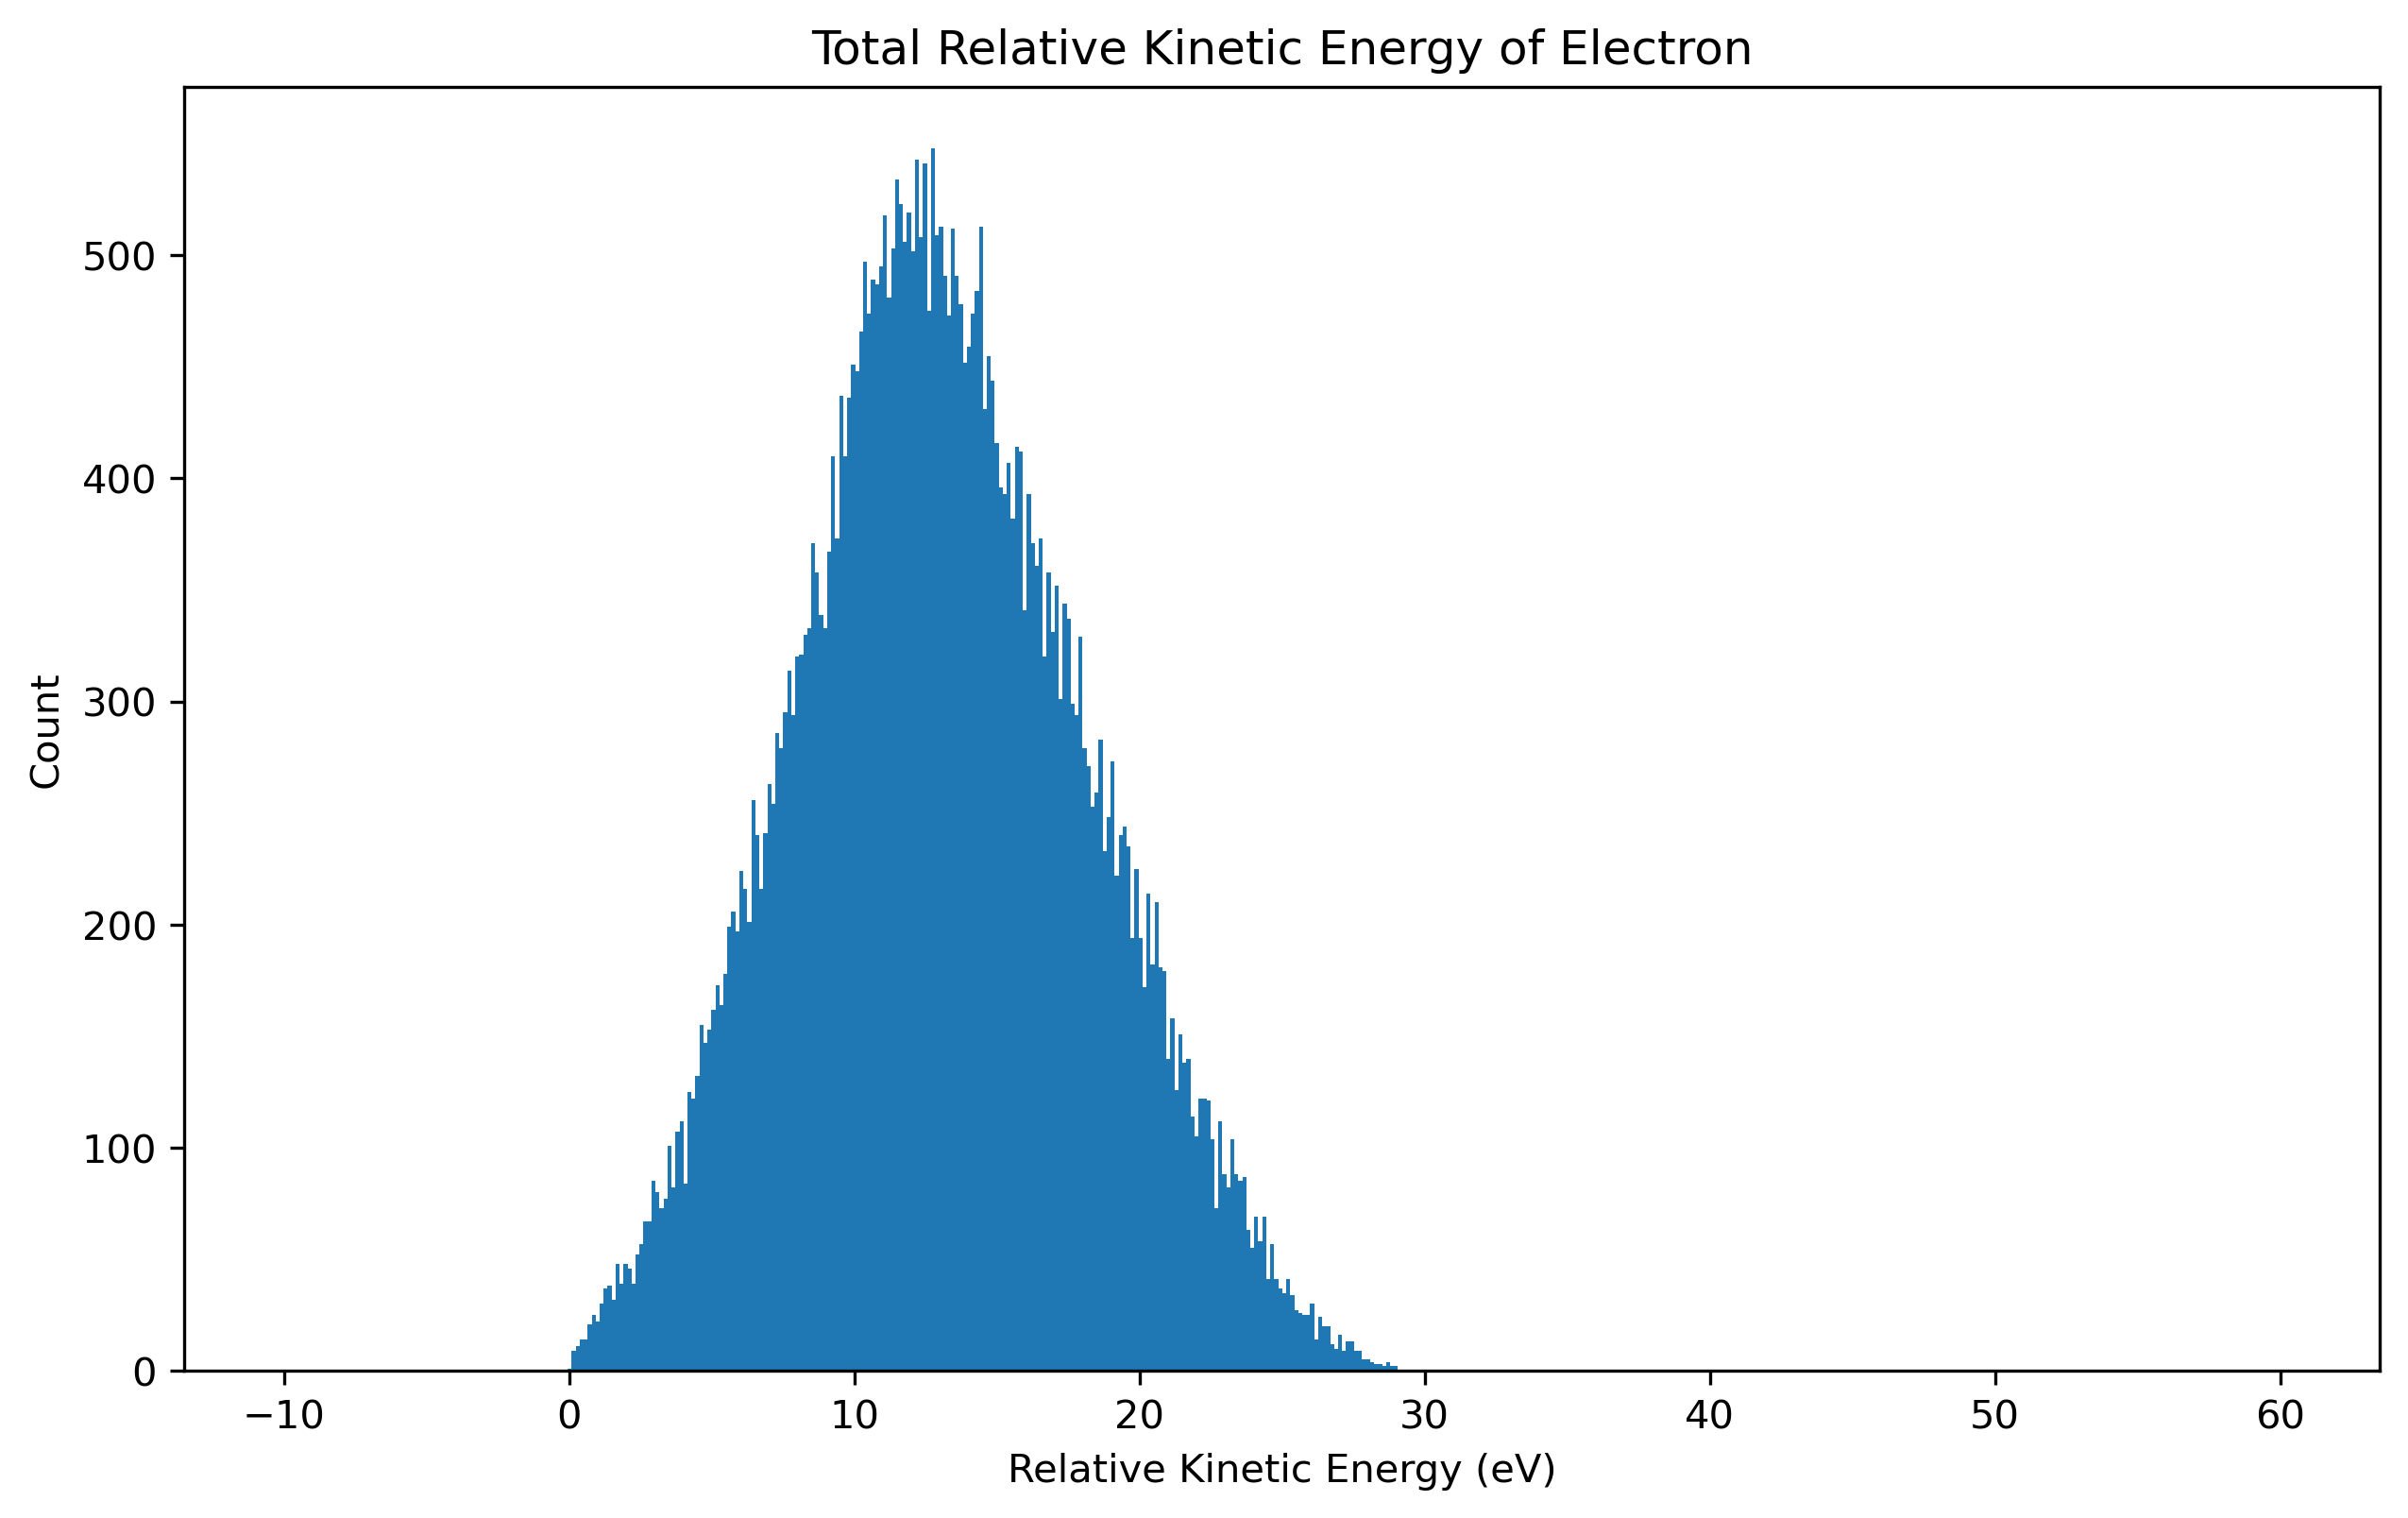

In [140]:
KEe_rel = 27.2114*(e_p12x**2+e_p12y**2+e_p12z**2);

#total_KEe = 27.2114*(total_e_px**2+total_e_py**2+total_e_pz**2)/2;

plt.figure(figsize=(10, 6), dpi=300);
plt.hist(KEe_rel,bins=500, range=(-10,60));
# Add labels and title
plt.xlabel('Relative Kinetic Energy (eV)');
plt.ylabel('Count');
plt.title('Total Relative Kinetic Energy of Electron');
#plt.axvline(28,c='r',ls='--')


len(KEe1)
plt.savefig(folder_path+"\\Relative_KEe.png")

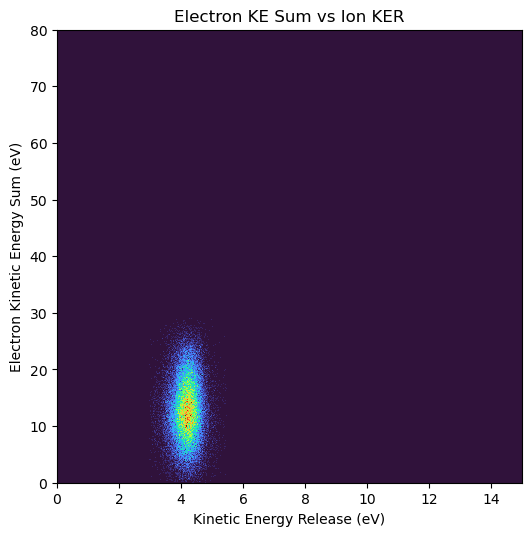

In [141]:
x_range = (0,15);
y_range = (0,80);

plt.figure(figsize=(6, 6), dpi=100);

#plt.hist2d(KER, KERe,bins=(500, 500), range=[x_range,y_range], norm=LogNorm());
plt.hist2d(KER_rel, KEe_rel,bins=(500, 500), range=[x_range,y_range],cmap='turbo');
# Add labels and title
plt.xlabel('Relative Kinetic Energy Release (eV)');
plt.ylabel('Relative Electron Kinetic Energy Sum (eV)');
plt.title('Relative Electron KE Sum vs Relative Ion KER');
#plt.axvline(28,c='r',ls='--')

#plt.hist2d(KER, KERe, bins=(100,100));
plt.savefig(folder_path+"\\Rel_KEe_vs_KER.png")

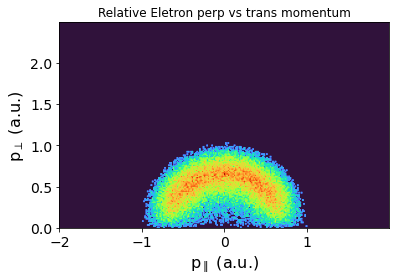

<Figure size 432x288 with 0 Axes>

In [142]:
p_e_longitudinal0 = e_p12z
p_e_transverse0 = np.sqrt((e_p12x)**2 + (e_p12y)**2)

p_ez_edges = np.arange(0,2.5,0.015)
p_ex_edges = np.arange(-2,2,0.015)
H_e_px_pz, p_ex_edges, p_ez_edges = np.histogram2d(p_e_longitudinal0,p_e_transverse0,bins=(p_ex_edges,p_ez_edges))
H_e_px_pz = H_e_px_pz.T

fig_a, ax_a = plt.subplots(1,1,figsize=(8,4))

im = ax_a.imshow(H_e_px_pz, origin='lower', extent=[p_ex_edges[0], p_ex_edges[-1], p_ez_edges[0], p_ez_edges[-1]],cmap = 'turbo',aspect=1/1,norm = PowerNorm(gamma =1 / 2.5))
ax_a.set_ylabel('p$_{\perp}$ (a.u.)',fontsize=16,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax_a.set_xlabel('p$_{\parallel}$ (a.u.)',fontsize=16,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax_a.set_title('Relative Eletron perp vs trans momentum')
ax_a.tick_params(labelsize=14)

# Adjust the position of the color bar
#cb_ax = fig_a.add_axes([1, 0, 1, 0])  # Adjust the second value (0.83) to make space for the title
#cb = fig_a.colorbar(im, cax = cb_ax, orientation = 'vertical')
#tick_locator = ticker.MaxNLocator(nbins=5)
#cb.locator = tick_locator
#cb.update_ticks()

#cb.ax.tick_params(labelsize = 13)
#cb.ax.xaxis.set_ticks_position('top')
#cb.ax.xaxis.set_label_position('top')

# Save or display the plot
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()
plt.savefig(folder_path+"\\relative_e_p_long_vs_e_p_trans.png")


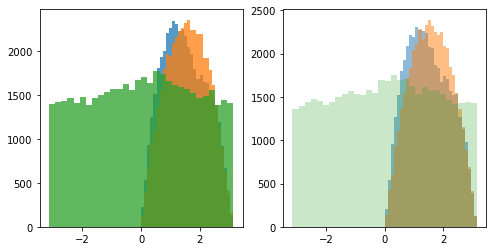

In [143]:
###################################################
### compute electon theta and phi distributions ###
###################################################

plt.figure(figsize=(8, 4))

# Plot the first histogram (theta_electron)
plt.subplot(1, 2, 1)

e_p_mag = np.sqrt(e_px0**2 + e_py0**2 + e_pz0**2)

theta_electron = np.arccos(e_pz0/e_p_mag)
theta_k_electron = np.arccos((p12x*e_px0+p12y*e_py0+p12z*e_pz0)/(e_p_mag*p12_mag))
cos_theta_electron = e_pz0/e_p_mag
phi_electron = np.arctan2(e_py0,e_px0)

for phi in phi_electron:
    if phi < 0.0:
        phi += 2*np.pi        
phi_electron = phi_electron

theta_radius, theta_radian, _ = plt.hist(theta_electron,bins=np.linspace(0,np.pi,num=31),alpha=0.75)
theta_k_radius, theta_k_radian, _ = plt.hist(theta_k_electron,bins=np.linspace(0,np.pi,num=31),alpha=0.75)
phi_radius, phi_radian, _ = plt.hist(phi_electron,bins=np.linspace(-np.pi,np.pi,num=31),alpha=0.75)
#phi_radius, phi_radian, _ = plt.hist(cos_theta_electron,bins=np.linspace(-np.pi,np.pi,num=92),alpha=0.75)

###################################################
### compute electon theta and phi distributions ###
###################################################
plt.subplot(1, 2, 2)

e_p1_mag = np.sqrt(e_px1**2 + e_py1**2 + e_pz1**2)
theta_electron_1 = np.arccos(e_pz1/e_p1_mag)
theta_k_electron_1 = np.arccos((p12x*e_px1+p12y*e_py1+p12z*e_pz1)/(e_p1_mag*p12_mag))
cos_theta_electron_1 = e_pz1/e_p1_mag
phi_electron_1 = np.arctan2(e_py1,e_px1)

for phi in phi_electron_1:
    if phi < 0.0:
        phi += 2*np.pi        
phi_electron_1 = phi_electron_1

theta_radius_1, theta_radian_1, _ = plt.hist(theta_electron_1,bins=np.linspace(0,np.pi,num=31),alpha=0.5)
theta_k_radius_1, theta_k_radian_1, _ = plt.hist(theta_k_electron_1,bins=np.linspace(0,np.pi,num=31),alpha=0.50)
phi_radius_1, phi_radian_1, _ = plt.hist(phi_electron_1,bins=np.linspace(-np.pi,np.pi,num=31),alpha=0.25)
#phi_radius, phi_radian, _ = plt.hist(cos_theta_electron,bins=np.linspace(-np.pi,np.pi,num=92),alpha=0.75)

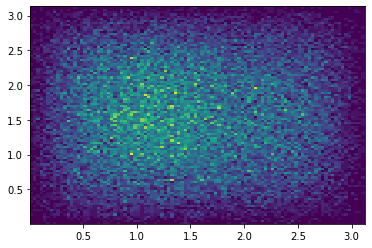

In [144]:
plt.hist2d(theta_electron, theta_k_electron_1, bins = (100,100));

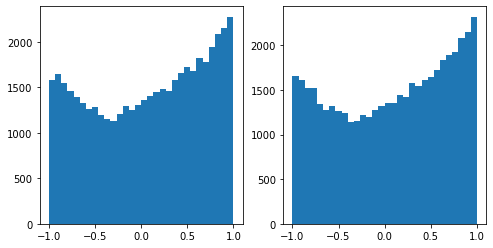

In [145]:
###########################
### cos(theta_electron) ###
###########################
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.hist(cos_theta_electron,bins=30);
plt.subplot(1, 2, 2)
plt.hist(cos_theta_electron_1,bins=30);


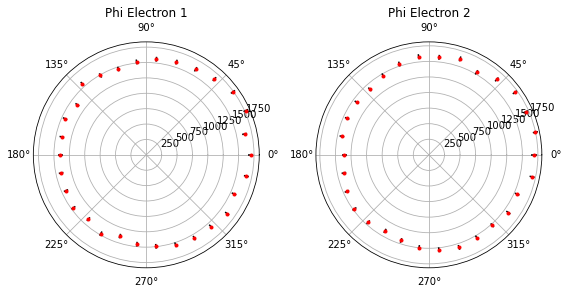

In [146]:
####################
### phi_electron ###
####################
fig, ax = plt.subplots(1, 2, subplot_kw=dict(projection='polar'), figsize = (8,8))

radius_error = [np.sqrt(x) for x in phi_radius]
ax[0].errorbar(phi_radian[:-1], phi_radius, yerr = radius_error, fmt = 'r.', ecolor = 'k')
ax[0].grid(True)
ax[0].set_title('Phi Electron 1')

radius_error_1 = [np.sqrt(x) for x in phi_radius_1]
ax[1].errorbar(phi_radian[:-1], phi_radius_1, yerr = radius_error_1, fmt = 'r.', ecolor = 'k')
ax[1].grid(True)
ax[1].set_title('Phi Electron 2')

fig.tight_layout()
#fig.show()

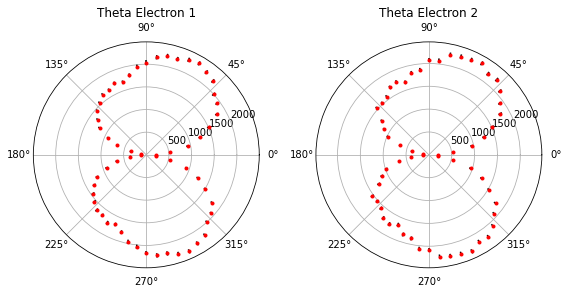

In [147]:
######################
### theta_electron ###
######################
fig, ax = plt.subplots(1, 2, subplot_kw=dict(projection='polar'), figsize = (8,4))

radius_error = np.array([np.sqrt(x) for x in theta_radius])
radius_error_ = np.flip(radius_error)

theta = np.concatenate((theta_radian[:-1],theta_radian[:-1]+np.pi))
radius = np.concatenate((theta_radius,np.flip(theta_radius)))
error = np.concatenate((radius_error,radius_error_))

ax[0].errorbar(theta, radius, yerr = error, fmt = 'r.', ecolor = 'k')
ax[0].grid(True)
ax[0].set_title('Theta Electron 1')

radius_error_1 = np.array([np.sqrt(x) for x in theta_radius_1])
radius_error_ = np.flip(radius_error_1)

theta_1 = np.concatenate((theta_radian_1[:-1],theta_radian_1[:-1]+np.pi))
radius_1 = np.concatenate((theta_radius_1,np.flip(theta_radius_1)))
error_1 = np.concatenate((radius_error_1,radius_error_))

ax[1].errorbar(theta_1, radius_1, yerr = error_1, fmt = 'r.', ecolor = 'k')
ax[1].grid(True)
ax[1].set_title('Theta Electron 2')

fig.tight_layout()
#fig.show()

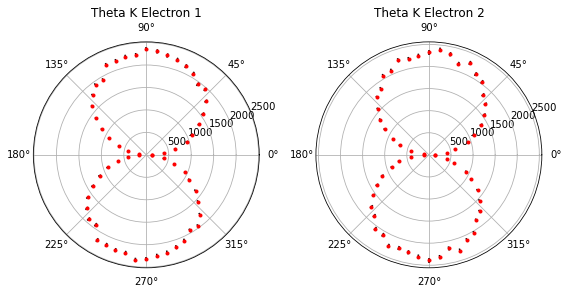

In [148]:
######################
### theta_k_electron ###
######################
fig, ax = plt.subplots(1, 2, subplot_kw=dict(projection='polar'), figsize = (8,4))

radius_error = np.array([np.sqrt(x) for x in theta_k_radius])
radius_error_ = np.flip(radius_error)

theta = np.concatenate((theta_k_radian[:-1],theta_k_radian[:-1]+np.pi))
radius = np.concatenate((theta_k_radius,np.flip(theta_k_radius)))
error = np.concatenate((radius_error,radius_error_))

ax[0].errorbar(theta, radius, yerr = error, fmt = 'r.', ecolor = 'k')
ax[0].grid(True)
ax[0].set_title('Theta K Electron 1')

radius_error_1 = np.array([np.sqrt(x) for x in theta_k_radius_1])
radius_error_ = np.flip(radius_error_1)

theta_1 = np.concatenate((theta_k_radian_1[:-1],theta_k_radian_1[:-1]+np.pi))
radius_1 = np.concatenate((theta_k_radius_1,np.flip(theta_k_radius_1)))
error_1 = np.concatenate((radius_error_1,radius_error_))

ax[1].errorbar(theta_1, radius_1, yerr = error_1, fmt = 'r.', ecolor = 'k')
ax[1].grid(True)
ax[1].set_title('Theta K Electron 2')

fig.tight_layout()
#fig.show()

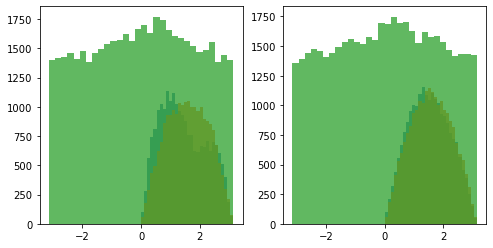

In [149]:
KEe1_high_filter = (KEe1 > 10) & (KEe1 < 40) & (KEe2 < 10)
KEe2_high_filter = (KEe2 > 10) & (KEe2 < 40) & (KEe1 < 10)



###################################################
### compute electon theta and phi distributions ###
###################################################
p12x = i_px0 - i_px1
p12y = i_py0 - i_py1
p12z = i_pz0 - i_pz1

p12_mag = np.sqrt(p12x**2+p12y**2+p12z**2)


plt.figure(figsize=(8, 4))

# Plot the first histogram (theta_electron)
plt.subplot(1, 2, 1)

e_p_mag = np.sqrt(e_px0**2 + e_py0**2 + e_pz0**2)

theta_electron = np.arccos(e_pz0/e_p_mag)
theta_k_electron = np.arccos((p12x*e_px0+p12y*e_py0+p12z*e_pz0)/(e_p_mag*p12_mag))
cos_theta_electron = e_pz0/e_p_mag
phi_electron = np.arctan2(e_py0,e_px0)

for phi in phi_electron:
    if phi < 0.0:
        phi += 2*np.pi        
phi_electron = phi_electron

theta_radius, theta_radian, _ = plt.hist(theta_electron[KEe1_high_filter],bins=np.linspace(0,np.pi,num=31),alpha=0.75)
theta_k_radius, theta_k_radian, _ = plt.hist(theta_k_electron[KEe1_high_filter],bins=np.linspace(0,np.pi,num=31),alpha=0.75)
phi_radius, phi_radian, _ = plt.hist(phi_electron,bins=np.linspace(-np.pi,np.pi,num=31),alpha=0.75)
#phi_radius, phi_radian, _ = plt.hist(cos_theta_electron,bins=np.linspace(-np.pi,np.pi,num=92),alpha=0.75)

###################################################
### compute electon theta and phi distributions ###
###################################################
plt.subplot(1, 2, 2)

e_p1_mag = np.sqrt(e_px1**2 + e_py1**2 + e_pz1**2)
theta_electron_1 = np.arccos(e_pz1/e_p1_mag)
theta_k_electron_1 = np.arccos((p12x*e_px1+p12y*e_py1+p12z*e_pz1)/(e_p1_mag*p12_mag))
cos_theta_electron_1 = e_pz1/e_p1_mag
phi_electron_1 = np.arctan2(e_py1,e_px1)

for phi in phi_electron_1:
    if phi < 0.0:
        phi += 2*np.pi        
phi_electron_1 = phi_electron_1

theta_radius_1, theta_radian_1, _ = plt.hist(theta_electron_1[KEe1_high_filter],bins=np.linspace(0,np.pi,num=31),alpha=0.75)
theta_k_radius_1, theta_k_radian_1, _ = plt.hist(theta_k_electron_1[KEe1_high_filter],bins=np.linspace(0,np.pi,num=31),alpha=0.75)
phi_radius_1, phi_radian_1, _ = plt.hist(phi_electron_1,bins=np.linspace(-np.pi,np.pi,num=31),alpha=0.75)
#phi_radius, phi_radian, _ = plt.hist(cos_theta_electron,bins=np.linspace(-np.pi,np.pi,num=92),alpha=0.75)

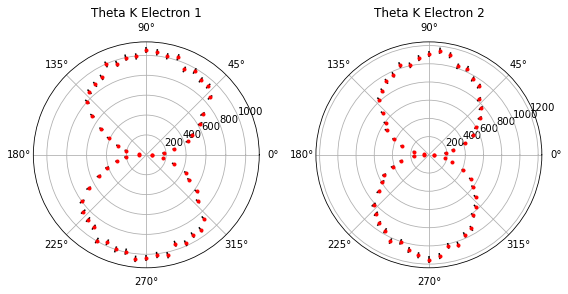

In [150]:
######################
### theta_k_electron ###
######################
fig, ax = plt.subplots(1, 2, subplot_kw=dict(projection='polar'), figsize = (8,4))

radius_error = np.array([np.sqrt(x) for x in theta_k_radius])
radius_error_ = np.flip(radius_error)

theta = np.concatenate((theta_k_radian[:-1],theta_k_radian[:-1]+np.pi))
radius = np.concatenate((theta_k_radius,np.flip(theta_k_radius)))
error = np.concatenate((radius_error,radius_error_))

ax[0].errorbar(theta, radius, yerr = error, fmt = 'r.', ecolor = 'k')
ax[0].grid(True)
ax[0].set_title('Theta K Electron 1')

radius_error_1 = np.array([np.sqrt(x) for x in theta_k_radius_1])
radius_error_ = np.flip(radius_error_1)

theta_1 = np.concatenate((theta_k_radian_1[:-1],theta_k_radian_1[:-1]+np.pi))
radius_1 = np.concatenate((theta_k_radius_1,np.flip(theta_k_radius_1)))
error_1 = np.concatenate((radius_error_1,radius_error_))

ax[1].errorbar(theta_1, radius_1, yerr = error_1, fmt = 'r.', ecolor = 'k')
ax[1].grid(True)
ax[1].set_title('Theta K Electron 2')

fig.tight_layout()
#fig.show()

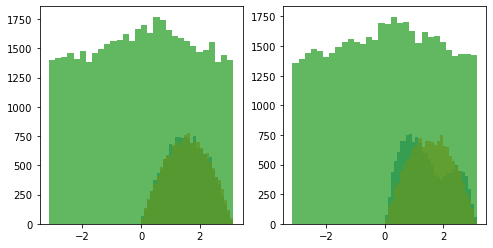

In [151]:
KEe1_high_filter = (KEe1 > 20) & (KEe1 < 50) & (KEe2 < 10)
KEe2_high_filter = (KEe2 > 20) & (KEe2 < 50) & (KEe1 < 10)


###################################################
### compute electon theta and phi distributions ###
###################################################
p12x = i_px0 - i_px1
p12y = i_py0 - i_py1
p12z = i_pz0 - i_pz1

p12_mag = np.sqrt(p12x**2+p12y**2+p12z**2)


plt.figure(figsize=(8, 4))

# Plot the first histogram (theta_electron)
plt.subplot(1, 2, 1)

e_p_mag = np.sqrt(e_px0**2 + e_py0**2 + e_pz0**2)

theta_electron = np.arccos(e_pz0/e_p_mag)
theta_k_electron = np.arccos((p12x*e_px0+p12y*e_py0+p12z*e_pz0)/(e_p_mag*p12_mag))
cos_theta_electron = e_pz0/e_p_mag
phi_electron = np.arctan2(e_py0,e_px0)

for phi in phi_electron:
    if phi < 0.0:
        phi += 2*np.pi        
phi_electron = phi_electron

theta_radius, theta_radian, _ = plt.hist(theta_electron[KEe2_high_filter],bins=np.linspace(0,np.pi,num=31),alpha=0.75)
theta_k_radius, theta_k_radian, _ = plt.hist(theta_k_electron[KEe2_high_filter],bins=np.linspace(0,np.pi,num=31),alpha=0.75)
phi_radius, phi_radian, _ = plt.hist(phi_electron,bins=np.linspace(-np.pi,np.pi,num=31),alpha=0.75)
#phi_radius, phi_radian, _ = plt.hist(cos_theta_electron,bins=np.linspace(-np.pi,np.pi,num=92),alpha=0.75)

###################################################
### compute electon theta and phi distributions ###
###################################################
plt.subplot(1, 2, 2)

e_p1_mag = np.sqrt(e_px1**2 + e_py1**2 + e_pz1**2)
theta_electron_1 = np.arccos(e_pz1/e_p1_mag)
theta_k_electron_1 = np.arccos((p12x*e_px1+p12y*e_py1+p12z*e_pz1)/(e_p1_mag*p12_mag))
cos_theta_electron_1 = e_pz1/e_p1_mag
phi_electron_1 = np.arctan2(e_py1,e_px1)

for phi in phi_electron_1:
    if phi < 0.0:
        phi += 2*np.pi        
phi_electron_1 = phi_electron_1

theta_radius_1, theta_radian_1, _ = plt.hist(theta_electron_1[KEe2_high_filter],bins=np.linspace(0,np.pi,num=31),alpha=0.75)
theta_k_radius_1, theta_k_radian_1, _ = plt.hist(theta_k_electron_1[KEe2_high_filter],bins=np.linspace(0,np.pi,num=31),alpha=0.75)
phi_radius_1, phi_radian_1, _ = plt.hist(phi_electron_1,bins=np.linspace(-np.pi,np.pi,num=31),alpha=0.75)
#phi_radius, phi_radian, _ = plt.hist(cos_theta_electron,bins=np.linspace(-np.pi,np.pi,num=92),alpha=0.75)

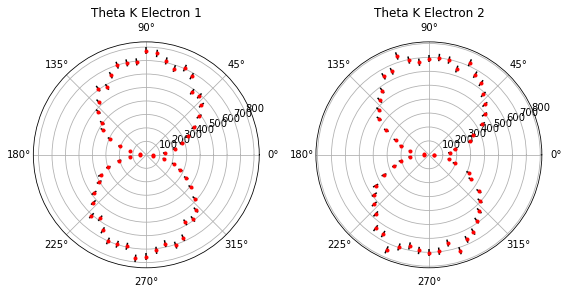

In [152]:
######################
### theta_k_electron ###
######################
fig, ax = plt.subplots(1, 2, subplot_kw=dict(projection='polar'), figsize = (8,4))

radius_error = np.array([np.sqrt(x) for x in theta_k_radius])
radius_error_ = np.flip(radius_error)

theta = np.concatenate((theta_k_radian[:-1],theta_k_radian[:-1]+np.pi))
radius = np.concatenate((theta_k_radius,np.flip(theta_k_radius)))
error = np.concatenate((radius_error,radius_error_))

ax[0].errorbar(theta, radius, yerr = error, fmt = 'r.', ecolor = 'k')
ax[0].grid(True)
ax[0].set_title('Theta K Electron 1')

radius_error_1 = np.array([np.sqrt(x) for x in theta_k_radius_1])
radius_error_ = np.flip(radius_error_1)

theta_1 = np.concatenate((theta_k_radian_1[:-1],theta_k_radian_1[:-1]+np.pi))
radius_1 = np.concatenate((theta_k_radius_1,np.flip(theta_k_radius_1)))
error_1 = np.concatenate((radius_error_1,radius_error_))

ax[1].errorbar(theta_1, radius_1, yerr = error_1, fmt = 'r.', ecolor = 'k')
ax[1].grid(True)
ax[1].set_title('Theta K Electron 2')

fig.tight_layout()
#fig.show()

<ipython-input-153-b8f56db2e1e1>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


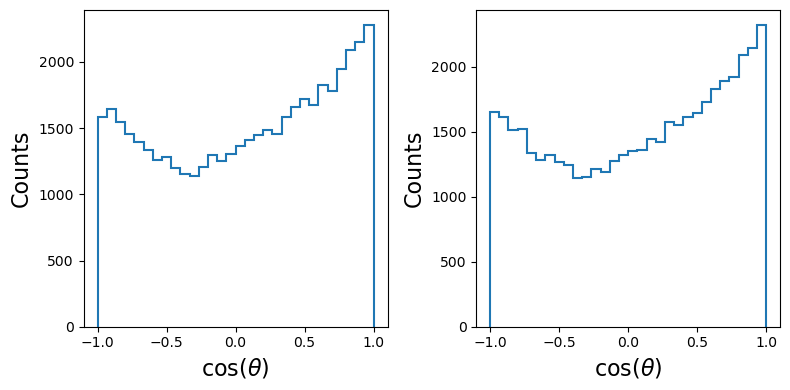

In [153]:
###########################
### cos(theta_electron) ###
###########################
fig, ax = plt.subplots(1, 2, figsize = (8,4), dpi = 100)

radius_, cos_theta_, _  = ax[0].hist(cos_theta_electron, bins=30,histtype='step',lw=1.5)
ax[0].set_xlabel('cos($\\theta$)', fontsize=16)
ax[0].set_ylabel('Counts', fontsize=16)

radius__1, cos_theta__1, _  = ax[1].hist(cos_theta_electron_1, bins=30,histtype='step',lw=1.5)
ax[1].set_xlabel('cos($\\theta$)', fontsize=16)
ax[1].set_ylabel('Counts', fontsize=16)


fig.tight_layout()
fig.show()

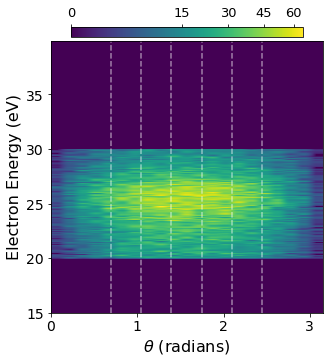

In [154]:
# Histogram 2D
Ee_edges = np.arange(15, 40, 0.1)
theta_edges = np.arange(0.0, np.pi + 0.15, 0.15)
H_Ee_theta, theta_edges, Ee_edges = np.histogram2d(theta_k_electron, KEe1+KEe2, bins=(theta_edges, Ee_edges))
H_Ee_theta, theta_edges, Ee_edges = np.histogram2d(theta_k_electron_1, KEe1+KEe2, bins=(theta_edges, Ee_edges))
H_Ee_theta = H_Ee_theta.T

# Plotting
fig_a, ax_a = plt.subplots(1, 1, figsize=(5, 5))

im = ax_a.imshow(H_Ee_theta, origin='lower', extent=[theta_edges[0], theta_edges[-1], Ee_edges[0], Ee_edges[-1]],
                  aspect=(theta_edges[-1] - theta_edges[0]) / (Ee_edges[-1] - Ee_edges[0]), cmap='viridis',
                  norm=PowerNorm(gamma=1 / 2))
ax_a.set_xlabel('$\\theta$ (radians)', fontsize=16)
ax_a.set_ylabel('Electron Energy (eV)', fontsize=16)
ax_a.tick_params(labelsize=14)

cb_ax = fig_a.add_axes([0.19, 0.89, 0.645, 0.03])
cb = fig_a.colorbar(im, cax=cb_ax, orientation='horizontal')
tick_locator = ticker.MaxNLocator(nbins=5)
cb.locator = tick_locator
cb.update_ticks()

cb.ax.tick_params(labelsize=13)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

for i in range(2, 8):
    ax_a.axvline(i * np.pi / 9, c='w', ls='--', alpha=0.5)


plt.savefig(folder_path+"\\theta_electron_vs_KEe.png")
plt.show()

In [155]:
print(len(KEe1))
print(len(e_TOF0))


45942
173755


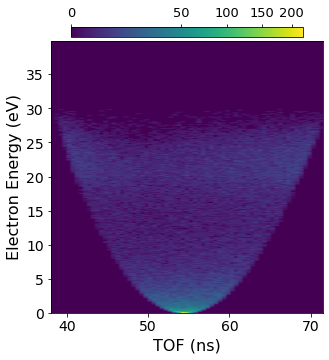

In [156]:
# Histogram 2D
Ee_edges = np.arange(0, 40, 0.1)
TOF_edges = np.arange(e1tof_left_edge, e1tof_right_edge, 0.5)
H_Ee_TOF, TOF_edges, Ee_edges = np.histogram2d(e_TOF0_filt, KEe1, bins=(TOF_edges, Ee_edges))
H_Ee_TOF = H_Ee_TOF.T

# Plotting
fig_a, ax_a = plt.subplots(1, 1, figsize=(5, 5))

im = ax_a.imshow(H_Ee_TOF, origin='lower', extent=[TOF_edges[0], TOF_edges[-1], Ee_edges[0], Ee_edges[-1]],
                  aspect=(TOF_edges[-1] - TOF_edges[0]) / (Ee_edges[-1] - Ee_edges[0]), cmap='viridis',
                  norm=PowerNorm(gamma=1 / 2))
ax_a.set_xlabel('TOF (ns)', fontsize=16)
ax_a.set_ylabel('Electron Energy (eV)', fontsize=16)
ax_a.tick_params(labelsize=14)

cb_ax = fig_a.add_axes([0.19, 0.89, 0.645, 0.03])
cb = fig_a.colorbar(im, cax=cb_ax, orientation='horizontal')
tick_locator = ticker.MaxNLocator(nbins=5)
cb.locator = tick_locator
cb.update_ticks()

cb.ax.tick_params(labelsize=13)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

plt.savefig(folder_path+"\\TOF_vs_KEe.png")
plt.show()


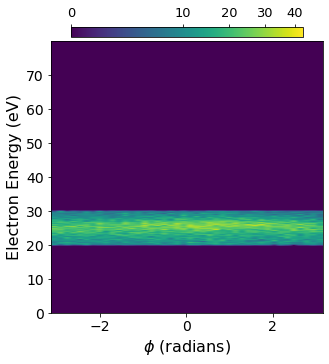

45942


In [157]:
# Histogram 2D
Ee_edges = np.arange(0.0, 80, 0.15)
phi_edges = np.arange(-np.pi, np.pi + 0.15, 0.15)
H_Ee_phi, phi_edges, Ee_edges = np.histogram2d(phi_electron, KEe1+KEe2, bins=(phi_edges, Ee_edges))
H_Ee_phi = H_Ee_phi.T

# Plotting
fig_a, ax_a = plt.subplots(1, 1, figsize=(5, 5))

im = ax_a.imshow(H_Ee_phi, origin='lower', extent=[phi_edges[0], phi_edges[-1], Ee_edges[0], Ee_edges[-1]],
                  aspect=(phi_edges[-1] - phi_edges[0]) / (Ee_edges[-1] - Ee_edges[0]), cmap='viridis',
                  norm=PowerNorm(gamma=1 / 2))
ax_a.set_xlabel('$\phi$ (radians)', fontsize=16)
ax_a.set_ylabel('Electron Energy (eV)', fontsize=16)
ax_a.tick_params(labelsize=14)

cb_ax = fig_a.add_axes([0.19, 0.89, 0.645, 0.03])
cb = fig_a.colorbar(im, cax=cb_ax, orientation='horizontal')
tick_locator = ticker.MaxNLocator(nbins=5)
cb.locator = tick_locator
cb.update_ticks()

cb.ax.tick_params(labelsize=13)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')


plt.savefig(folder_path+"\\phi_electron vs KEe.png")
plt.show()

print(len(phi_electron))

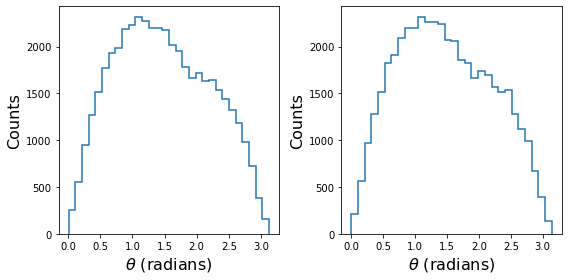

In [158]:
######################
### theta_electron ###
######################
fig, ax = plt.subplots(1, 2, figsize = (8,4))

radius, cos_theta, _  = ax[0].hist(theta_electron,bins=30,histtype='step',lw=1.5)
ax[0].set_xlabel('$\\theta$ (radians)', fontsize=16)
ax[0].set_ylabel('Counts', fontsize=16)


radius_1, cos_theta_1, _  = ax[1].hist(theta_electron_1,bins=30,histtype='step',lw=1.5)
ax[1].set_xlabel('$\\theta$ (radians)', fontsize=16)
ax[1].set_ylabel('Counts', fontsize=16)

fig.tight_layout()
#fig.show()

plt.savefig(folder_path+"\\theta_electron.png")


In [159]:
bincenters = 0.5*(cos_theta[1:]+cos_theta[:-1])

###################################################################
### expression for 2-photon photoelectron angular distributions ###
################### using Legendre polynomials ####################
###################################################################
def Legendre(x,a,b,c):
    return (a*1 + b*(0.5*(3*np.cos(x)**2 - 1)) +  
            c*(1/8 * (35*np.cos(x)**4 - 30*np.cos(x)**2 + 3)))

################################################################
### dividing by Jacobian to properly scale counts and errors ###
################################################################
radius_scaled = [radius[n]/np.sin(bincenters[n]) for n in range(len(bincenters))]
radius_scaled_error = [np.sqrt(n) for n in radius_scaled]
radius_scaled_error_ = [np.sqrt(radius[n])/np.sin(bincenters[n]) for n in range(len(bincenters))]



bincenters_1 = 0.5*(cos_theta_1[1:]+cos_theta_1[:-1])

###################################################################
### expression for 2-photon photoelectron angular distributions ###
################### using Legendre polynomials ####################
###################################################################
def Legendre(x,a,b,c):
    return (a*1 + b*(0.5*(3*np.cos(x)**2 - 1)) +  
            c*(1/8 * (35*np.cos(x)**4 - 30*np.cos(x)**2 + 3)))

################################################################
### dividing by Jacobian to properly scale counts and errors ###
################################################################
radius_scaled_1 = [radius_1[n]/np.sin(bincenters[n]) for n in range(len(bincenters_1))]
radius_scaled_error_1 = [np.sqrt(n) for n in radius_scaled_1]
radius_scaled_error__1 = [np.sqrt(radius_1[n])/np.sin(bincenters_1[n]) for n in range(len(bincenters_1))]

In [160]:
##############################################
### fit theta_electron with above function ###
##############################################
popt_, pcov_ = curve_fit(Legendre, bincenters, radius_scaled, sigma = radius_scaled_error_)
L_opt_ = Legendre(theta, popt_[0], popt_[1], popt_[2])

##############################
### fitted beta parameters ###
##############################
betas = popt_/popt_[0]
print((betas[1],betas[2]))

########################################
### errors on fitted beta parameters ###
########################################
vars_ = np.sqrt(pcov_)/popt_[0]
print((vars_[1,1],vars_[2,2]))



popt__1, pcov__1 = curve_fit(Legendre, bincenters_1, radius_scaled_1, sigma = radius_scaled_error__1)
L_opt__1 = Legendre(theta_1, popt__1[0], popt__1[1], popt__1[2])

##############################
### fitted beta parameters ###
##############################
betas_1 = popt__1/popt__1[0]
print((betas_1[1],betas_1[2]))

########################################
### errors on fitted beta parameters ###
########################################
vars__1 = np.sqrt(pcov__1)/popt__1[0]

(0.28209765556345767, 0.028594876035602984)
(0.062262789353031686, 0.08223963597013335)
(0.2741746291708178, 0.009693776534015368)


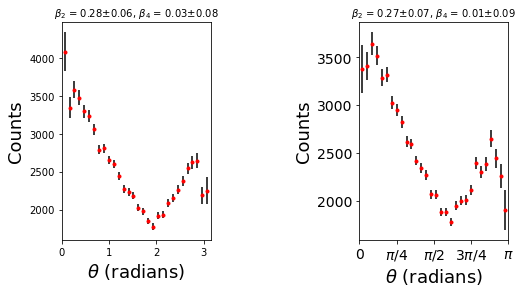

In [161]:
########################################
### photoelectron theta distribution ###
####### with error bars and fit ########
## these error bars come from the fit ##
########################################
fig, ax = plt.subplots(1,2,figsize = (8,4))

#ax[0].plot(theta, L_opt_, '-r', linewidth = 1.0, label = 'Fit')
ax[0].errorbar(bincenters, radius_scaled, yerr = radius_scaled_error_, fmt = 'r.', ecolor = 'k')
ax[0].set_xlim(0,np.pi)
ax[0].set_xlabel('$\\theta$ (radians)', fontsize=18,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax[0].set_ylabel('Counts', fontsize=18,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax[0].set_title('$\\beta_{2}$ = '+str(np.round(betas[1],2))+'$\pm$'+str(np.round(vars_[1,1],2))+
             ', $\\beta_{4}$ = '+str(np.round(betas[2],2))+'$\pm$'+str(np.round(vars_[2,2],2)), 
             fontsize=10,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})

plt.xticks([0,np.pi/4,np.pi/2,3*np.pi/4,np.pi], ('0', '$\pi$/4', '$\pi$/2', '3$\pi$/4', '$\pi$'),fontsize=14)
plt.yticks(fontsize=14)


#ax[1].plot(theta_1, L_opt__1, '-r', linewidth = 1.0, label = 'Fit')
ax[1].errorbar(bincenters_1, radius_scaled_1, yerr = radius_scaled_error__1, fmt = 'r.', ecolor = 'k')
ax[1].set_xlim(0,np.pi)
ax[1].set_xlabel('$\\theta$ (radians)', fontsize=18,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax[1].set_ylabel('Counts', fontsize=18,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax[1].set_title('$\\beta_{2}$ = '+str(np.round(betas_1[1],2))+'$\pm$'+str(np.round(vars__1[1,1],2))+
             ', $\\beta_{4}$ = '+str(np.round(betas_1[2],2))+'$\pm$'+str(np.round(vars__1[2,2],2)), 
             fontsize=10,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})

plt.xticks([0,np.pi/4,np.pi/2,3*np.pi/4,np.pi], ('0', '$\pi$/4', '$\pi$/2', '3$\pi$/4', '$\pi$'),fontsize=14)
plt.yticks(fontsize=14)

#fig.tight_layout()
#fig.show()
plt.subplots_adjust(wspace=1)  # Adjust horizontal space between subplots


plt.savefig(folder_path+"\\theta_electron_distribution.png")

# JZ Analysis following Wael

In [162]:
#relative angles

# Momentum components for electron 1 and electron 2
p1 = np.array([e_px0, e_py0, e_pz0])
p2 = np.array([e_px1, e_py1, e_pz1])

# Compute the relative vector
r = p2 - p1

# Compute the angles with respect to each coordinate axis
theta_x = np.arctan2(r[1], r[0])  # Angle with respect to x-axis
theta_y = np.arctan2(r[2], np.sqrt(r[0]**2 + r[1]**2))  # Angle with respect to y-axis
theta_z = np.arctan2(r[1], r[2])  # Angle with respect to z-axis

e_p_total_mag = np.array([np.sqrt(e_px0**2 + e_py0**2 + e_pz0**2), np.sqrt(e_px1**2 + e_py1**2 + e_pz1**2)])
e_pz_total = np.array([e_pz0, e_pz1])
theta_electron_total = np.arccos(e_pz_total/e_p_total_mag)


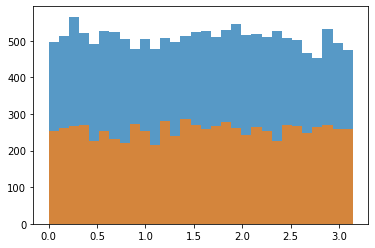

In [163]:
#relative angles
#high energy filter
KEe1_high_filter = (KEe1 > 15) & (KEe1 < 30) & (KEe2 < 5)
KEe2_high_filter = (KEe2 > 15) & (KEe2 < 30) & (KEe1 < 5)
KEe12_high_filter = True #abs(KEe1-KEe2) > 5

high_energy_filter = (KEe1_high_filter | KEe2_high_filter) & KEe12_high_filter
KEe1_high = KEe1[high_energy_filter]
KEe2_high = KEe2[high_energy_filter]
#low_energy_filter = 1 - high_energy_filter

e_px0_high = e_px0[high_energy_filter]
e_py0_high = e_py0[high_energy_filter]
e_pz0_high = e_pz0[high_energy_filter]
e_px1_high = e_px1[high_energy_filter]
e_py1_high = e_py1[high_energy_filter]
e_pz1_high = e_pz1[high_energy_filter]

KEe1_low_filter = (KEe1 > 5) & (KEe1 < 40)
KEe2_low_filter = (KEe2 > 5) & (KEe2 < 40)

KEe12_low_filter = True #abs(KEe1-KEe2) > 5

low_energy_filter = (KEe1_low_filter & KEe2_low_filter) & KEe12_high_filter
KEe1_low = KEe1[low_energy_filter]
KEe2_low = KEe2[low_energy_filter]
e_px0_low = e_px0[low_energy_filter]
e_py0_low = e_py0[low_energy_filter]
e_pz0_low = e_pz0[low_energy_filter]
e_px1_low = e_px1[low_energy_filter]
e_py1_low = e_py1[low_energy_filter]
e_pz1_low = e_pz1[low_energy_filter]

p1 = np.array([e_px0_high, e_py0_high, e_pz0_high])
p2 = np.array([e_px1_high, e_py1_high, e_pz1_high])

# Compute the relative vector
r = p2 - p1

# Compute the angles with respect to each coordinate axis
theta_x = np.arctan2(r[1], r[0])  # Angle with respect to x-axis
theta_y = np.arctan2(r[2], np.sqrt(r[0]**2 + r[1]**2))  # Angle with respect to y-axis
theta_z = np.arctan2(r[1], r[2])  # Angle with respect to z-axis


theta_radius_high, theta_radian_high, _ = plt.hist(theta_x,bins=np.linspace(0,np.pi,num=31),alpha=0.75);


p1 = np.array([e_px0_low, e_py0_low, e_pz0_low])
p2 = np.array([e_px1_low, e_py1_low, e_pz1_low])

# Compute the relative vector
r = p2 - p1

# Compute the angles with respect to each coordinate axis
theta_x = np.arctan2(r[1], r[0])  # Angle with respect to x-axis
theta_y = np.arctan2(r[2], np.sqrt(r[0]**2 + r[1]**2))  # Angle with respect to y-axis
theta_z = np.arctan2(r[1], r[2])  # Angle with respect to z-axis
theta_radius_low, theta_radian_low, _ = plt.hist(theta_x,bins=np.linspace(0,np.pi,num=31),alpha=0.75);

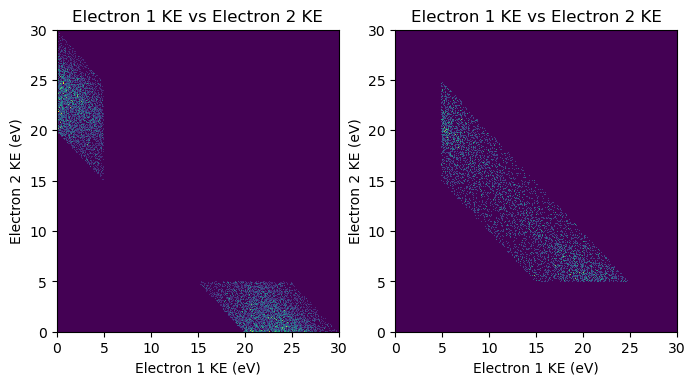

In [164]:
fig, ax = plt.subplots(1, 2, figsize = (8,4), dpi=100)

x_range = (0,30);
y_range = (0,30);

ax[0].hist2d(KEe1_high, KEe2_high,bins=(500, 500), range=[x_range,y_range]);
# Add labels and title
ax[0].set_xlabel('Electron 1 KE (eV)');
ax[0].set_ylabel('Electron 2 KE (eV)');
ax[0].set_title('Electron 1 KE vs Electron 2 KE');
#plt.axvline(28,c='r',ls='--')


ax[1].hist2d(KEe1_low, KEe2_low,bins=(500, 500), range=[x_range,y_range]);
# Add labels and title
ax[1].set_xlabel('Electron 1 KE (eV)');
ax[1].set_ylabel('Electron 2 KE (eV)');
ax[1].set_title('Electron 1 KE vs Electron 2 KE');
#plt.axvline(28,c='r',ls='--')

#plt.hist2d(KER, KERe, bins=(100,100));


Text(0.5, 1.0, 'Theta Electron X')

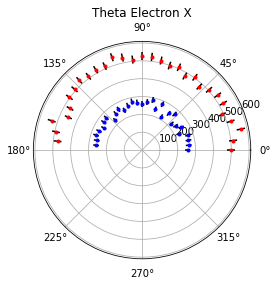

In [165]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

radius_error_high = [np.sqrt(x) for x in theta_radius_high]

radius_error_low = [np.sqrt(x) for x in theta_radius_low]

ax.errorbar(theta_radian_high[:-1], theta_radius_high, yerr = radius_error_high, fmt = 'r.', ecolor = 'k')
ax.errorbar(theta_radian_low[:-1], theta_radius_low, yerr = radius_error_low, fmt = 'b.', ecolor = 'k')

ax.grid(True)
ax.set_title('Theta Electron X')





In [166]:
# def angle_between_points(x1, y1, z1, x2, y2, z2, x3, y3, z3):
#     # Calculate vectors representing the line segment formed by the first two points
#     vec1 = np.array([x2 - x1, y2 - y1, z2 - z1])
    
#     # Calculate vector representing the line segment from p1 to p3
#     vec2 = np.array([x3 - x1, y3 - y1, z3 - z1])
    
#     # Find the dot product of the two vectors
#     dot_product = np.sum(vec1 * vec2, axis=0)
    
#     # Calculate the magnitudes of both vectors
#     mag_vec1 = np.linalg.norm(vec1)
#     mag_vec2 = np.linalg.norm(vec2)
    
#     # Use the dot product formula to find the cosine of the angle between the vectors
#     cos_angle = dot_product / (mag_vec1 * mag_vec2)
    
#     # Calculate the angle in radians
#     angle_radians = np.arccos(cos_angle)
    
#     # Convert angle to degrees
#     angle_degrees = np.degrees(angle_radians)
    
#     return angle_radians, angle_degrees

In [167]:
# angle_radians,angle_degrees = angle_between_points(i_px0, i_py0, i_pz0, i_px1, i_py1, i_pz1, e_px0, e_py0, e_pz0)

In [168]:
# projection_xy = np.sin(angle_radians)

In [169]:
# plt.hist(projection_xy);

In [170]:
# def project_points_onto_plane(x1, y1, z1, x2, y2, z2, x3, y3, z3):
#     # Calculate vectors from p1 to p2 and from p1 to p3
#     vec1 = np.array([x2 - x1, y2 - y1, z2 - z1])
#     vec2 = np.array([x3 - x1, y3 - y1, z3 - z1])
    
#     # Calculate the normal vector to the plane formed by p1 and p2
#     normal = np.cross(vec1, vec2)
    
#     # Project p3 onto the normal vector
#     projection_length = np.dot(np.array([x3 - x1, y3 - y1, z3 - z1]), normal) / np.linalg.norm(normal)
    
#     # Calculate the projection of p3 onto the plane
#     projection = np.array([x3, y3, z3]) - projection_length * normal / np.linalg.norm(normal)
    
#     return projection

In [171]:
# # Initialize arrays to store the projections
# proj_x = np.zeros(len(i_px0))
# proj_y = np.zeros(len(i_px0))
# proj_z = np.zeros(len(i_px0))

# # Project each set of points onto the plane formed by the first two points in the set
# for i in range(len(i_px0)):
#     x1, x2, x3 = i_px0[i], i_px1[i], e_px0[i]
#     y1, y2, y3 = i_py0[i], i_py1[i], e_py0[i]
#     z1, z2, z3 = i_pz0[i], i_pz1[i], e_pz0[i]
#     projection = project_points_onto_plane(x1, y1, z1, x2, y2, z2, x3, y3, z3)
#     proj_x[i], proj_y[i], proj_z[i] = projection

In [172]:
# fig, ax = plt.subplots(1, 3, figsize = (9,3), dpi=100)
# ax[0].hist2d(proj_x, proj_y, bins = (100,100));
# ax[1].hist2d(proj_x, proj_z, bins = (100,100));
# ax[2].hist2d(proj_y, proj_z, bins = (100,100));

## RFPAD